# DATA SCIENCE MIDTERM: Train

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv("midterm_train.csv")

In [3]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [4]:
df.describe()

C:\Users\DELL\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


In [5]:
df.isnull().T.any().T.sum()

1608

In [6]:
nan_rows = df[df.isnull().T.any().T]

In [7]:
nan_rows

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
29,-0.321393,-5.910640,6.243552,-12.936755,4.847573,11.270850,9.077655,-33.353069,-5.373054,3.055698,...,45.536116,5.295248,NaN,-7.541517,0.202396,-7.226681,-2.508254,-3.089376,-0.269219,0
48,-0.927155,-7.290313,6.049319,-3.980340,-12.851658,2.197959,8.795256,NaN,1.399448,-0.199977,...,13.029896,-2.101706,-0.150942,-1.161704,-0.600030,-21.211359,7.546942,-0.504204,-4.783417,0
126,0.327565,-0.544186,-6.928746,-5.659393,-3.423373,-1.850306,-10.073876,-8.432450,24.492095,-5.653426,...,16.366108,-9.924910,-0.144486,-1.511031,-0.057357,-69.130267,1.264002,0.317753,6.095717,0
151,1.062456,0.178589,-1.579185,-6.073041,-4.328384,-12.455219,-2.296016,-60.919564,-10.490058,1.430530,...,19.662729,-8.943095,0.503985,2.924478,-0.375100,-31.947110,6.230095,-2.717568,-11.463633,1
152,-0.708329,4.782119,-4.878719,-0.415667,-8.783684,4.117973,-7.093291,40.410110,-18.559044,5.335397,...,-13.945912,-5.367317,-0.720417,4.093962,NaN,-64.118235,-5.258002,1.241856,1.561127,0
185,0.467498,-0.687684,3.130110,-22.793216,8.519058,-4.889666,4.550944,41.917901,-4.837381,7.213244,...,-12.013702,-4.635228,-2.936636,3.049495,-0.061796,-54.338146,-2.802416,2.224768,-28.947051,1
269,-0.069772,NaN,-4.459920,12.222372,5.104225,6.891987,-6.484388,-8.629761,10.449141,0.271671,...,16.147388,-3.069028,-2.705045,2.058376,-0.079317,20.913883,4.586310,1.768024,17.369014,1
278,-0.260402,7.179945,-13.273020,5.625070,-2.260760,-1.813719,-19.297974,-25.063119,11.897762,1.296509,...,8.643472,-4.274724,-3.376974,-1.444150,0.264290,-29.431558,2.792192,1.135606,-6.696040,1
335,-0.307814,-1.933938,19.511962,-1.066393,-2.096425,-9.468056,28.368927,18.612901,-6.752776,4.331839,...,12.200807,1.569677,-0.008269,-4.771052,-0.030990,-2.967525,-6.534043,-1.252804,2.126562,0
544,0.138993,-0.455277,17.905972,-6.408080,-1.142244,-9.456645,26.033938,3.271380,15.894332,-5.262634,...,54.127465,2.819041,-2.878491,6.333181,0.777254,-19.424496,-0.231778,0.652801,14.593412,0


In [8]:
df


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1
5,-0.226706,11.350364,10.831367,5.182092,-2.236454,10.716248,15.747993,-15.900329,-0.178002,10.901306,...,-7.250310,6.402343,-2.064860,0.923879,0.331452,19.172365,5.752749,-2.609553,-20.320179,0
6,-0.431246,-0.974762,-7.412661,-0.930500,-1.265166,14.265374,-10.777451,5.523324,-11.757423,-1.932222,...,-15.596731,-7.779833,-1.153986,-1.081095,-0.538983,1.573406,2.102627,-2.966103,4.604337,1
7,-0.135071,8.524648,-6.731169,-13.374530,-0.079429,-9.511618,-9.786614,-11.663750,8.783823,-0.904801,...,19.780494,-3.711105,-3.134008,-5.805255,0.966762,6.639034,6.258786,1.272556,13.186184,1
8,0.026694,-5.770476,0.774836,4.718855,4.816484,9.501880,1.126553,25.186840,4.650334,11.786198,...,-26.215235,0.330604,-2.015631,2.219910,0.533815,-2.627660,0.182319,3.140230,14.495677,0
9,-0.349073,3.334116,-3.355872,-0.796302,-0.900425,-7.620448,-4.879186,-16.972020,10.894596,9.426504,...,19.267232,-0.675888,-2.560935,1.326146,0.444997,-20.942887,-3.141996,-1.608473,7.169219,1


In [9]:
df.x0.value_counts()

 0.102691    1
-0.211378    1
 0.174039    1
 0.617952    1
-0.339941    1
-0.309543    1
 0.216048    1
 0.031328    1
-0.728197    1
 0.083280    1
 0.106562    1
-0.098998    1
-0.022384    1
 0.379271    1
-0.137151    1
 0.564811    1
-0.123197    1
 0.305540    1
-0.495906    1
 0.688605    1
 0.441334    1
-0.585758    1
 0.432435    1
-0.269849    1
 0.158604    1
 0.039542    1
 0.166480    1
-0.124345    1
-0.321969    1
-0.082513    1
            ..
 0.374552    1
-0.931190    1
-0.112844    1
 0.043239    1
 0.035535    1
-0.430894    1
-0.315795    1
-0.065598    1
-0.250176    1
 0.340119    1
 0.019614    1
-0.041094    1
-0.331833    1
 0.259331    1
-0.254476    1
-0.470547    1
 0.454751    1
-0.154582    1
-0.121661    1
-0.290557    1
-0.540581    1
 0.501135    1
-0.247391    1
-0.561347    1
-0.184685    1
 0.284092    1
 0.188363    1
-0.131137    1
 0.012860    1
 0.177312    1
Name: x0, dtype: int64

## EDA for all the columns: 

In [10]:
df.x0.describe()

count    159974.000000
mean         -0.001028
std           0.371137
min          -1.592635
25%                NaN
50%                NaN
75%                NaN
max           1.600849
Name: x0, dtype: float64

In [11]:
#missing values
df[df.x0.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
1282,NaN,-6.505933,-8.828135,5.613332,-10.270281,-6.056645,-12.835444,-30.720431,5.256675,-0.516974,...,8.778931,1.527290,0.801398,3.849479,-0.335413,1.699792,-3.431273,2.133383,0.976528,0
2290,NaN,-12.186736,11.621886,13.116801,-0.180567,-12.906595,16.897349,-7.274127,14.426479,10.585516,...,24.516571,1.609133,0.106570,-0.094312,0.371740,3.577218,-0.949692,-0.020877,2.913097,0
7491,NaN,-0.384596,-10.818621,5.177347,-5.146951,16.057039,-15.729462,29.250231,-7.189067,-8.740679,...,-12.855764,-7.449942,-0.053725,-3.128537,0.310637,-100.518661,-3.844691,2.232711,-23.559293,0
15484,NaN,1.454200,-7.406338,-1.293288,-4.836150,9.834562,-10.768259,5.449024,-6.198703,-8.075361,...,5.793891,1.575676,-0.300571,0.835870,-0.261038,-26.354736,4.547299,0.553154,16.844292,1
22497,NaN,11.653534,4.327604,-3.506009,-4.761220,0.757278,6.292011,-38.217400,17.515603,-4.352516,...,11.951822,4.002679,-0.485700,4.602390,-0.351310,52.826465,-7.757921,-1.345127,-9.443975,0
23192,NaN,-6.077900,7.607497,-3.122131,7.088416,-1.390626,11.060729,-9.517971,-6.684410,-12.948356,...,-3.414259,9.851763,-1.565546,3.943872,0.203333,89.177267,-1.485720,-3.380592,22.719672,0
28954,NaN,-1.529839,-3.652209,3.382918,6.294696,-4.290054,-5.310038,-17.821345,7.555497,10.163328,...,-7.548214,-6.677756,-0.751146,3.433916,0.409124,-21.733425,0.713566,-1.763168,-18.620857,0
35999,NaN,6.623182,-5.883371,-4.540029,-5.175931,-2.654606,-8.553979,2.210769,-15.369148,-6.329517,...,20.589816,-6.167838,-4.173543,-5.579965,-0.152871,-14.914124,-1.577324,0.683788,13.675393,1
53729,NaN,-5.299368,-0.632413,0.479908,10.290155,0.660965,-0.919481,-19.121599,5.720173,-4.705099,...,-0.116595,3.341097,0.052327,-4.473686,0.315010,24.938722,2.168197,-0.232055,0.777751,0
72318,NaN,6.713102,11.182837,0.077611,-6.304006,9.572240,16.259005,-7.990820,-13.391121,0.755567,...,1.388660,1.801888,0.933322,1.735192,-0.014280,-30.941666,2.123860,-2.145409,-32.842786,0


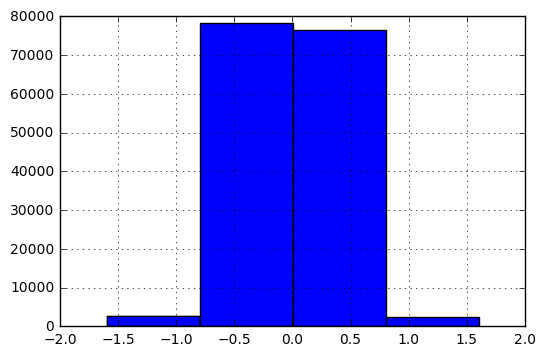

In [12]:
df.x0.hist(bins=4)

In [13]:
#print np.all(np.isfinite(df["x0"]))

In [14]:
df.x1.value_counts()

-2.962774     1
 6.265544     1
 5.636382     1
-4.290248     1
 9.821504     1
-2.494653     1
-13.760974    1
 3.602447     1
 8.463322     1
 5.242201     1
-8.150218     1
 13.756379    1
-2.108068     1
 3.401338     1
 0.360913     1
 5.804160     1
-5.713714     1
 3.162261     1
-4.192957     1
 5.024898     1
 7.015599     1
-8.736396     1
-0.675925     1
-0.877087     1
-8.956740     1
-5.566545     1
-7.091157     1
-8.151389     1
 3.711785     1
 3.588860     1
             ..
-4.524439     1
-2.624034     1
 3.695628     1
 3.881615     1
-8.784250     1
 5.276872     1
 6.852562     1
 9.913283     1
-17.023315    1
 1.392015     1
 1.599238     1
 9.312352     1
 12.612883    1
 4.705796     1
-1.229393     1
-4.207221     1
-12.930522    1
-3.645403     1
-9.252960     1
 0.783919     1
-15.546865    1
 0.889107     1
 1.938264     1
-3.922787     1
-8.390659     1
-0.487134     1
-4.373846     1
 14.446068    1
-8.194828     1
-0.323929     1
Name: x1, dtype: int64

In [15]:
df.x1.describe()

count    159975.000000
mean          0.001358
std           6.340632
min         -26.278302
25%                NaN
50%                NaN
75%                NaN
max          27.988178
Name: x1, dtype: float64

In [16]:
df[df.x1.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
269,-0.069772,NaN,-4.459920,12.222372,5.104225,6.891987,-6.484388,-8.629761,10.449141,0.271671,...,16.147388,-3.069028,-2.705045,2.058376,-0.079317,20.913883,4.586310,1.768024,17.369014,1
3904,-0.340804,NaN,18.356819,-1.826176,-1.393698,-5.964728,26.689436,1.120473,-7.474115,-8.396540,...,6.249186,3.856136,0.340480,5.633011,-0.365907,49.040982,2.038678,-0.801971,14.210211,0
18170,-0.410770,NaN,-15.551382,3.744511,-1.685157,8.193513,-22.610541,-9.699565,-10.217595,7.033261,...,-42.057645,-2.118306,-0.083314,-0.790458,0.139784,26.234334,2.024583,-4.425617,-9.659983,0
40299,0.227076,NaN,-18.733132,-0.461465,8.660548,-7.886767,-27.236567,37.288344,5.859901,-1.997171,...,-1.232420,-1.082640,0.007881,-2.151750,-0.309361,-0.839516,-2.200192,1.642307,12.225306,1
43772,0.528588,NaN,4.561894,-8.441829,1.337442,1.643088,6.632651,21.382996,-7.556685,-9.451983,...,-11.346737,4.361716,-0.836350,9.708957,-0.138983,31.437957,1.982222,0.532836,0.764501,1
46051,-0.896503,NaN,-8.217168,-0.973278,0.631415,2.473625,-11.947144,-30.120214,-12.024429,-1.532167,...,22.603469,-6.153983,1.492377,-2.093309,-0.146086,-2.151492,-2.042253,0.871720,-0.320049,0
54302,-0.412861,NaN,4.635947,3.440926,-6.194971,-5.334492,6.740318,9.557759,2.495056,3.396796,...,3.313599,-6.866183,1.921869,-1.289816,-0.000929,-65.723600,2.654222,-2.042642,-15.531746,0
63871,-0.038766,NaN,5.749180,-26.352603,-18.375897,15.455716,8.358876,15.628983,-3.513677,-2.793763,...,0.382972,3.890814,-0.747013,0.017756,0.343915,26.260470,1.434131,-2.715424,5.044221,1
73401,0.606087,NaN,21.471900,7.414258,4.309340,9.269698,31.218530,11.403842,0.906969,3.396593,...,34.170639,-4.096659,0.458170,-0.993548,0.019414,-53.521643,5.775550,-3.131032,7.558760,0
76946,0.564955,NaN,-28.334382,4.373906,13.160118,-2.808574,-41.196063,-75.019455,-0.668637,3.894382,...,21.102828,-14.560322,-1.193860,-3.426034,-0.119264,-42.842431,-4.410659,3.331949,-4.881005,0


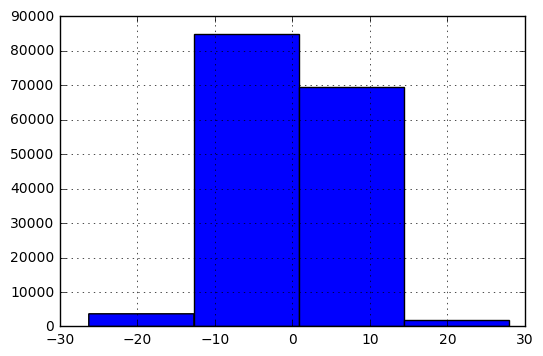

In [17]:
df.x1.hist(bins=4)

In [18]:
df.x2.value_counts()

 20.081361    1
-12.504154    1
-15.750652    1
-27.709747    1
-15.680862    1
 1.991001     1
 5.523184     1
-4.857920     1
-7.453670     1
 13.232330    1
-15.988530    1
-13.222195    1
-4.932629     1
 13.302456    1
 31.373009    1
 5.890619     1
-15.309422    1
-14.106415    1
-17.912872    1
-6.284616     1
-2.306748     1
-20.724334    1
 2.936890     1
-3.988446     1
-3.813737     1
 1.864847     1
 22.337256    1
-2.302997     1
 1.742351     1
-1.302785     1
             ..
-9.846928     1
 9.093883     1
 24.352314    1
-8.528357     1
 24.064284    1
 10.536583    1
-14.264429    1
-6.331455     1
 6.563173     1
-17.578569    1
-2.234366     1
-12.789811    1
-6.852072     1
-7.944765     1
-4.516296     1
 0.429766     1
-3.132238     1
-16.827950    1
-3.067489     1
-24.336029    1
-24.890702    1
-13.822041    1
 7.968285     1
 12.117012    1
-12.958878    1
 6.376543     1
 1.778511     1
 18.410957    1
-7.771685     1
-11.473807    1
Name: x2, dtype: int64

In [19]:
df.x2.describe()

count    159962.000000
mean         -1.150145
std          13.273480
min         -59.394048
25%                NaN
50%                NaN
75%                NaN
max          63.545653
Name: x2, dtype: float64

In [20]:
df[df.x2.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
2524,-0.209574,-3.340996,NaN,10.501807,-6.681363,6.449091,-6.337300,11.214163,-1.613830,-3.704014,...,-6.633334,3.548169,-0.132460,-2.601734,0.278050,25.163345,-6.272492,-1.187300,12.017816,0
7138,-0.479359,5.813843,NaN,-3.964259,-1.043215,-12.350447,-14.496045,8.698119,-3.008981,-9.089380,...,3.359620,-4.445804,0.091725,1.713087,-0.707674,-43.983987,-0.032732,3.811624,-19.804524,0
16032,-0.171662,5.126389,NaN,1.546616,-3.901010,-2.591683,30.923778,5.744511,-0.318639,4.457418,...,0.702626,9.827325,-1.359959,-2.367850,0.466093,53.536647,15.429290,-1.526800,4.649168,0
17062,-0.273505,-0.586943,NaN,7.255120,13.479051,-4.592121,3.605236,53.863582,15.831755,3.252894,...,-18.730775,3.217950,-1.612287,0.584069,0.104637,-54.217206,4.135539,-0.125426,-19.407940,0
17148,0.229191,-9.195658,NaN,-6.360184,-9.406686,-0.366911,28.635379,23.162106,5.338565,5.859824,...,7.834008,-1.051131,0.211176,4.301922,0.090811,32.343031,1.696715,0.068057,-11.562844,1
17641,0.156527,5.030198,NaN,-3.820834,3.424019,-2.345932,1.717067,40.644534,-14.252166,-10.618281,...,0.952229,-2.674130,0.920253,0.509358,0.090825,0.305827,0.657541,1.135731,10.598824,1
18440,0.214587,-1.929315,NaN,-0.687144,-1.379466,-11.425618,-26.879741,-83.112587,-5.315010,-6.535554,...,18.750570,-3.310565,-1.273122,0.067101,-0.190346,41.880611,-10.158448,1.707682,10.285394,1
20228,-0.312271,0.050742,NaN,-4.491646,-5.319940,-0.196344,-1.272844,-8.838483,-11.421886,3.906847,...,-0.702595,-12.501198,-0.685837,-7.307639,-0.733286,-54.844559,9.429257,0.593781,-18.529422,1
27683,-0.082677,3.017125,NaN,-9.420367,-1.484761,-1.981581,-15.264176,-10.198226,1.152700,-7.304634,...,-1.266782,-4.113930,-1.682560,4.072409,0.091498,-35.403961,-4.158631,0.614117,-5.291597,0
27959,-0.146164,-5.590736,NaN,-4.901185,-0.637753,-2.266972,-16.287070,-74.963131,5.628003,-4.445540,...,1.796610,-16.647669,-1.176816,-4.106809,-0.154188,-6.938379,-3.637468,-1.983704,14.718946,1


In [21]:
df.x3.value_counts()

-16.423325    1
 2.031822     1
 5.753568     1
 6.388761     1
 0.410559     1
 1.255908     1
-11.910686    1
-15.951846    1
 2.835587     1
-0.416447     1
-4.865419     1
 5.532058     1
 5.315470     1
-2.982502     1
 4.291243     1
-0.125194     1
 10.421436    1
 0.830884     1
 11.481651    1
-14.835605    1
-3.067131     1
 11.548583    1
-12.933305    1
-1.289660     1
 10.847232    1
 0.501759     1
-8.708495     1
-6.301353     1
-7.373055     1
-3.145103     1
             ..
-7.816384     1
 2.430991     1
 0.238277     1
 8.351751     1
-15.067476    1
-7.398376     1
 1.200752     1
 4.395266     1
 0.409775     1
-11.896288    1
-11.301779    1
-6.361768     1
-4.758191     1
 4.973805     1
-6.257253     1
-3.619445     1
-10.491194    1
-11.773245    1
-8.901583     1
-5.805888     1
-1.093530     1
-14.492365    1
 4.414804     1
 0.388851     1
 9.770742     1
-0.810599     1
 3.672407     1
 4.917776     1
 6.080136     1
 1.225506     1
Name: x3, dtype: int64

In [22]:
df.x3.describe()

count    159963.000000
mean         -0.024637
std           8.065032
min         -35.476594
25%                NaN
50%                NaN
75%                NaN
max          38.906025
Name: x3, dtype: float64

In [23]:
df[df.x3.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
1915,0.094442,-13.041777,38.847643,NaN,10.400212,-6.720081,56.481554,-7.159513,-4.572642,3.709979,...,71.046373,-2.475545,-1.976800,-1.757050,-0.410576,-25.801920,-1.464737,-0.775547,14.613787,0
6601,-0.413340,-7.219679,18.271306,NaN,12.713334,-11.119016,26.565106,-15.135116,-2.178226,0.743533,...,34.375223,-0.480033,1.644498,-1.023343,0.221440,4.521883,0.869700,-0.930162,12.499393,0
9826,0.492442,8.834265,-22.112176,NaN,-0.617594,-5.018674,-32.149442,18.405129,8.223393,-1.947533,...,5.266495,-10.829962,0.306551,-7.688634,0.007074,-59.375646,-3.766784,1.942676,22.111818,1
10834,0.010992,4.042404,6.326437,NaN,-3.205226,6.619209,9.198164,-14.380747,-3.660715,7.325035,...,-17.132956,5.434376,-0.576959,1.098214,-0.181462,48.948142,4.813124,-1.195336,7.935562,0
19377,-0.049720,1.585055,3.338838,NaN,5.698587,-0.908639,4.854419,-11.781132,10.599928,-9.686394,...,-0.230969,-8.340592,-1.828235,0.150381,-0.163444,-53.313916,3.809701,-2.401909,-23.391629,0
20312,0.932053,6.051425,5.332155,NaN,-6.576729,-0.888006,7.752552,-0.108340,-6.488187,-0.555654,...,11.284331,0.621463,1.399146,-4.233408,0.180994,-3.623726,-6.565978,1.212937,-2.741392,0
22997,-0.061717,16.559290,29.371346,NaN,0.451385,4.258965,42.703730,26.818371,13.036566,1.530625,...,13.316822,-5.506342,-1.296733,-0.137442,0.360370,-19.391329,0.560853,-1.149162,-25.965610,1
27191,-0.258966,-4.136379,-6.694868,NaN,-5.619684,-11.876985,-9.733835,10.880125,9.366297,-2.064847,...,-9.393251,-5.797874,-0.733058,-1.948238,-0.547131,-26.763513,-7.540459,0.400075,-3.484849,0
31962,-0.456137,2.008745,8.015305,NaN,1.837711,5.952215,11.653651,-39.597954,-3.639112,-4.271623,...,25.652951,-2.551711,-0.644173,-2.057171,0.021470,-16.661945,-3.131467,-1.778345,-11.861665,0
39640,-0.058873,2.368002,-9.770075,NaN,4.795968,-8.128005,-14.204955,-52.485495,-12.214893,-2.987328,...,22.688599,-9.276164,-0.107766,1.309146,0.250284,-16.097806,-7.328386,-1.915167,2.725826,1


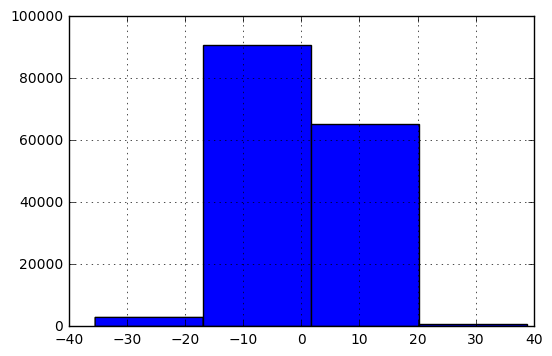

In [24]:
df.x3.hist(bins=4)

In [25]:
df.x4.value_counts()

-17.358391    1
 1.323085     1
 6.593093     1
 1.383107     1
-5.519167     1
-1.274873     1
 3.921979     1
-0.012483     1
-3.436474     1
 5.472258     1
-8.174105     1
-5.533483     1
-6.289762     1
 1.781382     1
-0.733780     1
-3.578858     1
-1.721800     1
-6.219938     1
-1.164609     1
 5.124160     1
-1.623213     1
 5.144404     1
-9.559355     1
 2.883833     1
-4.540133     1
-3.007294     1
 1.324370     1
-5.484952     1
-0.322058     1
-4.173337     1
             ..
-2.031886     1
-14.519310    1
-7.506377     1
-3.414279     1
 0.274400     1
 2.141892     1
 0.448083     1
-5.350833     1
 7.803752     1
-6.404203     1
-0.641663     1
 13.127229    1
-10.611827    1
-3.663681     1
-2.248813     1
-0.311117     1
 7.909944     1
-3.006080     1
 5.412839     1
 6.522662     1
-12.146633    1
-1.192408     1
-7.416076     1
 4.740083     1
-8.219440     1
 10.390929    1
 3.309951     1
 4.655507     1
-7.053016     1
 15.247520    1
Name: x4, dtype: int64

In [26]:
df.x4.describe()

count    159974.000000
mean         -0.000549
std           6.382293
min         -28.467536
25%                NaN
50%                NaN
75%                NaN
max          26.247812
Name: x4, dtype: float64

In [27]:
df[df.x4.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
6956,0.240742,-10.159726,1.785743,-14.636844,NaN,-8.486920,2.596336,-9.919385,-15.073121,-5.417414,...,-3.909175,0.195081,-0.978571,-2.831354,-0.161084,-8.995677,-2.061222,-1.365424,-2.637434,0
8666,0.391182,6.635727,5.606223,-1.094829,NaN,-9.138937,8.151026,26.641834,5.812135,-2.970902,...,6.835240,-0.591672,-1.364835,-0.037783,0.538933,-34.654557,-3.841459,-2.178834,0.292330,1
9535,-0.235661,7.451220,-11.763732,-0.822389,NaN,-3.308990,-17.103583,11.076147,14.334288,-13.584293,...,-33.671930,-3.326002,0.586697,4.830300,-0.641388,-54.349764,1.810218,-0.857380,-19.722721,0
14893,-0.230886,-1.568113,5.327829,-5.976268,NaN,-5.801964,7.746263,13.174725,0.353493,-3.455414,...,9.230351,-0.430105,2.646598,6.852275,-0.185243,-55.484553,4.574408,1.359316,-5.127469,0
15482,-0.778981,-8.401766,-10.326576,20.682638,NaN,2.395818,-15.014065,-11.093615,0.572874,0.315925,...,-32.455182,-1.848531,-2.697497,3.693862,-0.592465,26.029482,3.568190,-3.915996,-9.227437,0
21852,0.478178,8.653097,-20.916368,-3.115361,NaN,5.828477,-30.410827,-40.128353,-9.566050,7.568972,...,22.094965,-4.641356,-1.378189,1.379270,-0.433930,-30.176669,0.516028,3.550440,8.405461,0
29504,0.204360,-7.968960,-8.153651,-4.272214,NaN,4.551293,-11.854796,18.240247,9.781238,-7.932307,...,-17.521852,-8.728942,3.484187,5.521435,-0.743536,-29.985619,4.752180,-0.144872,-8.633700,0
31575,-0.644626,-12.542060,-9.085007,1.386954,NaN,2.924260,-13.208918,-35.225738,9.316637,-14.426088,...,31.349983,-10.031590,-0.062827,5.631482,-0.148671,-27.102782,3.187934,2.881834,3.808333,1
32955,0.228468,5.042255,15.092247,0.076908,NaN,-12.170370,21.942993,7.907625,-15.187872,10.070896,...,-1.099823,0.983402,1.879394,-3.228237,-0.356575,-1.813661,-1.896203,-0.250984,-4.937092,1
60368,0.437282,-6.266697,25.254050,-3.648112,NaN,-15.065116,36.717491,3.381792,8.073913,2.229685,...,-18.975747,6.728323,1.504402,-3.046481,-0.116841,79.439042,7.867630,0.125280,-4.176441,0


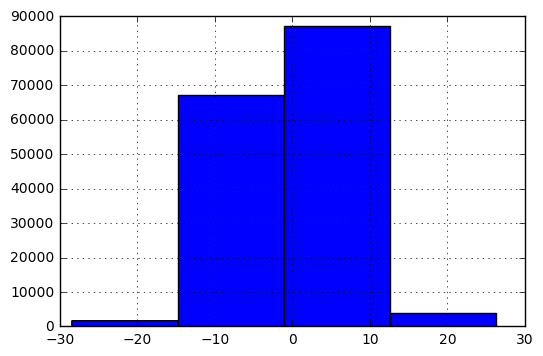

In [28]:
df.x4.hist(bins=4)

In [29]:
df.x5.value_counts()

-2.703089     1
 12.364305    1
-3.137286     1
-0.809807     1
 10.706651    1
 2.905381     1
 4.388939     1
 2.018676     1
-7.207813     1
 6.969937     1
 2.890594     1
 2.102970     1
-11.084483    1
-6.434055     1
 3.010319     1
 1.542955     1
-6.964971     1
 7.819911     1
 10.090879    1
 2.531924     1
-5.611907     1
-11.238738    1
 3.170383     1
-1.437176     1
 18.158984    1
 9.744771     1
 6.508538     1
 10.617024    1
-8.739823     1
-0.382696     1
             ..
 7.948371     1
-3.813198     1
 3.638429     1
-1.403225     1
 9.072370     1
 3.984112     1
 14.604414    1
 7.509358     1
 17.031291    1
-4.940202     1
-6.605170     1
 10.519270    1
 9.677877     1
-6.362365     1
-8.418036     1
 3.665809     1
-5.763713     1
-6.472257     1
-5.644803     1
 11.380997    1
 14.807695    1
-10.794954    1
-4.156426     1
-5.052501     1
-1.291999     1
 3.949188     1
-10.482973    1
-4.509307     1
 6.809241     1
 23.577106    1
Name: x5, dtype: int64

In [30]:
df.x5.describe()

count    159963.000000
mean          0.013582
std           7.670076
min         -33.822988
25%                NaN
50%                NaN
75%                NaN
max          35.550110
Name: x5, dtype: float64

In [31]:
df[df.x5.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
4395,-0.670576,0.772602,2.097852,-6.330263,4.816318,NaN,3.050119,-22.332469,-11.299025,3.857141,...,26.970161,-2.806937,1.500518,2.859079,0.279341,25.039636,1.552845,2.516604,22.562679,1
9825,-0.146042,-1.252535,-13.610783,11.326738,-5.472407,NaN,-19.789056,-16.664047,9.060059,-0.946063,...,3.078423,-5.456549,-1.843539,7.877758,0.612143,-29.914412,-8.839877,1.299323,-6.321112,0
20869,0.348850,-4.331123,-0.644917,3.190095,-1.871460,NaN,-0.937661,-8.555234,2.130553,-3.325701,...,21.110278,4.386979,-2.385649,2.928618,-0.760321,41.192289,1.066587,2.977006,22.481946,1
22027,-0.064495,-3.819745,-16.374177,-1.404919,1.411742,NaN,-23.806822,45.298514,5.563100,-1.901332,...,-13.924926,6.590695,0.590648,-3.053512,0.059179,-4.761788,3.194393,-0.357930,30.591866,1
31222,-0.514732,0.190827,15.959241,-1.923077,-6.955874,NaN,23.203537,1.701675,6.712103,-3.627635,...,31.484741,-1.390067,-0.174050,7.359801,-0.038282,7.464433,4.662616,-1.098359,27.699658,0
36879,0.048344,1.377851,-2.541181,-4.013240,3.396625,NaN,-3.694687,-6.885855,1.074890,-0.203915,...,10.317485,-0.634272,-2.554050,-7.077041,-0.270246,19.729266,-1.620688,1.667020,10.628200,1
39806,-0.225887,4.509654,8.163503,1.898810,12.078794,NaN,11.869119,-13.207362,5.835967,-7.811703,...,22.859429,4.895007,0.248947,5.945636,-0.517536,33.704791,-0.240147,0.827244,13.647678,1
53541,-0.414673,3.735390,16.869224,-2.444383,2.863627,NaN,24.526584,26.183164,2.884544,11.723280,...,12.461596,3.369884,-0.417009,3.322908,-0.177904,-29.982195,0.884949,-3.545489,1.840824,1
56519,0.081143,-0.530702,-0.601642,-2.497858,2.930353,NaN,-0.874742,11.094415,3.379185,5.864621,...,-12.241224,-5.296235,-1.179108,-0.072352,-0.280783,-10.822316,-9.515970,-1.695077,8.988282,1
59824,-0.252709,5.142564,-3.408512,-13.082442,-0.889589,NaN,-4.955721,-16.937222,-7.758969,-6.825395,...,5.497303,-11.979723,1.508459,-1.797917,0.443655,-78.526773,2.224778,0.685869,-29.258270,0


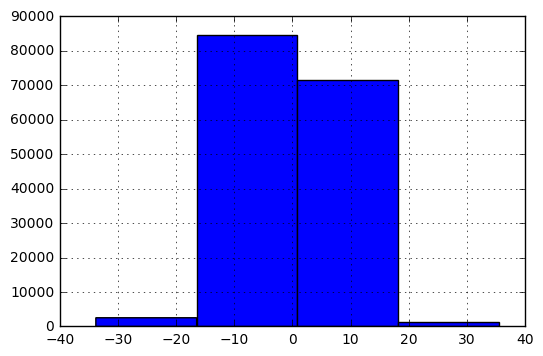

In [32]:
df.x5.hist(bins=4)

In [33]:
df.x6.value_counts()

-1.162225     1
 6.456844     1
 12.099231    1
 12.991742    1
 8.776278     1
-10.020845    1
 19.587599    1
 11.749572    1
 13.690165    1
-0.978104     1
 7.229089     1
-13.845452    1
 6.253602     1
 1.293559     1
-9.552679     1
-21.900637    1
-14.962155    1
 32.290492    1
 7.032457     1
 13.520186    1
 19.472558    1
-11.249027    1
 10.681636    1
 31.351111    1
-21.094493    1
 6.672043     1
-36.076810    1
-14.079629    1
-7.813450     1
 16.631847    1
             ..
 0.785210     1
 2.945907     1
 4.105585     1
-24.400566    1
-30.912910    1
 35.143723    1
-12.470806    1
 9.380261     1
-29.850227    1
 36.204310    1
-11.137195    1
-29.424468    1
 38.126512    1
-38.864516    1
 8.959061     1
 0.756956     1
 1.494112     1
-14.656898    1
 0.407268     1
-2.688146     1
 31.221232    1
-1.612419     1
 15.781174    1
-7.291403     1
 12.838368    1
-42.090346    1
 0.353032     1
 11.550867    1
-13.723846    1
 18.982491    1
Name: x6, dtype: int64

In [34]:
df.x6.describe()

count    159974.000000
mean         -1.670670
std          19.298665
min         -86.354483
25%                NaN
50%                NaN
75%                NaN
max          92.390605
Name: x6, dtype: float64

In [35]:
df[df.x6.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
11392,0.059723,1.097178,4.696963,-7.280960,-4.787376,0.108246,NaN,30.097002,-10.250258,5.793223,...,10.388804,8.484995,0.964293,-4.088995,0.374186,-3.327581,-4.270745,-3.761128,14.529052,1
13613,-0.896705,0.887485,-16.908393,-6.900632,0.907400,6.057917,NaN,-20.513072,-2.121158,-3.048494,...,19.663689,2.532625,-1.864895,4.004130,-0.228924,-62.804213,7.339145,1.374486,-1.283748,1
18494,0.813060,3.273780,-7.136446,-11.230025,-5.785040,-4.885934,NaN,-3.993640,3.070363,-3.638038,...,-25.439531,-0.653796,0.743433,0.772463,-0.457542,-11.491913,-8.856656,-1.510236,-24.396989,0
18522,-0.161406,-3.961240,-3.470324,2.564601,-5.927868,5.797889,NaN,8.955741,3.397710,-12.668815,...,5.736849,-2.759385,-0.458500,5.045374,-0.009072,-21.780820,-0.992988,0.558118,-7.513572,0
32999,-0.295863,-4.719715,1.876903,-12.368722,0.517941,-10.035300,NaN,-11.291578,-2.984731,-3.832804,...,7.988823,1.412745,-0.753770,0.053813,0.133715,13.855474,0.656667,0.571837,0.193060,1
33860,0.059093,-8.891406,-2.220926,6.661374,-2.570166,-1.690585,NaN,-12.485706,-4.106286,0.083602,...,11.587137,2.221695,0.149146,-3.115893,-1.250152,-43.205959,0.405913,1.039479,2.293140,0
35660,0.089142,-4.216544,-9.717295,-3.233513,5.463088,5.052715,NaN,30.361930,-4.234525,-5.109290,...,-30.397257,-1.320938,-0.687811,0.792694,-0.571985,13.756140,-3.790445,-0.277199,22.041542,0
36355,-0.020953,7.589884,-32.912863,4.605593,-3.374065,2.916152,NaN,-22.618366,-14.037881,2.134310,...,-3.359874,-11.615732,-0.404699,5.954661,-0.220597,-80.314973,4.971529,2.151519,-7.853572,0
36872,0.107966,4.366317,9.436063,11.461136,4.801159,-13.275822,NaN,-16.904417,1.457742,-6.142902,...,7.119304,5.873151,-1.389426,-4.087946,-0.070999,30.690689,-0.652139,-2.191936,11.524807,0
49312,0.069089,0.230270,-13.248854,-4.803026,-7.588505,13.160600,NaN,-1.633512,0.282038,5.023017,...,16.236523,-7.488584,1.613958,0.399779,-0.388334,-32.569440,4.319149,3.048434,29.488072,0


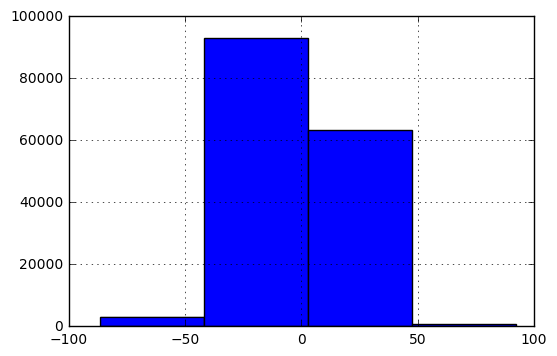

In [36]:
df.x6.hist(bins=4)

In [37]:
df.x7.value_counts()

-36.111664    1
-30.680371    1
 28.625446    1
 13.160860    1
-4.120269     1
-60.735849    1
-0.596307     1
 7.812023     1
-24.119847    1
 23.292590    1
 21.123714    1
-5.144673     1
-7.150891     1
-16.394561    1
-62.364649    1
-73.291919    1
-55.914224    1
 12.644395    1
 1.494131     1
-56.641582    1
-14.516003    1
 9.685461     1
-15.543928    1
 63.773827    1
-13.860380    1
-15.902109    1
-33.366441    1
-5.796407     1
-3.972476     1
-14.899851    1
             ..
-25.089911    1
-11.637615    1
-41.218136    1
-4.653394     1
 28.177659    1
-18.654540    1
-17.993245    1
-46.509962    1
 12.348820    1
-39.868956    1
-10.980766    1
-32.776380    1
-64.884303    1
-25.868796    1
 31.570261    1
-1.204475     1
-20.557227    1
 39.044657    1
-27.539664    1
-42.246793    1
 25.541498    1
-13.163146    1
-37.314237    1
-25.555121    1
-20.466841    1
-28.359940    1
 5.117728     1
-12.291251    1
 0.327769     1
-11.112040    1
Name: x7, dtype: int64

In [38]:
df.x7.describe()

count    159973.000000
mean         -7.692795
std          30.542264
min        -181.506976
25%                NaN
50%                NaN
75%                NaN
max         149.150634
Name: x7, dtype: float64

In [39]:
df[df.x7.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
48,-0.927155,-7.290313,6.049319,-3.980340,-12.851658,2.197959,8.795256,NaN,1.399448,-0.199977,...,13.029896,-2.101706,-0.150942,-1.161704,-0.600030,-21.211359,7.546942,-0.504204,-4.783417,0
2467,-0.130841,-0.619277,-0.329954,-1.216384,-5.358501,3.600082,-0.479728,NaN,2.950093,2.735433,...,13.202614,-5.789896,-1.135745,0.771928,-0.238313,-1.084118,-2.807925,-0.504975,2.784034,1
6172,-0.043371,-0.714698,12.775772,10.479073,0.043609,1.962279,18.575013,NaN,-10.404616,-1.672388,...,35.613065,-0.140414,-1.598092,-6.152476,0.284873,-30.335633,1.484260,-1.217903,-18.569041,0
10206,-0.486156,-7.838170,-0.875046,3.566648,7.120445,-2.637914,-1.272251,NaN,15.138114,-3.271408,...,24.860757,-6.119312,0.079679,-4.328879,-0.140415,13.286418,0.190660,0.178027,19.011778,1
11677,0.850539,3.924798,5.859371,-3.715121,7.350546,4.316258,8.519084,NaN,-2.854881,-10.429494,...,3.070351,1.993050,-2.522083,-6.192072,0.124487,-42.735518,-4.532292,-0.959526,0.746898,0
13716,-0.154095,4.542378,-2.772906,-15.266620,23.226720,4.195459,-4.031597,NaN,7.078372,4.063235,...,4.446817,-0.880340,0.298240,0.399879,-0.232134,-45.651082,-2.006201,2.545237,5.501806,0
25873,-0.363859,-0.331379,18.199686,-7.284618,6.484362,0.889108,26.460975,NaN,-4.120009,-6.066369,...,70.155696,-0.597822,-1.560817,0.999687,0.144142,-15.395791,0.196042,-0.468471,30.857911,0
28028,0.915966,1.966790,-2.821271,-3.358688,-3.593428,0.171378,-4.101916,NaN,5.327454,7.817755,...,60.006543,-7.682490,1.644726,0.138061,0.446210,36.075855,-7.053590,4.563355,7.601391,1
31866,0.529870,9.570270,-26.041021,0.219672,2.814038,11.315486,-37.861688,NaN,4.460737,17.574453,...,38.193487,-12.805768,0.834313,-5.690689,-0.279317,-34.547619,2.423657,4.345732,23.648347,1
40731,-0.168408,6.018851,-6.862140,-8.258725,-6.976667,6.228752,-9.977036,NaN,5.625871,-0.339306,...,9.292434,-9.177528,0.445472,2.072531,0.506215,-34.027829,1.152958,-0.701716,-19.278506,0


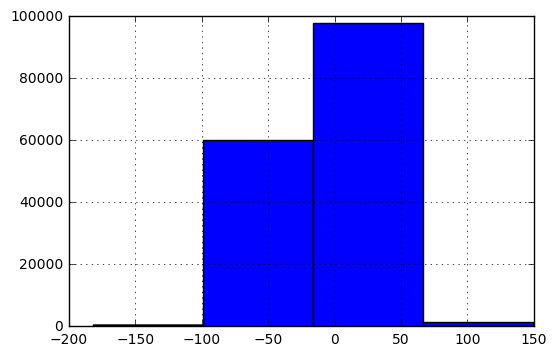

In [40]:
df.x7.hist(bins=4)

In [41]:
df.x8.value_counts()

 3.288704     1
-27.473152    1
 12.525668    1
 0.144185     1
 6.594987     1
 7.017265     1
 0.810523     1
-1.053702     1
-4.130976     1
 6.943547     1
-4.429421     1
 14.442978    1
 15.232333    1
-1.093042     1
 5.354549     1
-3.168446     1
-16.160068    1
-4.201052     1
 7.116795     1
-4.069268     1
-3.751409     1
 1.468722     1
-3.634815     1
-2.033704     1
-6.128886     1
 1.130020     1
 4.294807     1
 5.555508     1
 11.989516    1
 8.772509     1
             ..
-8.487054     1
 0.571514     1
 5.203346     1
-11.238168    1
 0.727785     1
-2.964907     1
-11.903706    1
-8.239348     1
 7.105884     1
 2.785369     1
-2.153305     1
 14.173828    1
-2.124231     1
 14.467883    1
-11.137318    1
-17.247025    1
-14.697384    1
 0.052328     1
-7.714792     1
-2.160919     1
-2.737844     1
 4.540131     1
-2.185655     1
 1.657988     1
-4.455301     1
 3.627820     1
-1.889961     1
 10.285709    1
 5.174244     1
 9.951915     1
Name: x8, dtype: int64

In [42]:
df.x8.describe()

count    159979.000000
mean         -0.030540
std           8.901185
min         -37.691045
25%                NaN
50%                NaN
75%                NaN
max          39.049831
Name: x8, dtype: float64

In [43]:
df[df.x8.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
2066,-0.215330,-2.150627,-1.750713,-15.272685,-7.543920,-5.761237,-2.545405,-1.154523,NaN,-2.392027,...,7.339407,1.317854,0.889571,-0.393886,0.690287,-23.268883,-4.135555,-2.351516,2.239161,0
12238,-0.251361,-5.282871,-10.287351,-5.767026,11.510076,-5.855501,-14.957035,-9.144269,NaN,11.192901,...,-7.854501,-2.782249,-1.101330,-0.916795,-0.221469,-30.290586,0.587189,-0.531038,-19.881421,0
13558,-0.313852,-1.816110,-5.695493,-6.806192,4.020134,5.073700,-8.280819,-43.787611,NaN,-8.598545,...,16.684425,-3.115027,-2.114107,6.109146,-0.409577,-16.547469,0.551913,-2.602506,1.290163,1
14079,0.078981,-2.166421,-15.855506,8.040726,0.712114,4.005617,-23.052714,-31.911806,NaN,0.180326,...,-18.437448,-6.468541,-2.883583,0.444981,-0.068911,31.327944,-2.317557,-2.699583,3.447696,0
19048,0.584169,-0.439953,18.938523,-16.326482,1.647009,6.843676,27.535190,42.802579,NaN,-11.463477,...,-15.812472,-5.620764,-0.229420,2.233124,0.566174,-59.539651,0.474529,-2.409252,-27.951848,1
19803,-0.055322,3.996295,-3.730180,-13.412189,3.552660,12.932892,-5.423402,-29.586935,NaN,15.794684,...,15.968756,-3.967175,-0.111388,-2.855907,-0.028563,-43.332338,2.780636,0.500447,-11.450335,0
25936,0.101255,8.869504,-14.857805,-6.365377,4.583341,-4.035405,-21.602132,-25.206788,NaN,5.936246,...,-18.074352,-16.354141,0.074177,2.187684,-0.015697,-92.596042,-4.215742,-3.540324,-9.896847,1
41216,0.352903,-7.104808,2.044430,-8.684867,-2.040336,-9.919502,2.972448,44.826890,NaN,-1.277556,...,-22.476708,-10.209439,-0.364653,1.928951,-0.130299,-44.030408,1.682681,-1.957527,-1.052872,1
44817,0.524989,13.562953,-4.619344,-0.179370,12.063651,-1.700056,-6.716179,2.633082,NaN,-2.727909,...,-4.652054,-3.410605,-0.382771,2.977114,-0.341993,-39.107490,0.742634,0.959612,-15.885357,0
44992,-1.127562,12.164069,30.566537,2.830222,-4.417044,6.659226,44.441448,53.363496,NaN,3.826921,...,16.141087,0.232344,0.136086,-3.186267,0.189099,-9.294864,-5.680712,-0.275918,-13.453316,1


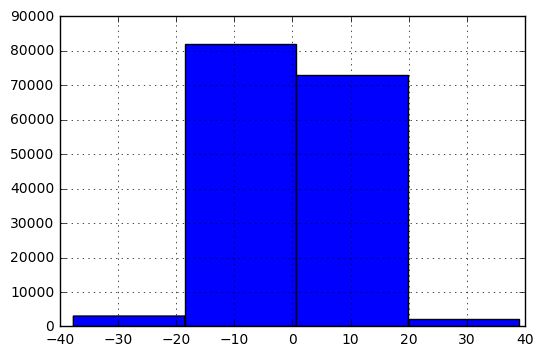

In [44]:
df.x8.hist(bins=4)

In [45]:
df.x9.value_counts()

-2.497443     1
-1.597882     1
 8.004019     1
 4.722711     1
-1.695357     1
 8.057917     1
-1.838982     1
-1.954888     1
 1.778616     1
 0.566597     1
 3.002772     1
 5.655881     1
-8.577099     1
 11.733515    1
-2.058206     1
-4.794385     1
-8.623362     1
 2.516798     1
-0.440730     1
 2.523532     1
-2.761281     1
-0.308592     1
 3.229687     1
-2.005833     1
-15.474291    1
 4.403053     1
-1.135466     1
-2.627484     1
-3.265921     1
 4.377126     1
             ..
-0.194005     1
 1.856177     1
-1.863324     1
 14.975369    1
-6.357438     1
 5.708117     1
-0.365353     1
 7.681856     1
 7.328400     1
-0.784923     1
-4.675665     1
 2.879895     1
-6.312076     1
 13.724520    1
 2.256988     1
 10.697798    1
-9.290728     1
-6.037572     1
-6.614459     1
-2.619783     1
 4.087243     1
 2.382149     1
-2.261090     1
 0.662190     1
 2.496345     1
-7.330106     1
 4.042705     1
-0.994985     1
-8.031717     1
-12.179437    1
Name: x9, dtype: int64

In [46]:
df.x9.describe()

count    159970.000000
mean          0.005462
std           6.355040
min         -27.980659
25%                NaN
50%                NaN
75%                NaN
max          27.377842
Name: x9, dtype: float64

In [47]:
df[df.x9.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
6015,0.312893,3.330053,-7.383276,4.563113,1.292987,-4.273432,-10.734729,-21.404563,-4.257973,NaN,...,4.711445,-3.848018,2.092993,5.029390,-0.923802,2.145078,1.969804,1.465650,2.168247,1
22252,0.301879,-1.823592,-5.433331,-12.856405,5.483763,-4.165414,-7.899654,-5.349534,-4.917227,NaN,...,-0.289517,-3.807928,-0.582283,-0.402338,0.676361,-39.274282,-4.994725,-1.987794,7.854982,0
31459,0.214027,-1.078041,-8.248977,8.585419,4.957764,8.140720,-11.993393,-26.094865,-7.381010,NaN,...,26.970898,0.217570,2.659047,5.909370,0.677764,-19.427814,-1.480642,-1.320544,10.064303,0
35865,-0.239918,8.648817,-19.287057,0.782532,-10.638680,-7.758414,-28.041932,-85.726805,-6.995386,NaN,...,27.716265,-14.618233,1.067955,0.537236,0.006084,-60.717155,5.151247,1.892632,-17.940571,1
37777,0.245085,-0.845991,-0.753575,3.027773,-2.386449,10.108270,-1.095641,-17.924689,4.352500,NaN,...,18.667533,0.061651,2.166157,3.188003,0.553483,-9.078249,-3.191948,0.360433,7.210914,0
39047,0.062981,-1.705683,3.340270,3.207523,2.683535,4.073754,4.856502,-23.083389,-4.039208,NaN,...,9.258744,-0.476446,1.806348,-3.602030,0.143728,-24.992385,-2.791230,-1.405482,0.263389,0
51360,0.055800,-1.118904,17.293901,-2.046832,10.498141,3.186437,25.144032,-33.081959,-2.169936,NaN,...,33.070391,-4.608788,-1.629885,2.606196,0.221752,-13.094687,2.196463,-2.067171,-11.638270,1
62568,-0.128433,-1.867242,-4.821299,3.450705,2.810014,6.026052,-7.009806,-50.402861,-0.789391,NaN,...,19.453424,-1.079268,-0.819939,5.105780,-0.222804,-29.944155,-0.879089,0.412498,5.271680,0
64412,-0.026884,3.919773,-6.100141,-11.084150,1.651835,-5.305909,-8.869146,17.179161,0.734395,NaN,...,-22.037212,1.312614,0.524397,1.162604,0.117112,54.236686,-4.039174,-3.600597,9.690222,0
67659,-0.139532,-5.210460,-12.739740,5.548448,1.854676,4.631102,-18.522624,-7.606038,-8.171326,NaN,...,-3.396691,-11.439238,-2.448897,2.466054,0.181729,-51.674371,-1.558394,0.760445,-3.018591,1


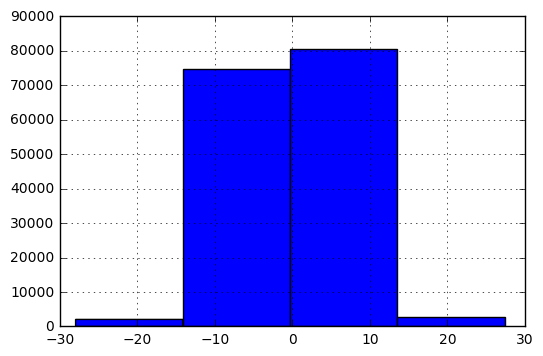

In [48]:
df.x9.hist(bins=4)

In [49]:
df.x10.value_counts()

 1.977696     1
-0.819576     1
 3.590456     1
-9.318669     1
 14.365859    1
-12.391876    1
 2.992902     1
-18.499483    1
 3.196645     1
 5.336824     1
-2.679067     1
 4.150404     1
 5.015802     1
-10.520463    1
 4.192474     1
-6.168600     1
-13.232190    1
-9.606713     1
 6.895429     1
 7.426733     1
 13.567721    1
-13.183851    1
-1.817784     1
 7.573923     1
 6.789652     1
-1.694361     1
-3.925253     1
 1.548483     1
 19.862512    1
 1.334255     1
             ..
-10.022075    1
-0.289118     1
-12.784063    1
-8.105785     1
-4.473247     1
-20.017104    1
 3.528160     1
 7.720187     1
 3.403997     1
 1.384031     1
-23.377311    1
 11.108910    1
 1.918547     1
 5.802832     1
 2.220164     1
-6.883459     1
 10.649964    1
 2.490668     1
-7.018655     1
 7.195263     1
 1.973753     1
-4.047918     1
-2.302757     1
 2.742299     1
-9.248897     1
-5.694570     1
 4.390814     1
 1.298433     1
 3.534683     1
 11.468323    1
Name: x10, dtype: int64

In [50]:
df.x10.describe()

count    159957.000000
mean          0.002253
std           7.871429
min         -36.306571
25%                NaN
50%                NaN
75%                NaN
max          37.945583
Name: x10, dtype: float64

In [51]:
df[df.x10.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
2315,0.603915,4.070544,-1.132004,14.286293,2.729500,6.255843,-1.645849,10.506547,2.484980,-3.483713,...,7.033149,-7.224284,0.046556,-2.360985,-0.714778,-67.866938,6.147778,1.055510,-9.736004,0
7132,0.062336,-1.111194,-26.154029,3.458760,10.963791,-1.804501,-38.025993,-18.984183,-16.391993,0.059235,...,-0.465046,-11.819354,0.365566,3.086148,0.119856,-76.121678,-2.749256,2.498528,-9.895368,0
8935,0.069570,-7.803994,-15.065162,20.425483,4.884353,-0.896425,-21.903614,2.137080,9.403668,-0.934467,...,-4.743139,0.081190,-1.547236,-5.524061,0.433563,-43.059345,-1.325720,1.235743,-5.364969,1
11853,-0.395371,0.158829,17.642286,-7.898927,1.653912,-0.864774,25.650558,-5.720433,-5.286486,2.506480,...,5.003335,-2.827842,1.299390,-2.099518,0.175917,-17.178249,-1.116034,-1.988092,-3.813254,0
13971,0.221990,4.454737,2.062610,11.694818,7.204335,-0.877343,2.998880,38.700023,-6.431622,-4.312745,...,-2.194172,-7.424921,-1.603558,4.424911,0.031571,-91.318190,0.840750,1.085719,-23.766312,0
15352,0.222190,6.461315,7.991776,6.174090,-2.257090,-0.365039,11.619441,-37.342817,-9.584033,0.869659,...,29.260217,-1.436226,-1.908441,5.285482,-0.094147,-65.536210,-3.715082,-2.749754,-37.681923,0
16457,0.536208,2.722021,-11.290566,6.473197,5.427780,8.139060,-16.415635,-52.821946,-19.196639,-0.196496,...,22.052784,-4.432428,-0.186854,-0.366195,0.053618,23.229495,7.819614,2.620071,0.520516,1
20326,-0.039531,-8.987747,6.543671,-9.297631,1.902349,6.034711,9.514006,-7.704831,-18.788336,-1.098317,...,-15.948307,2.401082,-0.404622,-6.413555,-0.649412,39.447963,2.349605,0.041103,4.303814,0
24956,-0.706655,-2.400235,26.718667,0.167313,-0.321922,-1.291595,38.846934,54.524887,-1.199967,0.085211,...,-2.446318,4.770782,-0.131680,0.254306,-0.266368,-16.853905,-5.582825,-4.597867,-11.313354,1
28246,0.248224,9.243006,16.946001,-0.342796,-3.049564,-8.605758,24.638212,-13.962190,1.821377,-4.335894,...,26.557642,-8.617888,2.322511,-3.095665,-0.004961,-56.173423,-5.183310,0.630467,-34.016889,0


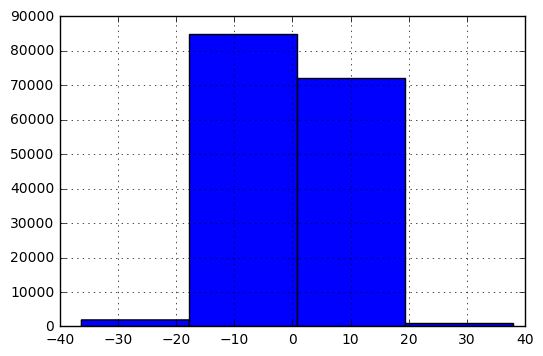

In [52]:
df.x10.hist(bins=4)

In [53]:
df.x11.value_counts()

-0.274404     1
-3.956853     1
 0.637523     1
-1.008868     1
 6.119873     1
 9.114466     1
-1.740018     1
-14.062206    1
-12.466299    1
-4.230684     1
 18.147856    1
 1.905889     1
-3.779737     1
-12.550514    1
 7.148394     1
 5.288570     1
 3.490816     1
-10.403610    1
 11.062115    1
-3.725674     1
 11.370488    1
-8.564792     1
 2.941261     1
-6.596214     1
-18.182273    1
 5.798439     1
 3.958915     1
-7.126557     1
 1.233193     1
-7.906082     1
             ..
-10.946909    1
 1.625354     1
 8.157450     1
 0.739453     1
-7.123236     1
-7.470826     1
 8.109029     1
-11.881689    1
-12.880955    1
 7.910232     1
-8.626615     1
-5.332003     1
 2.916381     1
-9.248182     1
 2.953008     1
-8.468629     1
-11.381724    1
-6.010239     1
 3.785384     1
-2.058571     1
 7.921802     1
 3.878971     1
-2.908742     1
-9.250997     1
-6.135552     1
-20.659162    1
 11.785491    1
 0.795842     1
 6.493398     1
 3.869411     1
Name: x11, dtype: int64

In [54]:
df.x11.describe()

count    159970.000000
mean          0.030232
std           8.769633
min         -38.092869
25%                NaN
50%                NaN
75%                NaN
max          36.360443
Name: x11, dtype: float64

In [55]:
df[df.x11.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
721,0.010037,10.041218,5.900489,-16.390367,-1.210439,3.181125,8.578868,21.762029,-10.732786,-3.674159,...,18.778105,1.650016,-1.087136,1.120943,0.067401,-0.178487,5.562373,1.857167,15.833535,0
6506,0.395145,-4.460183,-14.346655,-7.424406,-3.324015,-2.133845,-20.858958,-55.140120,-6.891016,-3.105526,...,-1.537717,-7.035690,-0.306068,2.974646,0.609681,26.567838,1.538716,-0.306866,4.373490,0
8563,0.229472,-1.370617,-18.666269,-0.008578,-1.318455,8.041375,-27.139353,-32.286149,-17.064670,-4.068735,...,2.434258,-0.447344,0.187845,8.609378,-0.014593,2.110066,-6.342475,1.850523,4.782091,0
22104,-0.601949,-9.108849,-18.442117,2.771104,-1.720488,-9.571326,-26.813453,-31.468968,3.392345,-6.050085,...,18.861445,-2.984590,-2.523223,-1.727441,-0.645475,-26.571520,-1.073967,1.226909,9.627866,1
24255,0.058681,5.979982,2.446215,1.991945,8.301885,3.073874,3.556613,10.032665,-8.469697,-9.159359,...,35.541205,2.444674,2.012610,-0.920866,0.289869,-21.826461,0.219165,1.965857,24.726068,0
26625,-0.699739,-4.064212,-2.189268,17.466187,-4.234315,13.480771,-3.183031,29.027604,8.426915,11.616424,...,-4.778149,-5.435310,-0.595603,-2.520080,-0.242260,-76.915249,-0.826239,-0.493552,-15.132563,1
26676,-1.102773,-12.717679,-7.776411,0.681007,2.901711,0.410681,-11.306317,35.753038,9.731590,-11.940667,...,-3.315375,-9.582573,-2.228808,-3.128983,-0.401694,-43.117773,2.660366,-1.498823,19.296495,1
37927,0.139212,5.178514,-16.320828,-4.068998,-3.295108,7.784311,-23.729258,-17.589561,-3.419888,-7.592608,...,-0.729127,-3.027159,-0.409519,-4.032803,1.015373,-27.829936,-0.081893,1.244190,1.212995,0
44715,0.221518,-12.032049,1.414097,2.612160,-12.872466,0.193116,2.055991,7.610756,-0.290134,4.394532,...,10.434766,3.679018,-0.589835,-7.984993,-0.670419,-14.087903,-8.147271,-4.513215,13.211022,1
50656,0.030942,-4.661369,4.645657,-1.347172,-2.674072,4.163354,6.754436,-44.298509,-15.071011,-6.279801,...,35.409029,1.451477,2.051666,8.840666,-0.156720,-4.194071,-6.796059,-3.898570,1.401686,1


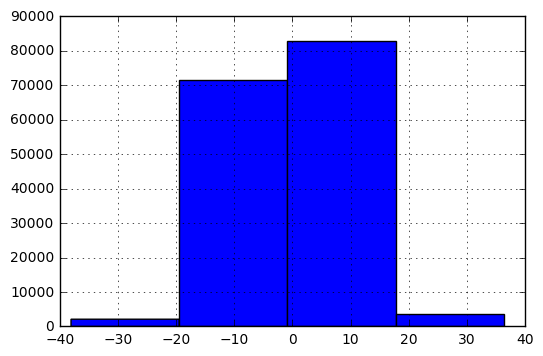

In [56]:
df.x11.hist(bins=4)

In [57]:
df.x12.value_counts()

 19.531204    1
-7.507507     1
 23.015950    1
-6.929778     1
-3.037251     1
 1.649643     1
-9.138998     1
 24.352833    1
-14.972303    1
 2.084631     1
-16.103809    1
 18.370930    1
-2.243848     1
 4.357284     1
-20.852596    1
-11.655176    1
-20.801769    1
 12.593256    1
-13.862445    1
-25.445428    1
-14.336865    1
-1.226014     1
 7.800124     1
 8.632600     1
 4.117858     1
-4.384272     1
 3.138695     1
-16.254031    1
 27.742192    1
-2.001706     1
             ..
 26.597714    1
 10.120512    1
 17.740400    1
-16.847720    1
 3.597782     1
-14.470537    1
-3.715306     1
 14.138399    1
-7.779638     1
-4.096450     1
 13.094836    1
-21.234647    1
-9.595018     1
-5.519816     1
-27.478106    1
 14.035929    1
-4.416741     1
 2.723651     1
-19.184428    1
-14.754186    1
-19.697871    1
 8.857050     1
 4.160285     1
 2.563159     1
 12.331267    1
-30.103350    1
 3.982364     1
-8.873109     1
 0.921496     1
 22.952089    1
Name: x12, dtype: int64

In [58]:
df.x12.describe()

count    159964.000000
mean         -1.334402
std          14.750990
min         -64.197967
25%                NaN
50%                NaN
75%                NaN
max          73.279354
Name: x12, dtype: float64

In [59]:
df[df.x12.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
1393,-0.140785,5.262250,-3.451158,-0.190581,-14.666984,-16.966668,-5.017725,-18.862359,10.095432,-6.325165,...,28.503251,-1.179264,0.907787,-1.043701,-0.678055,-23.457858,-6.447005,2.095669,-5.489436,0
2074,-0.169884,5.079342,-0.066622,6.753193,-0.509911,-1.385161,-0.096863,3.150426,-3.221618,-9.264757,...,45.369964,-4.519804,-1.798359,-4.922620,0.534797,-54.962612,-2.949785,3.804709,10.218024,0
12333,-0.690968,-4.133952,21.736819,11.110361,-1.359404,2.747341,31.603701,23.690117,6.190062,0.880624,...,1.207271,0.851863,1.169974,2.913581,-0.025591,-41.454997,-5.557556,-0.591694,-18.169464,1
14070,0.286957,-3.226743,-3.520511,-7.535151,14.764705,-4.173268,-5.118558,-22.195525,-0.622459,3.556364,...,14.198586,-12.255254,2.861819,-3.173276,-0.055311,-31.744352,5.629682,1.248225,-9.135002,0
17783,-0.240045,2.210584,15.333213,7.964575,-1.700057,-2.963502,22.293339,37.219139,1.242368,0.820422,...,3.525168,-5.489408,-0.356886,1.682768,0.346298,-86.258170,-13.434265,0.250782,-22.119958,0
22563,-0.025725,-7.817293,2.633314,8.885255,-4.734329,-7.871687,3.828641,49.772621,9.611915,2.424169,...,-19.994485,2.646316,0.778001,-4.890952,0.024213,-22.814856,1.504292,-1.731065,13.878608,1
23172,0.368834,11.140329,8.923798,1.819305,-3.789568,9.282203,12.974532,-30.209318,-7.824200,10.164084,...,25.674150,-6.706095,-0.617813,-4.386497,-0.326831,-2.025371,-3.595419,-0.364378,5.780652,1
32983,-0.034475,-1.681707,-0.759187,-3.337869,-2.455428,-1.202012,-1.103801,-83.839663,-9.029524,0.211623,...,36.260988,-3.021445,1.797557,-0.153481,-0.276241,60.804177,1.736652,2.244757,20.348660,1
33608,-0.175672,4.151137,-0.339916,7.142430,2.989857,-5.339063,-0.494213,29.901165,-6.371631,-0.061387,...,-3.212799,3.715724,-0.291044,1.335516,-0.025369,-62.401835,-7.054025,-1.850075,-8.779534,1
36335,0.247808,-3.371663,-2.680636,-10.951523,-2.252309,0.506296,-3.897443,-22.984551,1.689699,-3.149860,...,-8.668450,2.598259,-1.976916,-1.522975,-0.524217,47.470262,7.576868,-3.930022,3.529462,0


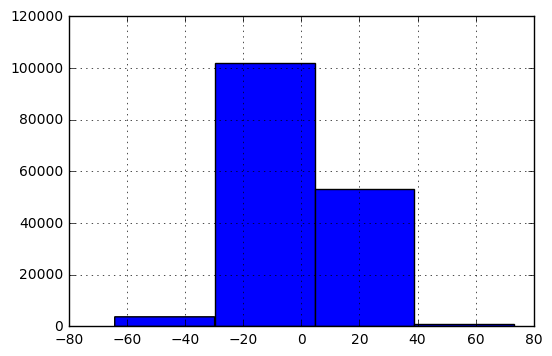

In [60]:
df.x12.hist(bins=4)

In [61]:
df.x13.value_counts()

 8.696758     1
-9.023449     1
-1.969946     1
-8.708893     1
 1.334475     1
-1.615697     1
 1.555220     1
-4.589775     1
-9.829506     1
-0.481398     1
-7.618818     1
-6.135821     1
 0.901276     1
 13.742397    1
-0.801437     1
-11.443076    1
-9.139140     1
-15.497610    1
 0.390635     1
 3.433656     1
 0.436757     1
 0.526437     1
-9.922367     1
 5.832995     1
-1.024214     1
 10.647148    1
-5.191225     1
 1.263834     1
 18.637454    1
 2.368918     1
             ..
 10.688276    1
-4.357295     1
 2.883751     1
-1.107196     1
-12.562281    1
-8.867755     1
 12.643437    1
-8.401148     1
-7.728797     1
-7.244953     1
-3.620383     1
-2.770668     1
-15.772879    1
-6.367572     1
 4.673350     1
 18.364795    1
 21.730914    1
-12.490586    1
 11.736948    1
-11.956492    1
-8.442614     1
-5.956474     1
-3.435190     1
 6.962785     1
-17.117856    1
 3.481039     1
 14.322528    1
-6.080312     1
 5.942851     1
-13.262916    1
Name: x13, dtype: int64

In [62]:
df.x13.describe()

count    159969.000000
mean          0.007669
std           8.953837
min         -38.723514
25%                NaN
50%                NaN
75%                NaN
max          42.392177
Name: x13, dtype: float64

In [63]:
df[df.x13.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
829,0.013720,-3.356268,-25.400476,-6.414114,-4.338652,8.013745,-36.930383,16.148775,4.297079,-11.115921,...,-9.436692,-0.876853,-0.170160,-3.659884,-0.522026,-92.377474,-0.110564,4.007731,-10.313800,0
1488,-0.373258,-7.744854,-38.180934,6.757737,6.238138,4.863451,-55.512209,-74.774879,-6.864305,-2.313394,...,-13.274609,-5.692112,2.011052,9.487985,0.946169,63.215777,-3.919378,-1.736315,15.523304,0
2274,-0.148143,-4.228350,12.716385,2.785040,1.337250,12.704113,18.488669,25.856285,2.067872,1.467779,...,11.461785,5.597290,-1.210646,2.494265,0.250067,-3.679493,-6.313526,-4.176345,12.244232,1
15560,-0.253261,-2.904344,-3.866268,5.707816,8.152449,-0.138520,-5.621263,-3.870597,3.447515,-1.010009,...,-2.270157,-0.931931,0.254822,1.583950,-0.430385,-9.434843,5.489218,1.079547,4.923261,1
23433,-0.693034,-0.821965,9.172302,7.900800,4.955032,17.979341,13.335838,-12.878291,-12.042741,-3.363583,...,18.290820,-3.861242,-0.470907,-6.447464,0.578375,-78.880619,-4.398185,0.386501,-10.127837,0
23823,-0.154873,2.625839,-5.952876,-2.585988,-13.761565,-13.772313,-8.655034,23.935286,4.340548,-4.219334,...,-1.802088,-1.340500,-1.813443,-0.671497,0.458958,-79.364999,5.486342,2.662204,-16.986932,0
26904,-0.133546,2.434136,-0.108694,-1.392598,-6.424395,-0.630672,-0.158033,10.508280,-2.871292,3.700225,...,-11.120671,-0.973391,0.254356,3.389007,-0.166774,-51.104814,-1.071561,-0.470455,-29.104193,0
32367,-0.299833,7.478982,-3.750301,-0.954052,3.977445,-5.529238,-5.452657,-38.159508,-0.290818,6.863271,...,26.445781,-5.211004,-1.739062,0.619968,-0.485765,-75.819218,-2.285218,1.382683,-13.418043,0
32922,0.096091,10.120424,-15.413426,11.801484,-0.630123,9.013606,-22.409963,5.364712,-3.881967,-8.996040,...,-0.595756,-5.263982,0.701801,1.250449,0.224286,-65.962473,-7.404733,2.466877,-8.058925,0
36855,-0.442846,-4.451054,-28.293079,1.107666,-10.079160,3.366380,-41.136012,10.148345,-7.037430,-5.943771,...,-15.701350,-5.740418,-1.020048,-2.986700,0.365103,-55.190652,6.320543,2.535942,6.803107,1


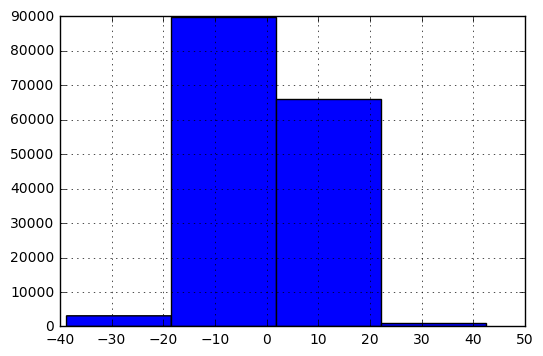

In [64]:
df.x13.hist(bins=4)

In [65]:
df.x14.value_counts()

-0.329529     1
-5.160232     1
-15.700567    1
 0.439432     1
 8.924582     1
 2.098337     1
-2.230679     1
-7.621865     1
-1.255696     1
 1.246133     1
-5.890172     1
 3.327072     1
-9.361967     1
-7.649196     1
-2.735069     1
-1.717494     1
 7.881242     1
-11.125452    1
-2.921971     1
 11.389075    1
 6.489250     1
 0.904584     1
-3.015480     1
-4.902779     1
-3.852043     1
-2.688141     1
 1.747820     1
-14.589547    1
-2.207298     1
 8.251734     1
             ..
 1.400297     1
 4.973262     1
-2.419173     1
 2.040371     1
-0.930219     1
-3.121437     1
 7.314289     1
-11.789201    1
 4.336856     1
-1.842436     1
-6.109005     1
-3.927869     1
-8.212388     1
 6.045137     1
 3.245051     1
-4.140526     1
 4.529394     1
-0.104833     1
-7.850560     1
 1.593209     1
 1.385600     1
 10.087318    1
 8.566058     1
-1.065972     1
-10.633683    1
 5.829411     1
 2.493931     1
-1.525904     1
-1.802406     1
-8.039219     1
Name: x14, dtype: int64

In [66]:
df.x14.describe()

count    159966.000000
mean          0.008104
std           6.964097
min         -30.905214
25%                NaN
50%                NaN
75%                NaN
max          32.546340
Name: x14, dtype: float64

In [67]:
df[df.x14.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
5801,-0.507311,2.543567,-4.558791,4.758628,-5.356734,6.754531,-6.628140,-35.150946,2.063626,-11.261034,...,11.803028,-3.215393,2.977172,5.413732,0.008331,39.937722,3.690953,-1.702012,7.341633,0
8943,0.010537,-4.544061,-7.173152,16.972243,4.217252,14.760286,-10.429224,-15.122114,-2.130382,5.008486,...,16.528068,-2.620104,-0.637691,4.716110,0.399098,-18.801580,0.953657,0.269062,1.292948,1
9592,-0.038910,1.358754,-12.658581,15.190819,-10.406581,-10.707967,-18.404625,-56.820636,4.463317,7.179652,...,15.198948,-6.613915,-0.781197,-0.550295,-0.030368,-49.199183,-0.114520,0.693392,-12.663378,0
12291,0.017487,9.138860,-14.218693,-11.316553,3.364299,-0.664903,-20.672911,-26.459508,-0.030307,-4.208256,...,-22.097608,-9.557158,1.104526,-3.799372,-0.424690,-62.398388,8.033285,-0.279196,-16.236314,1
18653,-0.139259,-4.027485,15.680265,6.543045,-5.787739,-2.278866,22.797927,-29.637553,25.613137,13.671931,...,37.224883,0.672079,0.731523,11.407999,-0.161720,-22.460428,2.468634,-1.601465,-21.388342,0
20221,-0.025838,-3.763522,-4.996204,7.181776,4.151691,-13.159623,-7.264106,1.238741,12.298610,-2.261716,...,-2.897439,-1.911257,3.038030,0.311661,0.019746,-35.294273,-3.993120,2.605371,-16.390415,0
29131,0.245589,-0.380788,-14.020158,10.115761,4.422240,8.828592,-20.384257,47.151240,6.340332,6.290597,...,-28.877838,11.550520,-1.458901,4.733573,0.012070,37.981471,5.536947,-1.402446,22.491210,0
38393,-0.268643,-4.169787,5.917133,9.129613,-11.067443,-5.101310,8.603066,46.396509,-7.052041,0.554635,...,-17.537793,3.249992,-0.268518,-0.966436,-0.183024,11.724828,-3.812800,-5.617257,30.037011,1
42483,0.623492,-6.121608,1.945366,2.860631,4.927413,-4.473493,2.828416,-4.532037,-15.619254,7.865636,...,25.259951,-3.056447,0.128644,-3.244205,0.198412,-11.537483,2.479116,-0.924303,9.682652,1
60992,0.132737,5.760474,-7.508910,-16.483490,4.517895,1.054449,-10.917391,-25.097825,-6.312365,1.090648,...,7.461525,0.257039,-1.869165,6.974054,0.650085,42.778353,-3.163282,-0.948248,5.445424,0


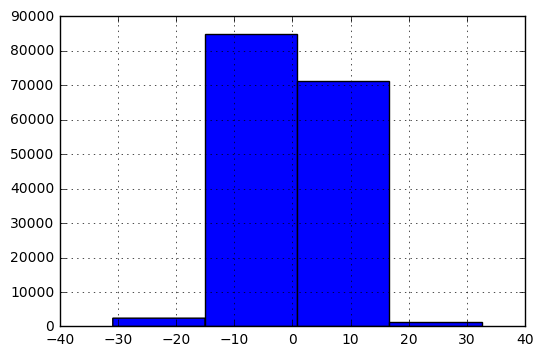

In [68]:
df.x14.hist(bins=4)

In [69]:
df.x15.value_counts()

-0.127041    1
 1.460577    1
 2.075373    1
-3.278627    1
-5.218919    1
-0.630772    1
 0.361451    1
-2.191661    1
 1.062317    1
-0.738606    1
 5.272405    1
-0.000163    1
-5.540893    1
-2.230767    1
-3.840204    1
-0.814372    1
 0.284329    1
 0.466678    1
-6.603973    1
 0.931332    1
-2.208294    1
 3.624684    1
-5.892318    1
-2.169222    1
 6.842609    1
-0.413958    1
 1.841523    1
 0.309262    1
 1.686317    1
-0.833283    1
            ..
-1.388883    1
 8.148631    1
-0.769088    1
 1.419579    1
 0.539545    1
-2.245898    1
-1.730866    1
-2.253642    1
 3.550087    1
 1.701939    1
-1.183547    1
 0.405557    1
-2.303693    1
 3.801237    1
 2.114718    1
-3.337367    1
 0.997076    1
 2.353951    1
-1.722433    1
 2.093454    1
-1.079138    1
-5.351611    1
 2.598361    1
-7.244565    1
-6.126097    1
-4.304730    1
 0.635803    1
-2.816917    1
 3.774643    1
 3.061074    1
Name: x15, dtype: int64

In [70]:
df.x15.describe()

count    159965.000000
mean          0.001215
std           3.271779
min         -17.002359
25%                NaN
50%                NaN
75%                NaN
max          13.782559
Name: x15, dtype: float64

In [71]:
df[df.x15.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
2992,0.007960,13.107893,9.351163,1.675837,0.910111,8.665164,13.595888,-8.083544,-4.993907,3.501070,...,11.243526,6.693286,-3.055436,-8.188599,-0.435756,4.901984,2.625760,-3.461973,-0.628375,0
7566,-0.025361,1.536917,9.495069,4.128056,3.250303,12.855389,13.805117,-20.793418,-8.397614,-5.637395,...,7.350121,6.055224,-0.359078,-1.273070,-0.538605,52.800398,5.200524,-2.723747,3.351306,0
10058,0.262849,-1.740042,3.109600,-5.798235,4.778061,1.801400,4.521125,15.596294,-21.419427,-0.221622,...,-26.140284,2.350998,-0.499649,1.962319,-0.052019,36.461965,3.344707,-3.957552,-7.037613,0
16121,-0.402414,1.499237,-6.300094,1.368321,-6.814719,2.865658,-9.159863,5.721999,12.840081,-6.947193,...,-3.673949,3.854138,0.875320,1.930414,0.452078,2.608269,2.121100,-4.267618,24.783693,1
20001,0.085308,1.834964,-1.485432,2.821065,0.231139,10.070581,-2.159707,32.403162,8.727094,-4.620821,...,-2.867888,3.883028,-0.254560,2.270792,0.800500,-29.498069,-0.312894,1.984021,-6.744134,0
21820,-0.195516,7.440430,20.130855,8.089206,7.260247,5.271948,29.268750,-36.305463,3.810564,11.447952,...,50.978392,2.939008,-2.251938,-5.084578,0.355699,-6.537493,3.058985,-1.153538,-7.173862,0
23419,1.003015,-3.843333,-6.230640,-10.727763,6.846628,-10.909592,-9.058882,-59.029758,-0.324805,8.550680,...,5.723678,-9.491535,0.766201,0.068451,0.109181,-15.748972,0.909636,-2.355988,-24.278785,0
27909,-0.517238,7.172558,2.186654,-6.924621,9.307841,-3.649374,3.179231,-5.527850,2.246473,-2.584245,...,-10.020553,5.873558,0.990309,-0.443038,-0.588988,49.913288,-4.681125,-1.809984,17.443239,0
30231,-0.657390,-3.665825,-1.573956,0.519115,16.693095,-5.080473,-2.288413,5.359991,4.485053,-7.634900,...,-4.150846,-10.895154,-0.617965,0.753006,-0.059704,-51.735826,8.296929,-1.301583,-10.279355,1
34410,-0.068667,-0.750678,-0.680374,-3.539825,1.888270,7.835479,-0.989213,-23.005893,-7.272596,-0.573270,...,12.246370,-1.623090,-1.313501,4.286342,-0.013193,-14.702073,5.142552,1.111622,9.926534,0


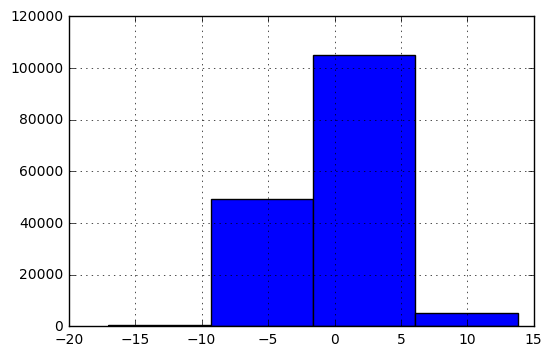

In [72]:
df.x15.hist(bins=4)

In [73]:
df.x16.value_counts()

 2.950952     1
-5.932147     1
 1.827524     1
-3.228425     1
 8.150321     1
-13.101976    1
 9.880228     1
-5.403249     1
 9.174391     1
-2.070559     1
-2.333045     1
 0.826479     1
 1.122355     1
-4.901619     1
-1.714001     1
-8.707326     1
 0.141411     1
-0.264639     1
-0.238100     1
 1.491306     1
 5.086427     1
 3.417473     1
 3.616485     1
 6.411294     1
-8.685861     1
 4.153106     1
-3.985189     1
 4.942436     1
 1.306424     1
-6.236863     1
             ..
 9.015350     1
-9.052352     1
-0.571628     1
-3.566831     1
-4.444307     1
 5.296692     1
-0.518900     1
 9.386952     1
 10.405404    1
 5.871138     1
 1.907475     1
 5.368943     1
-0.242412     1
-2.729550     1
-1.659927     1
-1.594512     1
-3.541275     1
 7.217136     1
-2.265303     1
 6.976164     1
-6.262527     1
-0.166456     1
-2.824607     1
-3.000412     1
 2.004718     1
-3.371424     1
 0.578974     1
-1.127670     1
 7.438601     1
-1.816072     1
Name: x16, dtype: int64

In [74]:
df.x16.describe()

count    159974.000000
mean          0.006223
std           4.984065
min         -26.042983
25%                NaN
50%                NaN
75%                NaN
max          21.961123
Name: x16, dtype: float64

In [75]:
df[df.x16.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
1461,-0.065806,-0.700621,-4.896436,-19.192427,4.413235,-7.731626,-7.119050,51.783393,2.121165,-1.906013,...,-19.309003,-2.555587,1.754104,-1.207397,-0.449729,-48.246828,-3.193104,1.228552,-19.159134,1
14149,0.173140,3.185556,-16.306606,-3.295203,1.916980,19.927273,-23.708580,19.792384,-6.155444,13.265007,...,-25.453703,0.997728,-0.558552,-2.626643,-0.583102,24.510398,-7.446112,-0.351064,35.908079,0
16477,0.096723,-1.882019,-20.039018,-12.170760,0.440162,-4.006425,-29.135226,-29.174794,6.628861,-4.090947,...,-15.499836,-3.581367,0.462523,-1.910090,0.239098,-7.179060,-2.440359,-0.347330,-13.300887,0
16543,0.246864,-3.005468,-11.813702,-5.380690,-5.625480,5.980537,-17.176235,-29.614513,-10.989793,1.050761,...,19.693497,-12.757650,0.725471,-8.522580,0.288021,-36.574912,1.176051,0.171063,13.956870,1
28096,-0.391151,4.831694,28.036466,-1.733541,-3.167553,9.335054,40.762914,-8.158917,-0.832509,4.911797,...,-12.561986,0.832890,0.311232,-4.894008,-0.587800,3.468040,4.036709,-0.528151,-32.162575,0
29432,-0.245337,6.589303,-3.175090,-2.556161,-5.922629,-1.873956,-4.616342,-4.245252,-1.864442,-0.017844,...,4.189504,-2.504990,-1.652812,7.752559,0.791146,-19.776694,1.594700,-1.320111,-5.958103,1
35980,0.250115,-2.845301,3.880249,0.162629,9.979299,0.270291,5.641590,-36.154910,-0.516794,-6.451577,...,17.768357,-1.158204,-3.117412,-4.024711,0.578459,-11.570549,-0.718596,-0.803955,-2.523851,0
36866,0.668332,-0.811826,-8.329313,-2.723130,5.401049,10.908574,-12.110195,8.583525,10.198637,-4.702347,...,3.682610,-0.827798,0.808021,-5.749479,0.161879,-1.207162,-7.508865,0.192925,10.930404,0
45891,-0.058438,-6.458157,-1.179754,-1.274784,5.197142,-14.257245,-1.715274,12.208964,-4.403589,-0.189226,...,-15.246461,7.279508,-0.932481,-1.862401,0.065928,60.618588,0.111068,-0.913605,35.771626,0
55057,-0.049524,-10.551466,-7.740641,-7.181950,2.552033,-1.835817,-11.254311,-15.738212,-3.936561,-4.065402,...,-11.851142,-0.104790,0.352493,1.157146,0.183984,53.435197,-2.499948,-3.424218,7.704980,0


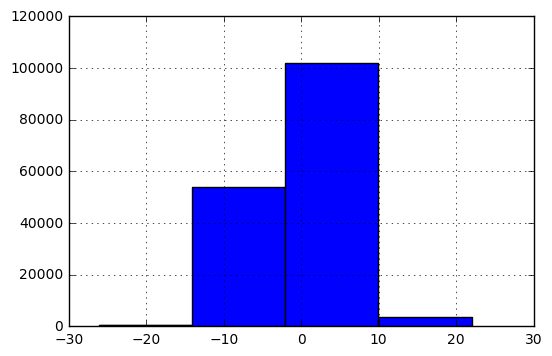

In [76]:
df.x16.hist(bins=4)

In [77]:
df.x17.value_counts()

-4.179285     1
 3.915602     1
-19.827629    1
-1.961057     1
 0.219307     1
-7.474283     1
-11.093148    1
 0.308190     1
-4.353617     1
-0.690919     1
 4.330146     1
 4.949433     1
 4.121239     1
-0.731478     1
 1.788743     1
 3.654410     1
 2.177813     1
 1.270684     1
 8.101240     1
-2.114488     1
 7.435207     1
-4.274009     1
 4.857156     1
-6.294410     1
-1.649684     1
 6.082290     1
 13.054167    1
 8.008966     1
-2.427056     1
 3.394516     1
             ..
-0.702327     1
 9.247097     1
 6.282011     1
 11.066235    1
-11.138218    1
 5.275082     1
 2.533267     1
 19.255059    1
-6.097607     1
 8.229279     1
 1.584530     1
 6.497570     1
 2.161067     1
-0.165959     1
-1.427136     1
 8.244382     1
 18.586789    1
-4.899580     1
 4.539873     1
 6.429119     1
 1.108266     1
-8.370704     1
 1.055430     1
 2.910442     1
-15.661790    1
 4.779705     1
-2.245770     1
-9.905971     1
-8.347114     1
 25.185493    1
Name: x17, dtype: int64

In [78]:
df.x17.describe()

count    159973.000000
mean          0.012040
std           7.569351
min         -34.395898
25%                NaN
50%                NaN
75%                NaN
max          37.057048
Name: x17, dtype: float64

In [79]:
df[df.x17.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
4875,-0.189410,-6.172357,-5.825737,-11.996495,-5.949097,-4.729872,-8.470183,-41.740620,-7.290318,-0.247015,...,35.536419,-5.144285,0.362624,0.526709,0.390362,25.397056,1.565915,2.148371,24.908354,1
10431,0.314772,1.310769,15.804465,4.925488,5.526661,12.377945,22.978505,3.543584,-5.724237,-3.261005,...,15.058505,-0.649221,-2.463233,2.143899,-0.247476,-35.570433,-1.616714,-0.852187,-4.821756,0
19173,-0.132523,7.738291,7.731433,4.646744,-0.731698,-15.903828,11.240923,-17.552358,8.521702,-9.562259,...,0.307215,1.255895,2.500886,-4.641982,-0.134041,16.702836,1.859502,-1.181764,-16.148764,0
37443,0.087143,-1.399889,-15.808890,-1.619551,-11.563339,2.450137,-22.984939,65.720998,-12.442269,6.153746,...,-37.249073,-1.349342,-0.826724,-0.184292,-0.673069,-18.526155,9.050866,-0.990789,20.360235,1
46005,-0.093030,-0.550957,-11.465328,4.529663,-3.308055,13.060508,-16.669726,39.223776,-12.691175,-8.304410,...,-29.515890,-3.058320,2.068971,-0.705791,0.043461,-91.242305,1.389183,2.238772,-50.972280,0
50022,-0.187357,-3.058119,23.126297,11.832058,-11.438811,5.959665,33.623898,9.279684,3.527545,-4.823283,...,-7.108755,6.170422,0.052588,-7.158520,0.310545,44.031607,-11.066725,-0.355182,-5.358327,0
50871,0.127207,1.709957,-0.530372,-7.477462,0.118165,-2.807568,-0.771120,4.425343,-0.713453,4.486811,...,-9.756315,-5.169650,-2.373349,1.134343,0.513597,-22.079993,9.822131,-2.357306,-5.718106,0
66812,0.508607,14.141701,-6.682450,-8.875865,10.688734,6.475893,-9.715780,-17.404929,-9.539831,-2.685983,...,9.149719,5.565480,1.896885,0.709359,0.176720,11.289879,4.920591,3.019254,8.258872,0
70213,-0.178015,1.312658,-10.426614,1.179996,6.266806,11.643571,-15.159513,-37.495923,-15.450401,10.195192,...,-32.742658,-2.573657,-0.145077,-1.082177,0.085561,37.766067,1.861970,-5.075694,-18.829956,0
72319,0.489220,-5.859362,-3.492002,8.787872,0.652412,-8.319828,-5.077108,47.512297,7.882337,9.799218,...,-14.068419,6.156534,0.422344,-3.212387,-0.108452,-70.384863,-6.144030,0.522738,-3.616229,1


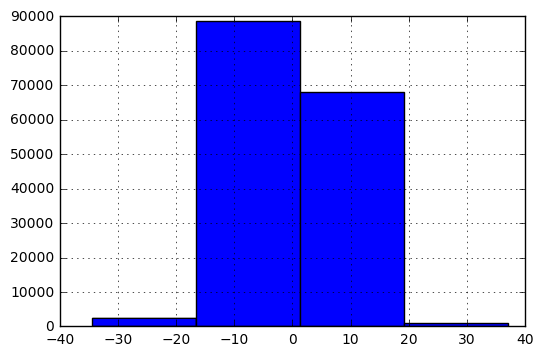

In [80]:
df.x17.hist(bins=4)

In [81]:
df.x18.value_counts()

-0.731181     1
 2.124803     1
 1.457056     1
 5.696319     1
-4.528678     1
-13.625077    1
 5.770723     1
-1.707373     1
 2.345947     1
-1.345058     1
-2.015169     1
 1.087175     1
-3.295306     1
-4.193228     1
 8.502806     1
 5.171590     1
-1.140314     1
-3.849850     1
-6.946063     1
-1.212206     1
-1.468414     1
 4.470113     1
-0.816086     1
 2.984820     1
-1.850596     1
 1.030095     1
 5.269571     1
-1.238369     1
-1.493905     1
 0.138545     1
             ..
-2.913254     1
-4.939023     1
 0.219860     1
 2.855788     1
-5.237821     1
-5.239990     1
 2.584072     1
 1.884630     1
 6.953131     1
 4.771906     1
 6.641886     1
-9.707549     1
-2.150087     1
-1.528004     1
 9.019994     1
 1.408283     1
-7.509221     1
-3.218614     1
-0.804907     1
-3.316155     1
-3.210188     1
-2.944012     1
-5.855075     1
-4.153917     1
-3.747478     1
 1.862137     1
-7.225866     1
 13.188527    1
-1.896606     1
 0.665362     1
Name: x18, dtype: int64

In [82]:
df.x18.describe()

count    159960.000000
mean          0.012694
std           4.540714
min         -20.198686
25%                NaN
50%                NaN
75%                NaN
max          19.652986
Name: x18, dtype: float64

In [83]:
df[df.x18.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
9776,-0.000810,-4.670209,-6.905792,9.739275,-0.011882,14.454546,-10.040503,11.386772,7.513931,1.448563,...,-13.902666,-2.602434,-1.213697,0.763471,0.144889,-28.782567,-3.323459,0.886476,-0.325183,0
11154,-0.260323,11.758068,0.326184,7.430347,5.090309,9.682793,0.474247,6.110278,-12.466393,1.456049,...,-7.804901,1.972125,2.399499,-7.830611,-0.177834,60.266449,7.752822,-3.244062,17.608672,0
15821,-0.226039,-1.187263,8.063679,0.431440,9.778908,8.765589,11.723984,-19.448767,-11.907940,2.825017,...,28.312168,1.725546,0.688762,-6.247368,-0.017407,4.866371,-1.988504,0.554092,3.977860,1
23828,-0.530550,-2.080754,-14.029354,6.915802,-12.336797,0.014228,-20.397626,27.118392,-2.326489,4.878995,...,-27.460260,-0.717299,1.224575,7.821327,-0.460143,-29.151432,1.773018,1.394570,-4.536353,0
26812,-0.111168,-4.558534,28.330369,-4.304599,-9.168698,-6.659200,41.190228,-5.086116,7.295779,-1.362633,...,39.854039,5.044224,-1.121046,-4.651741,0.377927,27.511294,11.980678,-2.393859,24.465310,0
27592,-0.447155,1.738827,1.471342,-18.249352,1.351367,-1.241659,2.139221,27.016446,-9.974320,-4.249424,...,18.155488,7.101781,-1.259362,-3.558955,-0.333712,38.090829,0.284792,2.197891,21.286784,1
28607,-0.370948,-10.067650,4.775237,2.780723,-9.637216,11.810815,6.942836,38.098315,1.931546,3.344033,...,3.794267,-1.788315,-0.247449,4.186345,0.204717,-53.141394,-4.102671,-0.477199,-9.732718,0
35492,-0.239996,-2.105408,15.721649,3.732335,-2.036655,-2.451141,22.858096,9.856459,-11.747408,7.967654,...,21.911108,12.716430,-0.124934,-4.291735,0.079067,-14.888118,-5.986235,-6.787061,11.254508,1
41020,0.297867,6.928102,-0.797896,2.801847,-1.087868,-3.466665,-1.160081,-10.286906,-3.724038,6.160970,...,-11.866973,1.916986,-0.922627,-2.147547,-0.002171,24.800504,-6.501778,-3.688857,-5.753394,0
41960,-0.604484,-3.935404,2.051845,3.723277,-4.568940,-9.468460,2.983228,15.035660,1.093077,-0.436530,...,1.474181,-2.418066,0.220672,-9.058913,-0.577638,-13.073773,-1.777576,-0.686630,-2.361480,0


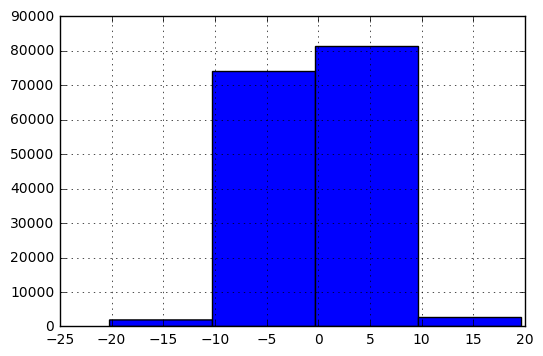

In [84]:
df.x18.hist(bins=4)

In [85]:
df.x19.value_counts()

 7.181320     1
-8.550568     1
-1.280601     1
-2.549667     1
-0.780587     1
 6.200924     1
 4.654572     1
 6.946232     1
 14.324771    1
-3.751270     1
-8.449361     1
 10.402318    1
 4.371673     1
-1.552411     1
 8.890687     1
 17.360914    1
 7.562749     1
 2.259402     1
-8.390160     1
-4.107481     1
-3.734886     1
 4.817077     1
-14.188008    1
-9.816620     1
-3.700668     1
 5.215011     1
-3.146097     1
 2.852982     1
 9.591247     1
 0.996300     1
             ..
-14.009911    1
 3.662070     1
-1.911953     1
-11.114018    1
-5.627635     1
 3.176911     1
 9.164769     1
 8.285331     1
 0.793147     1
 3.620858     1
-3.118248     1
-3.147303     1
-7.123430     1
 6.348488     1
-2.748809     1
-9.699798     1
 2.085008     1
 3.837186     1
-3.894727     1
-3.729899     1
-11.824348    1
 21.743089    1
 7.086911     1
-0.026921     1
 9.337891     1
 4.936596     1
-3.173547     1
-6.139047     1
 2.262801     1
 4.374378     1
Name: x19, dtype: int64

In [86]:
df.x19.describe()

count    159965.000000
mean          0.024555
std           7.595316
min         -35.633396
25%                NaN
50%                NaN
75%                NaN
max          33.515550
Name: x19, dtype: float64

In [87]:
df[df.x19.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
2207,-0.300591,6.391236,4.539370,-11.376414,-7.054732,2.803477,6.599902,18.885567,-14.230436,6.223222,...,21.689218,-0.418525,-1.369576,4.477873,-0.195417,-17.133841,1.372673,1.603473,11.507530,0
9369,0.402856,-1.319789,4.046723,-1.724547,9.178278,4.040687,5.883631,18.163219,4.376344,3.653024,...,10.204801,-1.656096,0.307035,2.084304,-0.521387,-47.563562,-4.518855,0.482624,-9.102446,0
13241,-0.140181,20.880954,-18.787253,-9.358601,-0.808573,4.242329,-27.315254,-19.037870,1.340253,9.145952,...,-8.786856,0.468411,1.156664,-3.485407,-0.010265,36.088788,-4.762307,1.921437,3.290765,0
14906,-0.352357,-8.718459,-2.368954,8.810093,-1.272549,-8.570124,-3.444282,-3.331491,-4.331957,1.799334,...,5.436724,-0.838054,-0.298088,-7.353938,0.068995,-26.069446,-0.774745,2.079563,-15.628470,0
15419,0.341134,-5.796186,9.922143,-9.753586,7.147457,-14.235792,14.426050,-27.506788,7.664683,-4.469136,...,38.770263,6.139584,-3.756205,10.520014,0.571386,-6.296266,-2.237078,-2.096020,-9.772957,0
18886,-0.036222,0.179886,3.976232,-9.464703,-0.732000,-0.071865,5.781142,-5.767495,11.711866,-1.700333,...,10.850776,-4.993756,-0.561913,2.283441,-0.202567,-6.286782,7.440381,-0.573580,6.293655,1
26709,0.100362,-9.444340,-11.886387,8.187628,11.228970,13.816623,-17.281913,-37.658039,-1.009369,2.445806,...,15.529384,-10.326471,0.159139,0.749815,-0.297113,-12.152821,-0.009636,0.738805,6.239389,1
44393,0.346692,-13.658343,11.888679,4.217735,-4.245497,12.170290,17.285247,-35.952887,3.148390,1.842432,...,32.626942,-8.310988,-1.393456,0.942397,-0.968244,-18.330298,-1.258121,0.036543,-5.246608,1
51558,0.198797,-3.391136,-11.872782,4.828130,-3.505153,-2.017362,-17.262132,-20.801742,-9.520459,11.356190,...,-5.039412,-4.833659,0.039876,2.005973,-0.060887,15.884904,4.900827,0.234220,0.623823,1
58743,-0.004324,-0.787510,12.867345,0.176198,0.670279,-1.635100,18.708153,-3.902340,2.629327,-2.265445,...,1.288367,-0.822750,1.122577,-1.298907,0.212774,5.153605,-1.317256,-1.378308,-2.371400,1


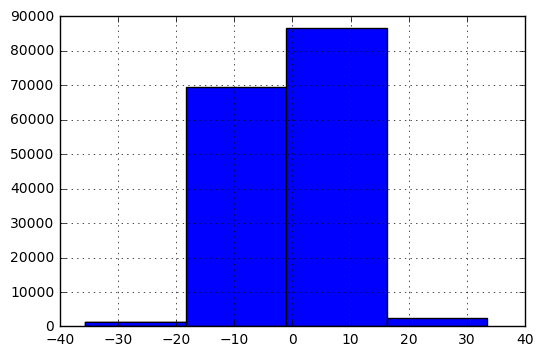

In [88]:
df.x19.hist(bins=4)

In [89]:
df.x20.value_counts()

 8.123821     1
 5.152380     1
-5.818097     1
-1.388941     1
 0.024726     1
 1.166169     1
 5.979090     1
 6.061717     1
 0.093280     1
 5.097429     1
 10.026854    1
-6.087825     1
 7.167059     1
 3.083554     1
 0.978178     1
-0.396267     1
 6.992997     1
 10.789065    1
 3.408654     1
-3.613448     1
 4.122334     1
-5.407525     1
 0.209243     1
 3.368549     1
 2.967593     1
-8.427293     1
-1.994240     1
-5.802685     1
-6.371197     1
 2.262746     1
             ..
 6.532471     1
-3.237453     1
 8.287247     1
-3.258371     1
 10.115747    1
-7.304977     1
-9.016157     1
-4.780483     1
-1.934046     1
-1.077099     1
 2.743435     1
 2.445640     1
-11.462214    1
-0.642382     1
-9.949602     1
 4.859469     1
-4.092650     1
-0.173518     1
-1.029435     1
-13.343077    1
 3.000177     1
 3.439804     1
-5.347443     1
 11.555319    1
-0.940816     1
 5.534724     1
 0.330628     1
-9.011711     1
 1.653674     1
 0.506885     1
Name: x20, dtype: int64

In [90]:
df.x20.describe()

count    159962.000000
mean          0.299074
std           5.806203
min         -26.677396
25%                NaN
50%                NaN
75%                NaN
max          27.814560
Name: x20, dtype: float64

In [91]:
df[df.x20.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
860,-0.227000,10.104766,-20.253851,-17.023129,9.806942,-4.537898,-29.447578,-42.360550,3.426852,2.327808,...,-7.866962,-3.384985,0.477753,2.462876,-0.197043,26.201024,-5.769492,0.194599,-0.383647,0
2108,-0.235701,-5.168558,-14.113708,17.436094,10.411993,2.606610,-20.520271,16.651533,-2.968910,3.833052,...,1.933306,-2.700616,0.826301,2.932680,-0.146046,-27.793524,-2.610019,5.054403,3.037707,0
10573,-0.088267,1.265822,-0.242488,0.739766,1.677850,10.932202,-0.352559,1.385768,0.707090,1.948282,...,26.737680,-4.130356,0.671916,0.341550,0.362461,-112.399519,-4.242584,0.986211,-24.692892,1
12963,0.149532,-7.437566,9.310968,5.768041,7.161887,-5.123702,13.537448,-37.131379,2.078923,-4.790554,...,24.344931,-2.003935,0.980822,2.819478,-0.083963,7.066800,-6.349575,1.820271,1.456611,1
14961,0.219926,2.811541,7.871682,4.152101,-2.511562,-9.456121,11.444834,3.068949,-7.355655,0.406516,...,-6.697240,1.042373,0.472091,3.643376,1.010657,42.542456,3.387718,0.641385,-1.757874,0
27331,-0.002467,17.864204,1.088142,-4.120798,-1.756500,9.985425,1.582077,-36.600279,-4.687943,11.442571,...,25.236468,-8.874223,0.308234,6.990435,0.114547,-95.808273,-2.553700,1.163784,-33.479775,0
32651,-0.471079,3.707704,-13.987827,5.935719,-0.947119,-10.128689,-20.337249,22.560412,-12.740191,-0.297813,...,-18.199467,-7.711242,-1.304528,-4.891164,0.253092,-76.178915,-2.933987,1.869615,-34.633048,0
36708,-0.542056,-7.178563,0.570922,-6.103882,-1.803043,-5.643683,0.830078,0.083149,-5.923193,7.065017,...,1.268351,3.226873,-0.225765,-0.514664,0.813372,27.034072,6.014648,2.906505,9.645901,0
38566,-0.205031,3.271837,-7.178421,-5.668902,-6.202388,6.384095,-10.436885,-27.186762,7.863463,1.308447,...,-6.157307,-1.194584,0.326840,0.067575,0.508438,31.777781,-3.984748,-0.781774,-4.112898,0
38768,-0.016653,-5.328821,18.156543,0.998420,1.700172,-6.605939,26.398249,-11.358668,5.400092,3.243135,...,39.405800,5.217940,-3.309008,-1.431627,-0.387400,-35.579714,0.024698,1.843880,-6.228596,0


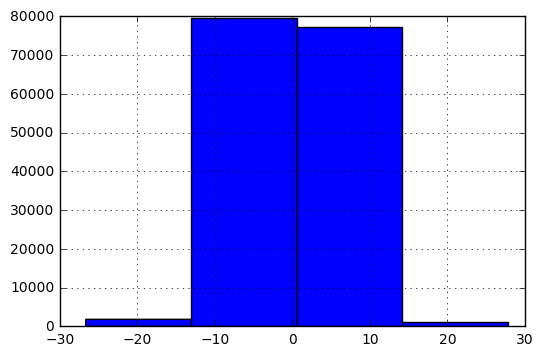

In [92]:
df.x20.hist(bins=4)

In [93]:
df.x21.value_counts()

-4.836363     1
 1.291959     1
 13.811424    1
 6.875938     1
 1.074775     1
-6.096264     1
-11.854572    1
 4.440489     1
-3.971916     1
-4.945513     1
 4.975523     1
 9.227489     1
 4.123831     1
 2.457503     1
 1.578448     1
-21.246788    1
 3.058031     1
-10.931109    1
 15.826615    1
-4.366446     1
 10.833837    1
-9.715854     1
 1.255360     1
-4.426573     1
 4.899241     1
 4.480988     1
-11.547558    1
-16.056449    1
 17.743096    1
 5.605131     1
             ..
 14.788310    1
 21.271383    1
-0.953740     1
-9.239476     1
 14.278030    1
-4.287461     1
-4.630427     1
 20.954625    1
-9.066483     1
 16.860944    1
-5.745406     1
-10.709878    1
-7.128119     1
-3.821461     1
 20.557081    1
-1.024792     1
-12.195222    1
 8.324351     1
 0.830272     1
-4.264267     1
-18.955952    1
-13.511468    1
-1.639554     1
-7.803504     1
 20.428427    1
-2.433434     1
 5.997180     1
-2.824671     1
 1.812100     1
-2.680074     1
Name: x21, dtype: int64

In [94]:
df.x21.describe()

count    159971.000000
mean         -0.029137
std           9.409635
min         -43.501854
25%                NaN
50%                NaN
75%                NaN
max          46.237503
Name: x21, dtype: float64

In [95]:
df[df.x21.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
5149,0.207840,-2.233645,-17.836529,1.099101,3.718058,5.887084,-25.932973,-8.952625,-5.877042,5.446897,...,-5.463774,-0.602675,-0.882373,9.147794,-0.682676,39.349380,-3.372267,2.346260,15.915270,1
11550,0.068414,-7.869766,-7.152086,7.037055,-2.485387,10.442270,-10.398596,46.021416,-3.165449,10.278783,...,-32.711100,9.439068,0.946061,-0.095252,-0.076153,3.817729,3.416685,-1.924109,-6.971255,0
12172,0.052205,1.632052,-5.019688,-1.061161,-13.487035,-8.376963,-7.298249,-13.943047,3.129285,1.264556,...,11.086601,-5.341928,0.544582,-0.516430,0.059616,-12.822721,6.546863,-0.183531,15.272167,0
13036,-0.210289,-3.249236,-21.865486,0.863955,5.696022,2.931023,-31.790774,-36.739796,-1.803466,5.291695,...,-13.662853,1.095964,0.916445,0.186858,-0.022182,77.469644,11.480922,-2.347593,15.021671,0
36250,0.302801,2.101252,17.689757,0.098690,-3.629686,-11.073284,25.719578,19.940129,-11.586028,3.168559,...,16.102168,0.482871,-2.765512,0.994666,0.260827,-13.220650,1.688710,-0.488923,0.563769,0
50784,-0.034591,-4.311500,-7.569898,2.426843,-1.683466,-3.400452,-11.006062,-59.340825,-1.852105,6.430424,...,34.013734,-0.890510,-0.072335,5.271773,-0.206736,-51.817076,-0.818748,-0.989300,-3.722194,1
54085,-0.566381,-2.425279,1.500840,-11.540245,0.437046,6.067849,2.182109,-4.986448,-9.060364,-5.624140,...,-18.409974,-11.866023,-0.152071,-3.581780,0.721074,-44.234476,1.652976,-2.757856,-21.338749,1
58561,0.586780,-3.661998,-19.981620,0.351093,4.418183,-4.090460,-29.051774,7.077320,16.403619,5.375550,...,10.125156,-1.831285,-0.259346,7.692832,0.047395,-27.505842,1.960368,1.034796,31.505032,0
63432,0.076751,4.661601,6.927590,-10.739121,0.044208,-7.236925,10.072195,-35.575258,1.377442,9.552498,...,16.586058,8.651219,-1.600837,2.276759,0.355346,53.950807,-1.450209,-2.910650,-12.022421,0
67694,0.305581,10.307429,44.374925,-12.168545,6.636679,2.461847,64.517806,53.064353,-0.356195,-1.510818,...,27.414993,7.177926,1.903908,-7.676577,-0.532920,10.250718,0.093342,-3.039793,-10.421575,1


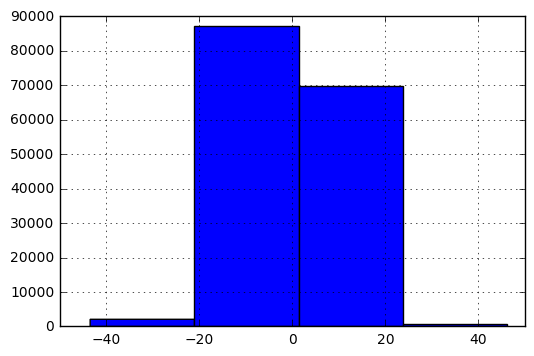

In [96]:
df.x21.hist(bins=4)

In [97]:
df.x22.value_counts()

 0.218766     1
 6.771225     1
 2.775705     1
-2.316511     1
 0.946785     1
 1.146743     1
 7.647585     1
-6.145265     1
-6.178054     1
-1.793744     1
 3.032353     1
 2.557999     1
 1.688026     1
-6.227537     1
-1.855533     1
-3.861711     1
 3.064719     1
 5.842537     1
 6.931111     1
 1.294653     1
 6.254036     1
-2.072434     1
 3.461001     1
-2.018984     1
 7.155175     1
-7.545787     1
 0.479862     1
-1.777274     1
 4.944870     1
-4.588809     1
             ..
 1.828286     1
 0.550447     1
-3.720015     1
-2.024118     1
 0.703032     1
-4.952161     1
 0.369543     1
-7.338195     1
-3.284994     1
 6.949582     1
 2.653809     1
 7.689524     1
-7.107067     1
-2.668624     1
-4.540374     1
-2.232143     1
-4.480251     1
 10.664815    1
 5.921715     1
-0.175670     1
-0.275426     1
 7.325848     1
-2.359954     1
-6.270198     1
 5.009235     1
-5.829231     1
-3.422411     1
 4.169020     1
 11.850972    1
 0.206231     1
Name: x22, dtype: int64

In [98]:
df.x22.describe()

count    159973.000000
mean          0.008400
std           5.412010
min         -23.644193
25%                NaN
50%                NaN
75%                NaN
max          24.863012
Name: x22, dtype: float64

In [99]:
df[df.x22.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
3416,0.351825,0.189658,-4.239816,-7.917787,2.773456,0.180419,-6.164374,-42.843645,-5.990884,8.748320,...,22.602924,-12.028875,-0.764526,-7.335190,0.615097,-22.720191,-4.110628,-1.261977,4.155099,1
5587,-0.407914,3.005819,-2.811576,2.470606,-3.380862,-2.664261,-4.087821,-27.381929,-4.417800,-10.462639,...,25.267052,6.573922,-0.481641,8.076530,-0.278468,19.884875,-3.485500,-3.521511,7.380210,0
5814,0.367397,5.737807,3.139259,-7.957632,-0.253397,6.718692,4.564246,5.339839,-11.853700,-0.527350,...,-1.199216,5.870489,-0.079757,8.263378,-0.054784,44.741895,-2.587274,-0.343492,7.520914,0
12728,-0.669900,-3.963833,-21.140255,-11.182241,0.446374,2.954824,-30.736342,-2.318456,-1.076220,2.888658,...,-9.570809,-5.664343,-2.585515,-2.502480,0.009207,-9.154247,-1.606356,0.043744,16.449073,1
16092,-0.225747,7.764705,-0.346976,22.259178,-4.839694,-3.442718,-0.504477,-39.821880,-1.546906,2.772799,...,11.588737,-9.094837,0.580168,-1.382142,-0.158798,-7.356358,0.528396,-0.051494,-4.877905,1
27524,0.026311,-1.174527,19.974170,4.723080,4.423718,5.118434,29.040943,-18.692234,-4.272070,3.723284,...,20.182033,5.437772,0.768179,0.905422,-0.138472,-0.437844,0.384661,-4.807390,-12.324885,0
27748,-0.077658,0.472360,6.472605,-7.239385,-5.046619,-3.235589,9.410681,22.299462,-4.496505,-1.465249,...,10.806043,-3.815120,1.312891,7.293470,0.893794,-93.594665,-9.579375,2.950947,-21.812523,0
35082,-0.326288,-6.166230,9.000873,-8.962989,-3.503806,0.355875,13.086593,-53.828455,-8.295631,2.114065,...,47.409413,-4.658902,-2.122865,6.713515,0.215464,-20.424497,4.133182,-0.885172,-7.665302,1
37288,-0.265264,-6.765201,-14.468205,7.026159,9.114485,1.172357,-21.035683,7.829473,1.913358,6.169804,...,-6.833331,-6.692319,0.941210,-0.564516,-0.211923,-63.550685,2.471619,0.614277,-0.926720,0
37499,0.141825,-2.449798,7.150207,-1.293650,-2.278391,0.385228,10.395864,13.673910,-0.136969,-7.830669,...,13.216265,1.860352,-0.480644,-3.705978,0.106187,-40.406666,0.616867,-1.003353,2.693327,1


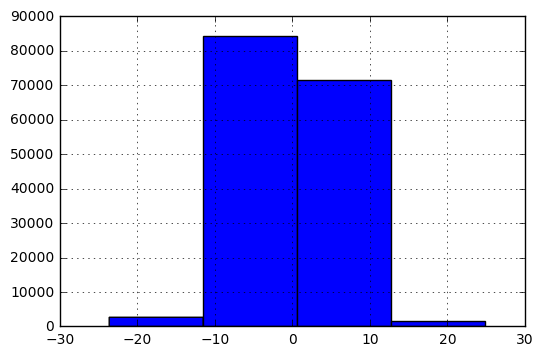

In [100]:
df.x22.hist(bins=4)

In [101]:
df.x23.value_counts()

 3.458105     1
-4.943946     1
-8.317627     1
 16.829369    1
-22.541756    1
-0.361718     1
 15.149798    1
-7.225851     1
 13.720871    1
 5.753218     1
-24.783912    1
-4.787390     1
-44.095596    1
 17.547482    1
-1.322580     1
-8.289997     1
-14.683048    1
-0.546399     1
-16.590324    1
 9.813927     1
-27.825912    1
-4.693695     1
 6.549250     1
 7.551531     1
-3.603459     1
 19.889901    1
 28.892174    1
 9.886864     1
-22.647139    1
 0.969981     1
             ..
-3.531815     1
-1.722139     1
-18.538413    1
-45.939086    1
 12.135335    1
-16.830717    1
 4.819274     1
-29.327062    1
-24.401708    1
-8.174271     1
-25.240423    1
 12.408746    1
 7.177465     1
-17.992062    1
 37.285638    1
-4.260465     1
-6.417260     1
 7.853272     1
-18.248487    1
 22.016345    1
-7.378421     1
 16.529034    1
 9.357480     1
 3.528831     1
 1.035907     1
 18.099482    1
 0.594948     1
 17.917800    1
 15.527433    1
 3.740118     1
Name: x23, dtype: int64

In [102]:
df.x23.describe()

count    159953.000000
mean          0.722028
std          14.909127
min         -66.640341
25%                NaN
50%                NaN
75%                NaN
max          58.490500
Name: x23, dtype: float64

In [103]:
df[df.x23.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
278,-0.260402,7.179945,-13.273020,5.625070,-2.260760,-1.813719,-19.297974,-25.063119,11.897762,1.296509,...,8.643472,-4.274724,-3.376974,-1.444150,0.264290,-29.431558,2.792192,1.135606,-6.696040,1
6819,0.713659,-4.453128,12.900892,-2.876533,-0.911796,-0.958572,18.756927,-24.189474,0.573455,5.504994,...,64.342816,-3.072277,0.005016,5.908580,0.308005,-6.717199,1.216539,0.756829,28.829280,0
7799,-0.180037,1.798036,-19.600123,-3.116772,-3.160313,7.926716,-28.497105,-41.551022,-3.925740,-3.565228,...,-17.032809,-3.688841,-2.532735,-4.958124,-0.155551,11.995584,-3.325558,-0.437579,-12.477456,0
10174,0.122801,-0.574650,0.523214,4.093266,-5.904302,-0.337869,0.760714,5.536982,-1.910273,4.787672,...,40.920113,-4.638600,-1.119053,-3.197125,0.028608,-33.224388,5.456305,3.815857,8.248147,0
10556,-0.006616,1.560433,-31.485541,-10.572280,3.816398,2.157533,-45.777610,8.614609,12.877903,-6.193081,...,-39.966614,-6.362029,0.893890,-1.481053,-0.375628,-73.120094,-6.382571,1.707476,2.310349,0
13356,0.484886,0.775885,-11.456538,-0.939281,-0.402419,0.477951,-16.656945,-51.987662,-9.250097,0.632585,...,8.120838,-5.744194,1.550770,3.056130,0.384162,-52.099019,-1.039886,-0.986419,-11.044548,1
14839,0.126620,-7.274114,-14.806385,16.010271,-7.305829,-4.961976,-21.527372,-41.467193,-14.393841,1.142785,...,25.827938,-3.925069,-1.211563,-3.323677,0.052767,15.989700,-4.158653,3.833054,18.986712,1
16791,0.283091,-2.684226,-0.831470,3.043186,0.368866,4.058166,-1.208894,3.792826,5.874499,16.085439,...,-5.550443,-0.076935,-0.474055,-1.290261,-0.602353,15.687412,4.717966,1.319903,10.492590,0
18267,0.103308,-9.941192,11.753467,-4.641048,-11.694189,6.729121,17.088658,10.084856,-4.561879,6.619850,...,4.220898,0.789294,-1.032231,2.273218,0.256382,21.865074,-4.150898,0.507842,-3.955899,1
21007,-0.381623,2.611933,23.899171,14.308295,-4.513979,1.365185,34.747598,3.990010,1.199913,-5.137331,...,8.830528,9.261365,-1.577839,2.079929,0.541861,34.555652,0.820992,2.686138,-15.015805,1


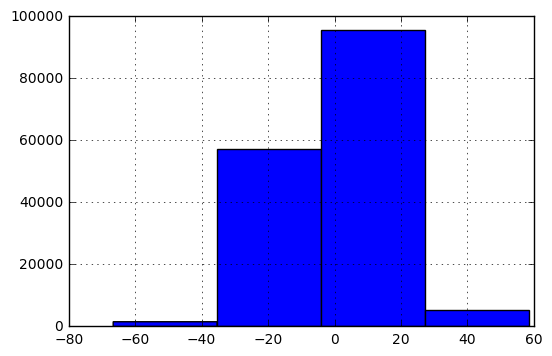

In [104]:
df.x23.hist(bins=4)

In [105]:
df.x24.value_counts()

asia       138965
euorpe      16538
america      4469
Name: x24, dtype: int64

In [106]:
df.x24.describe()

count     159972
unique         3
top         asia
freq      138965
Name: x24, dtype: object

In [107]:
df[df.x24.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
5210,-0.364025,-4.506393,7.645077,1.769922,0.231400,1.829309,11.115368,-55.655247,11.131349,2.011766,...,2.964313,-3.411036,-0.376856,1.842917,-0.131755,95.250240,-5.674680,-2.154947,16.557514,0
17289,0.095261,2.269817,-24.253134,-2.845433,4.954117,-10.505069,-35.262235,-9.976514,2.044493,-7.940039,...,-18.778371,-9.964297,-0.273381,-6.160344,-0.018488,-55.893460,-0.712872,1.711422,-9.651947,0
17844,-0.207053,2.724775,-18.175997,4.497731,-3.377169,-2.518833,-26.426534,-3.396776,-9.075536,1.601223,...,-3.094945,-5.387760,-0.202690,-1.195425,-0.183835,-12.006483,0.148091,0.535122,20.698914,0
18156,-0.146275,-5.968589,-9.476670,2.989144,-10.822999,5.995066,-13.778367,47.008513,3.106208,-5.905345,...,-12.506547,4.338810,1.277262,-9.380888,-0.049281,-3.951209,4.465995,-0.172261,-2.926297,1
22032,-0.429348,0.765252,-14.832546,-15.928468,17.620486,1.291650,-21.565408,-31.923220,7.257478,0.244056,...,4.408830,-5.901845,-0.919859,1.242355,-0.544893,-10.028234,-4.628685,0.883964,0.120811,0
25611,0.363907,-5.866806,9.807587,-10.114038,1.600764,15.689561,14.259494,14.035633,2.923251,0.936867,...,25.601481,-2.525292,-0.476684,-4.767721,0.314672,-11.865159,9.102946,3.168309,-17.074937,1
25820,-0.000706,1.932273,-3.883460,-3.087413,1.731789,7.089336,-5.646260,-7.953033,-5.464963,-12.015470,...,1.098883,-1.933138,-1.794798,2.614520,-0.133935,-29.840013,6.165879,0.373030,0.955955,0
27941,0.219924,-4.306307,-7.584208,12.796199,2.034315,0.194260,-11.026868,-13.176084,-4.033980,-10.816127,...,-1.961594,0.476586,4.117523,5.296026,-1.031128,56.317835,10.440011,1.831199,9.017663,1
31112,0.474457,4.397193,-21.771151,-9.642420,-1.720646,-0.331295,-31.653617,-73.341891,5.222198,12.713231,...,10.403302,-13.541115,-2.555547,4.271317,-0.090800,-17.042971,-1.308712,0.752217,-7.953823,1
33247,0.072650,-3.016108,-6.082486,17.605107,4.996767,9.097960,-8.843478,-14.650558,6.017444,-1.901501,...,-4.194881,0.865721,0.694207,8.011157,-0.207016,31.006420,9.086374,0.371348,12.280221,0


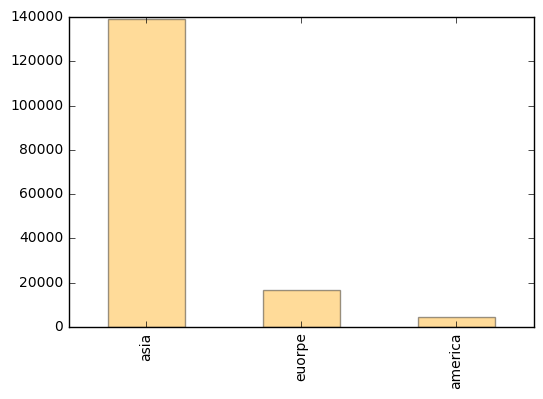

In [108]:
df.x24.value_counts().plot(kind='bar', color= 'orange', alpha= .4)

In [109]:
df.x25.value_counts()

 0.426519    1
 1.640665    1
-0.732565    1
 0.669497    1
-0.975492    1
-0.930898    1
 0.032443    1
 0.673408    1
 0.079067    1
 1.463964    1
-3.261976    1
 1.383753    1
 0.591628    1
-2.628184    1
-0.290676    1
-1.007066    1
-1.357455    1
 1.397479    1
-0.959303    1
 1.313504    1
-0.718591    1
-1.013468    1
-0.975414    1
-0.407660    1
 0.753779    1
-1.283847    1
-0.199992    1
-0.868805    1
 0.328368    1
 1.038024    1
            ..
-1.560479    1
-0.861747    1
-1.175602    1
 1.421723    1
 4.723026    1
 2.167832    1
 1.343223    1
 0.254822    1
 1.558434    1
-0.583929    1
-1.390383    1
 0.217140    1
 3.554522    1
-0.951928    1
 1.104592    1
-1.753736    1
-0.316916    1
 0.301028    1
-1.571806    1
-1.867831    1
-2.258588    1
 0.420800    1
-1.769082    1
 1.607336    1
-0.654205    1
 0.208006    1
 2.285329    1
-0.894799    1
 0.845209    1
 0.009309    1
Name: x25, dtype: int64

In [110]:
df.x25.describe()

count    159978.000000
mean         -0.000806
std           1.263656
min          -6.364653
25%                NaN
50%                NaN
75%                NaN
max           5.314169
Name: x25, dtype: float64

In [111]:
df[df.x25.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
4420,0.078260,10.844466,30.822352,-2.978554,3.523017,-9.480033,44.813384,16.371233,-10.459884,12.278293,...,-2.510879,5.281758,3.380067,4.687700,0.616356,34.054068,3.036822,-1.911830,-2.072182,1
11485,-0.411365,-6.068105,-22.290233,0.334049,13.816081,7.449918,-32.408324,-82.584504,-13.184758,1.682270,...,-5.918729,-8.239916,0.397311,0.656805,0.740444,40.012040,-4.743224,-2.649856,-0.462594,0
12718,-0.325074,6.965202,-8.203334,-1.579328,-10.011871,2.770421,-11.927031,-40.258811,-10.888866,-8.733842,...,26.032594,-4.992390,-1.173223,-2.918385,-0.627633,-51.456458,-9.153666,-0.529700,-7.284377,1
16021,-0.398451,-14.504008,-4.172541,14.060397,-11.164028,-6.589604,-6.066562,-39.425031,6.943531,-13.056634,...,19.718716,-7.038134,1.950698,5.440285,-0.117395,-5.448443,9.568829,-2.024028,6.582713,1
33294,0.077520,6.861371,-15.309422,-15.826428,-0.932162,-3.428880,-22.258749,8.179330,-1.538904,-2.059247,...,0.969574,3.392445,-0.617550,-5.510527,0.171710,-48.147423,0.994659,-2.286468,4.242656,1
33311,-0.012301,-6.691878,5.652108,-6.275363,2.748860,-7.061981,8.217740,-19.219468,-2.871932,-6.692644,...,4.547371,-1.252344,0.676390,5.842905,-0.396563,-24.433837,-3.141653,0.819762,-14.000939,0
34286,0.069115,-3.641186,-15.838394,-5.315465,1.551956,-10.259504,-23.027835,-40.019873,6.470065,-5.196522,...,15.151359,-8.360775,-0.219725,-1.094533,0.242813,12.231735,-5.613027,2.485714,16.486130,1
36782,0.321780,-3.588019,3.218021,3.730079,3.637052,2.209359,4.678760,-34.331010,8.594554,1.690626,...,39.999791,0.256481,0.349247,0.202321,-0.605961,-41.794407,-2.517390,-2.220591,-12.853081,0
36833,0.287087,-4.479156,0.578403,-11.650279,-3.841874,2.410375,0.840954,-5.151106,0.160163,-6.987845,...,5.353210,3.282550,-1.092242,1.117621,-0.553546,11.969431,1.798249,3.109181,-0.752154,1
41497,-0.350056,-3.249717,4.263171,-0.538869,3.489043,8.724205,6.198331,-19.262256,-6.339940,12.318914,...,13.722103,5.997520,0.392675,-3.770542,-0.224035,18.399025,0.678617,1.651648,7.179664,0


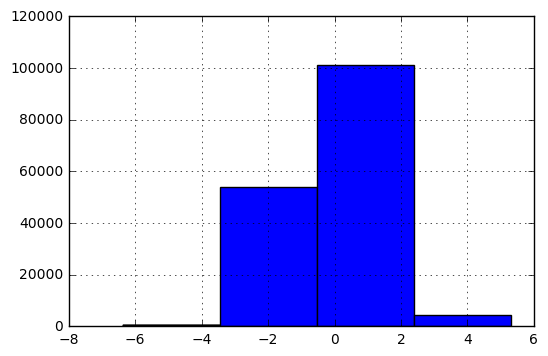

In [112]:
df.x25.hist(bins=4)

In [113]:
df.x26.value_counts()

 0.199194    1
 1.372099    1
-1.164481    1
-0.237986    1
 0.239962    1
 1.260570    1
 0.735409    1
 0.132811    1
 0.249481    1
 0.176805    1
-1.501038    1
 1.220721    1
 1.269369    1
 0.513934    1
 0.507128    1
 0.482436    1
 0.057275    1
-0.519898    1
-0.513485    1
-1.668153    1
-1.125004    1
-0.285957    1
 0.998144    1
-0.331336    1
 0.363598    1
-0.435667    1
 1.148364    1
 0.816293    1
 0.593761    1
 0.514336    1
            ..
-1.081987    1
-0.113661    1
-0.810305    1
 1.584629    1
 0.007166    1
-0.503093    1
-1.131059    1
 0.419809    1
-0.227763    1
-0.379044    1
 0.190280    1
 0.658725    1
 0.537568    1
 1.379519    1
 0.343198    1
-0.107916    1
-1.136083    1
 0.778419    1
 0.672037    1
-0.209182    1
-0.913827    1
-0.777639    1
-0.952989    1
-0.301222    1
-0.394774    1
-1.282400    1
 1.691021    1
 0.706817    1
-0.028309    1
 0.272761    1
Name: x26, dtype: int64

In [114]:
df.x26.describe()

count    159964.000000
mean         -0.001066
std           0.843258
min          -3.857484
25%                NaN
50%                NaN
75%                NaN
max           3.951652
Name: x26, dtype: float64

In [115]:
df[df.x26.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
1504,-0.284044,-11.557359,11.519271,2.951744,12.098270,-0.597286,16.748155,12.039366,-4.164877,1.693692,...,-15.517811,3.549137,0.241616,1.769135,0.794000,29.071183,6.380135,0.849078,9.265929,0
12350,-0.330232,0.650197,4.524804,-10.809616,0.729249,-3.917489,6.578725,18.995676,-6.396649,-9.886716,...,-3.859465,-4.674131,2.552600,-5.607707,-0.554095,-83.019941,-6.200132,-0.427130,-37.969566,0
12670,0.197670,-4.532980,-2.247124,-0.951240,3.635942,-6.337861,-3.267149,-36.276582,-2.146979,-4.658774,...,8.543967,1.437329,0.985364,-3.611859,-0.233083,46.197925,-3.386507,0.686774,10.491464,0
31058,-0.351876,-5.336898,35.063661,5.458070,3.833553,11.009859,50.979928,45.683865,-8.469324,-1.972017,...,8.972937,-3.392322,2.261116,-5.613338,-0.303323,-62.560593,1.476573,-2.753677,-15.032006,0
33444,-0.122740,-4.320104,-11.740228,-1.859659,-3.100386,10.949464,-17.069410,6.493375,15.558928,-5.166511,...,-13.405800,-5.977930,-0.304209,-10.614717,-0.352163,-37.729911,2.889847,1.102762,-1.424476,0
39734,-0.557217,1.072593,6.739262,-1.029808,8.013806,-8.308912,9.798380,-56.072119,-9.390682,16.302489,...,28.803422,-11.465734,-1.520775,1.285672,-0.571886,-17.629989,-0.862354,0.398204,-10.829761,1
43578,0.141636,-2.890698,4.384896,7.484058,8.128283,3.617879,6.375309,-50.838933,-7.804204,10.847882,...,29.086640,-1.428475,-0.684530,-0.815163,-0.433262,32.826907,2.981033,1.985189,8.468457,1
45326,0.400754,3.505155,10.749496,-7.032958,-2.336329,-6.641523,15.628959,20.186147,-0.318394,9.055993,...,-6.729249,10.407920,2.731906,3.248107,-0.539720,63.386423,-1.446461,-0.343707,9.791514,0
48065,-0.121201,-2.895215,-10.091783,-15.880885,2.223072,-7.314937,-14.672694,18.575951,-6.660726,-2.629716,...,-20.766898,3.694838,-1.009610,1.626512,-0.333805,-5.921730,4.978455,-0.493430,-8.222917,0
53661,-0.442966,-7.361168,9.592726,-8.441573,2.553468,-7.180188,13.947102,-5.278486,13.372683,10.113772,...,23.683010,-5.171317,0.435593,-1.029909,-0.270722,-24.796415,-2.033894,-0.671494,-0.379243,1


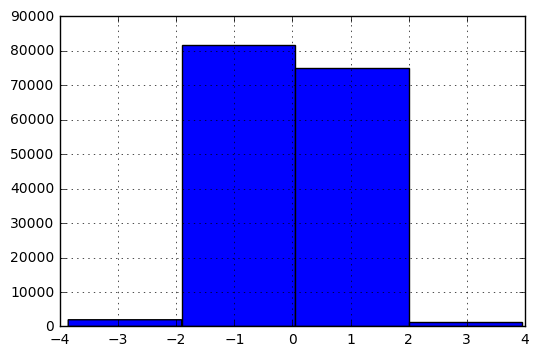

In [116]:
df.x26.hist(bins=4)

In [117]:
df.x27.value_counts()

 2.519829     1
 4.241071     1
 14.871406    1
-5.778525     1
-0.047625     1
-1.903133     1
-1.954619     1
 2.488083     1
 1.496535     1
-5.107811     1
-4.832129     1
 3.085793     1
-19.060327    1
-0.689716     1
-7.370264     1
-4.678128     1
 0.941133     1
 13.689144    1
-11.106720    1
-0.508398     1
 8.188535     1
-7.136706     1
-1.386865     1
 4.325273     1
 9.456611     1
 6.629906     1
-1.698858     1
 1.430792     1
-13.107676    1
 2.787888     1
             ..
 4.238877     1
 0.956549     1
-3.488016     1
-6.509071     1
 1.210127     1
 1.000818     1
 7.082661     1
-1.903420     1
 5.083436     1
-10.916903    1
 1.469696     1
-4.386426     1
 4.303704     1
-3.824827     1
-2.032459     1
 16.115138    1
-2.640011     1
 2.545836     1
-8.496333     1
-6.986165     1
 0.019264     1
-1.232993     1
-17.065694    1
 6.686341     1
-7.527269     1
-5.121315     1
 2.727704     1
 7.324254     1
-10.445719    1
-3.481858     1
Name: x27, dtype: int64

In [118]:
df.x27.describe()

count    159970.000000
mean         -0.004159
std           6.774047
min         -32.003555
25%                NaN
50%                NaN
75%                NaN
max          28.645074
Name: x27, dtype: float64

In [119]:
df[df.x27.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
1631,0.307621,-0.735857,-0.091047,-9.265805,1.372478,1.344153,-0.132376,35.493271,-26.780740,2.154028,...,0.747682,2.547145,-1.045270,1.681968,-0.045039,-19.384636,0.419232,-0.683058,-3.599037,1
6161,0.192638,-1.566035,-14.370972,-7.649528,1.923738,-2.882595,-20.894313,5.461557,-2.165721,-0.773824,...,2.171276,-10.108010,0.383961,9.993536,0.644667,-19.188184,-3.378605,-0.569924,41.481596,1
6783,0.019292,2.199520,15.376168,5.769642,-1.966254,-4.535951,22.355793,30.668742,12.040354,-3.830008,...,11.314466,-3.232731,-1.642285,-9.253322,-0.181262,-28.424944,-0.400108,-3.946664,8.578639,0
19499,-0.075720,-7.530229,-9.760945,4.197136,0.821042,5.423714,-14.191680,-22.983962,3.498793,-6.346697,...,21.652580,-2.738661,1.083683,4.376795,0.385225,-31.367477,-6.484873,-0.565113,10.315551,1
22633,-0.118021,11.548212,-5.217429,-5.150942,3.996974,3.060155,-7.585750,-3.548181,-1.683934,0.575903,...,-1.740397,-2.305232,-0.559078,8.049934,0.082230,-26.075943,-4.723889,0.742033,-0.988011,0
23604,-0.392184,8.068074,-24.853123,-4.641168,-5.455201,-9.984179,-36.134573,-53.954439,13.506471,3.932549,...,29.913034,-0.287001,1.343581,5.185205,0.653393,-20.646969,-1.589250,2.637524,5.774029,1
25902,0.190429,-0.505741,9.534316,-2.911377,-2.323658,2.523450,13.862179,7.587564,-10.954130,5.522929,...,0.831051,6.063245,-0.530462,3.954023,0.547156,5.698347,1.347151,-1.120696,-10.818879,0
27532,-0.028068,-3.268478,-11.194228,-0.063564,-0.495053,6.798228,-16.275566,0.963976,-13.040184,-7.214416,...,-23.201367,0.871448,0.183314,-0.039606,0.011314,14.340679,1.962949,1.055212,12.339464,0
36684,0.008773,-12.308077,28.136444,1.209225,-2.668299,-5.227217,40.908276,-22.703924,-14.673486,16.286172,...,54.176207,9.232113,-2.112562,-1.145035,0.424866,34.045064,-3.443759,-3.052002,2.533469,1
43059,-0.103051,2.472837,4.942178,21.802912,5.229714,-10.296258,7.185555,-49.902477,6.700367,-0.061551,...,49.571078,-1.057976,-1.046065,1.392349,-0.140856,-55.685733,-2.189325,-3.668515,-8.987740,0


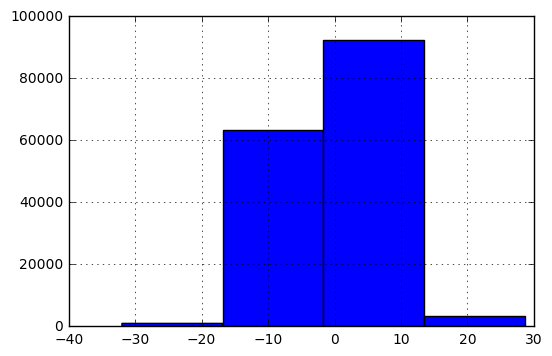

In [120]:
df.x27.hist(bins=4)

In [121]:
df.x28.value_counts()

-20.200874    1
 2.644036     1
-5.454864     1
 18.775454    1
-7.394649     1
-16.961690    1
 7.827609     1
 2.975488     1
 13.403553    1
 29.632166    1
-1.746341     1
-2.413494     1
 0.314731     1
 2.412733     1
 9.659860     1
 2.149620     1
 4.206231     1
 3.602460     1
-8.114516     1
-6.535888     1
-7.104641     1
-10.166924    1
 7.178681     1
-9.632055     1
 26.238750    1
 9.717752     1
-5.523440     1
-6.248815     1
-7.405831     1
-23.163480    1
             ..
 7.947481     1
 20.945915    1
-15.758015    1
 5.238081     1
 17.774032    1
-21.709893    1
-2.422578     1
 16.994987    1
-12.008187    1
 17.480804    1
 2.783244     1
 18.099731    1
 14.086126    1
 5.172687     1
-12.318781    1
-12.019978    1
-2.823414     1
-20.537644    1
 27.516825    1
-0.855667     1
-4.690893     1
 27.881302    1
 5.996422     1
-35.728028    1
 12.166832    1
-13.856094    1
 0.879934     1
 10.898167    1
 1.685559     1
-15.821178    1
Name: x28, dtype: int64

In [122]:
df.x28.describe()

count    159965.000000
mean          0.031543
std          14.439534
min         -72.896705
25%                NaN
50%                NaN
75%                NaN
max          67.753845
Name: x28, dtype: float64

In [123]:
df[df.x28.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
11772,0.104104,-0.415827,-1.686920,9.112434,6.098507,-2.289912,-2.452655,-33.890603,-6.449555,8.605922,...,20.918013,-8.852731,-0.445013,4.279852,-0.245486,-25.562556,-1.558118,-2.801057,10.546205,1
13572,-0.064640,-1.686065,-4.210483,8.354263,1.789592,-10.198082,-6.121726,-23.811046,8.687342,7.595485,...,8.327816,-4.862628,3.451727,0.472964,-0.102675,-15.491886,3.558336,0.400555,-3.923428,0
13915,0.011364,-4.337851,-11.547045,13.512454,4.472061,-0.521018,-16.788535,-40.601356,-12.162334,6.595822,...,22.475427,-3.104847,0.516541,-5.202559,-0.661194,-13.589745,-6.860650,-0.038586,15.871091,1
15490,-0.179348,3.001931,3.896241,3.907044,-0.817225,6.025896,5.664842,-0.740738,-6.746852,0.536957,...,-10.740700,-3.169022,1.684428,-0.658043,0.285945,-52.744185,2.681865,1.477401,-6.851438,0
18684,-0.744339,3.059393,-26.945701,-15.535160,-3.871534,19.519550,-39.177025,-99.384912,-1.002562,-6.721395,...,4.634495,-15.668794,-0.259891,3.038654,0.019123,-28.454752,2.314697,-0.281014,-19.560390,0
24801,0.005915,5.419159,-16.806421,1.493267,6.075453,-13.226567,-24.435273,13.395962,4.735476,-0.631299,...,-53.854928,5.846506,-0.617038,1.390500,-0.235545,42.134987,5.177996,-3.132101,-10.339743,0
27147,-0.223095,1.563281,-5.561777,10.809261,1.341760,-15.820719,-8.086406,-28.811252,-2.039916,2.570206,...,18.040751,-12.648100,1.343966,-0.188758,-0.462486,-68.816897,3.574412,-0.359343,-8.466883,1
30392,-0.637130,-8.831761,5.185222,1.104216,10.558602,-6.914399,7.538923,11.120823,-4.248169,2.683182,...,-1.717644,-8.353250,-0.417146,4.139970,-0.586776,-81.256398,-7.387279,-0.817929,-22.595961,0
32839,0.546698,11.332175,-11.821295,-2.361206,5.379127,3.307084,-17.187275,19.217670,-11.641282,-3.540575,...,3.410074,3.948950,1.477017,0.267018,-0.572023,-0.219094,-1.168274,2.791910,23.947898,1
37399,-0.416358,1.567820,24.752294,9.661805,1.826684,-3.048593,35.987975,27.791322,-10.915413,-4.028318,...,32.469996,2.121437,0.669528,-1.389608,0.566386,2.008334,-1.779097,-2.468713,16.353758,0


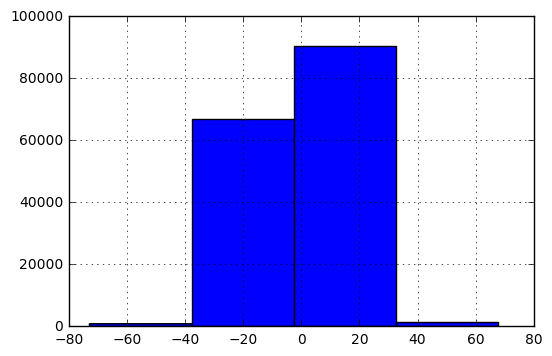

In [124]:
df.x28.hist(bins=4)

In [125]:
df.x29.value_counts()

July       45569
Jun        41329
Aug        29406
May        21939
sept.      10819
Apr         6761
Oct         2407
Mar         1231
Nov          337
Feb          140
Dev           23
January        9
Name: x29, dtype: int64

In [126]:
df.x29.describe()

count     159970
unique        12
top         July
freq       45569
Name: x29, dtype: object

In [127]:
df[df.x29.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
126,0.327565,-0.544186,-6.928746,-5.659393,-3.423373,-1.850306,-10.073876,-8.432450,24.492095,-5.653426,...,16.366108,-9.924910,-0.144486,-1.511031,-0.057357,-69.130267,1.264002,0.317753,6.095717,0
1614,0.754582,3.547577,3.016391,-4.063511,-1.563541,-15.661289,4.385607,-12.233037,-2.419313,1.056685,...,-23.273014,-5.703977,-2.930037,-4.218491,0.498004,-49.001582,-6.910098,-3.504388,-44.130320,0
9240,0.579893,12.543018,-5.603496,15.832023,1.864623,2.156928,-8.147063,-8.852715,4.015302,4.678308,...,15.945336,1.791539,3.172283,-10.217638,0.377287,14.125822,-8.246789,1.320902,16.644843,0
20372,-0.195980,-5.278287,-20.016811,6.403927,1.489941,2.635308,-29.102939,-18.046966,-10.120454,5.964603,...,-15.345871,-6.251233,2.064526,-11.764908,1.028098,-19.887005,-3.751193,0.257226,-8.863838,0
20593,-0.432698,-9.654119,2.720042,-2.764139,-6.009950,-12.373923,3.954736,-36.335471,13.942369,-8.018002,...,14.238756,-5.668006,-2.406047,-4.636585,0.092541,-0.847529,3.039395,-2.345329,8.532281,0
29277,-0.428899,6.310499,6.340049,8.930355,0.627894,-0.821358,9.217955,-27.398250,-0.995498,8.372324,...,-5.312917,-3.674797,-1.981527,-4.672900,0.664107,-20.989706,-0.492248,0.606860,-22.333572,0
35972,-0.086555,-4.908538,1.795795,5.956340,8.803897,8.838533,2.610951,-8.189033,-2.319977,5.839300,...,4.678318,1.028224,-2.598314,7.276078,-0.262679,-32.757693,-1.471473,0.200874,-5.742735,0
40002,0.210420,-13.519009,3.846340,-14.798395,-5.916286,7.564040,5.592289,1.294469,2.182063,0.732065,...,33.455212,13.383623,-0.551740,-0.433112,0.395444,57.227899,-2.935692,-0.528141,22.120744,1
43631,-0.215826,-13.889697,-0.025508,-1.328942,0.732773,-6.126059,-0.037087,-36.410395,-0.087889,12.155512,...,11.612752,-6.042821,1.784766,1.882943,-0.297041,-29.678841,-1.148550,0.633554,-14.554421,0
49444,-0.564936,-2.354327,-11.152009,9.745600,7.046710,4.754754,-16.214183,27.783791,-3.054301,7.117610,...,-14.122613,-9.911814,-2.061020,-3.487854,0.482927,-62.107871,-1.602304,1.700965,-17.098522,0


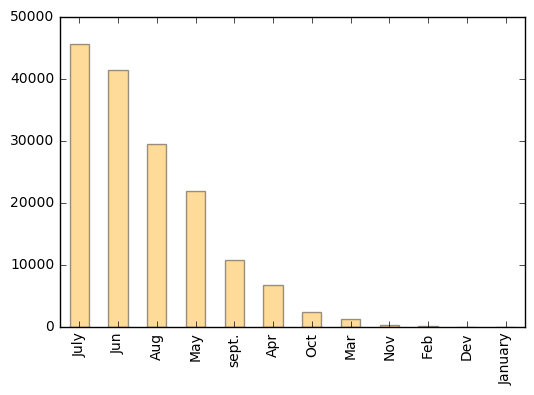

In [128]:
df.x29.value_counts().plot(kind='bar', color= 'orange', alpha= .4)

In [129]:
df.x30.value_counts()

wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
Name: x30, dtype: int64

In [130]:
df.x30.describe()

count        159970
unique            5
top       wednesday
freq         101535
Name: x30, dtype: object

In [131]:
df[df.x30.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
3445,-0.340760,-2.731714,-4.051004,2.441978,-11.046551,-1.758981,-5.889856,-19.957167,0.084582,-5.734032,...,0.362206,-4.981763,-0.298649,5.815358,0.430925,-27.691062,-6.136700,-0.085282,-10.257574,0
8374,0.429505,-7.459912,-17.906603,4.674094,-4.583461,-0.382899,-26.034855,-3.191549,1.294169,-14.180300,...,-4.792097,0.406879,-1.158553,0.965564,-0.306544,-27.828583,-6.664223,3.629359,-4.049267,0
15130,0.328694,7.674332,6.788526,-1.347611,-12.896044,-7.931477,9.870007,14.200367,8.672637,11.690779,...,1.985432,2.370124,3.093399,-5.302886,0.161060,28.124952,3.553745,0.678818,7.798503,1
18824,-0.318803,-5.290016,5.254072,-1.634832,2.451151,5.456817,7.639027,-8.073148,4.939620,7.656725,...,29.863578,-4.016545,3.271347,-0.987262,-0.380483,-20.471174,-4.916719,-0.200977,20.692771,0
23650,-0.080049,0.216630,-14.163302,1.314182,-0.414960,13.373517,-20.592376,28.640776,0.894628,2.724194,...,-26.496524,-4.899101,0.120804,-2.914865,-0.304318,-18.943871,-4.425927,1.542899,-0.453366,0
30794,0.312780,1.644305,2.548769,-8.338747,-7.784870,3.116947,3.705719,24.201147,-18.004749,4.338335,...,14.595292,-2.902059,-0.570388,2.002596,0.186251,-13.005149,1.010776,1.590328,8.680431,1
37275,-0.471017,-13.908044,-7.143852,-7.031924,0.024939,15.461686,-10.386625,-3.287744,-3.686057,0.552845,...,-2.248308,-13.968171,-0.696156,-5.264337,0.290204,-99.067122,1.608923,0.469499,-23.229588,1
52210,-0.307253,0.231741,-21.207915,-18.956485,0.985513,-0.659719,-30.834715,-41.629758,8.528533,-2.610674,...,0.600419,-4.818875,0.787310,-7.338069,0.642998,-8.790888,1.630686,1.908853,-8.174198,0
52677,0.770574,-4.159365,22.076184,-9.176307,3.397437,0.625374,32.097112,-0.784263,-1.500290,6.114746,...,13.840351,-3.474037,1.534012,-0.798804,-0.035570,1.670398,-0.874940,-2.809362,-2.637145,1
53827,0.506629,1.879618,2.524816,3.352951,0.317186,-0.611093,3.670893,26.910807,-5.117635,-11.440805,...,-4.318395,-1.601523,-0.712948,-2.399919,-0.141020,-7.136729,4.711662,-3.395363,12.582325,1


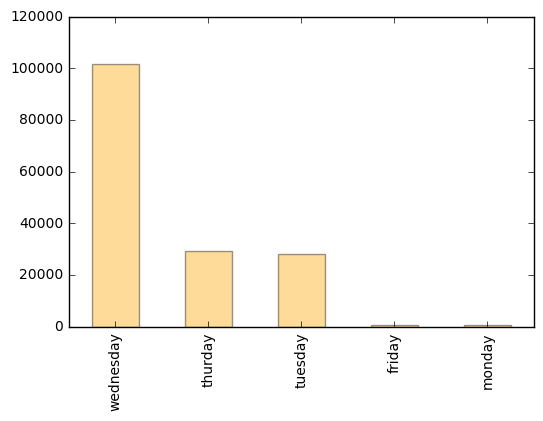

In [132]:
df.x30.value_counts().plot(kind='bar', color= 'orange', alpha= .4)

In [133]:
df.x31.value_counts()

-0.141389    1
 1.835883    1
 2.175440    1
 2.629331    1
 1.298659    1
-2.494552    1
-0.106326    1
-2.127999    1
 8.548933    1
-4.519642    1
 1.385438    1
 3.327224    1
 0.548893    1
 2.750347    1
 2.147417    1
 3.482234    1
 1.060541    1
 2.164888    1
 2.280122    1
-3.009266    1
 2.931582    1
-3.627090    1
 2.435934    1
-0.355696    1
 4.051703    1
 0.362419    1
 4.771853    1
 0.066626    1
-1.508524    1
 3.999729    1
            ..
-1.312951    1
-4.426940    1
 0.615949    1
-0.523813    1
 2.144519    1
-4.000022    1
 4.424590    1
-0.746348    1
-2.373779    1
 1.490893    1
-1.593795    1
 1.398837    1
 0.362423    1
-0.280037    1
 4.457410    1
 0.760116    1
-1.163310    1
 0.842638    1
-3.645751    1
-2.537566    1
-1.360893    1
 2.823520    1
-2.662058    1
-5.136483    1
 0.922030    1
-0.388250    1
 3.330985    1
-1.805491    1
 1.605089    1
 2.911805    1
Name: x31, dtype: int64

In [134]:
df.x31.describe()

count    159961.000000
mean         -0.005945
std           2.767508
min         -12.289364
25%                NaN
50%                NaN
75%                NaN
max          12.279356
Name: x31, dtype: float64

In [135]:
df[df.x31.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
6839,0.035298,-6.925251,-4.015267,-13.773415,-5.039227,-5.139302,-5.837896,-48.096849,-11.399101,-5.089976,...,24.316468,-5.971075,1.769191,-0.408017,0.086638,1.734583,-0.029405,-2.579719,-0.601339,1
11077,-1.019954,-3.365892,-25.638323,-6.810468,-3.815029,12.125331,-37.276195,-38.525570,14.183978,1.014711,...,1.734811,-11.064259,1.805197,0.835340,-1.120932,-18.250878,1.529129,2.601752,16.716760,1
11937,-0.061147,-4.370126,6.836669,7.203801,7.605773,-2.282344,9.940002,6.152184,2.888373,2.384194,...,19.690362,-0.326591,2.181839,-0.452346,0.027751,-10.112142,3.536491,-0.205983,-3.020618,0
14138,-0.556761,5.928220,22.686623,1.341400,-10.439018,-0.689259,32.984646,-0.725860,-5.763388,3.501196,...,23.935412,-0.072901,2.624995,-11.366650,-0.138909,-16.508843,-6.547086,-0.715657,-0.340775,0
18308,0.284491,-0.557450,-10.444528,-4.330142,1.988233,13.312712,-15.185558,-43.478448,-6.796135,0.611370,...,29.839353,2.169097,-0.737581,1.208781,-0.181916,-33.678805,-6.534535,1.078874,7.145158,1
30465,0.244629,-7.749863,-4.526168,4.399488,-4.923653,-0.288418,-6.580708,-2.653583,6.766513,1.684700,...,3.797535,-4.844629,0.834693,-3.288929,0.099705,-52.228954,3.484696,2.217773,-21.179337,0
34002,-0.454414,-1.619628,-7.267396,-5.140872,2.927722,3.111421,-10.566248,66.058485,-12.410848,12.684296,...,-8.015351,-6.222982,3.149578,-2.984504,0.558292,-50.998656,2.367377,-1.230336,-4.648120,1
35909,0.841101,-2.407541,4.770922,8.359460,2.920161,4.453688,6.936562,-27.464450,4.880971,-7.250329,...,40.426518,2.223446,0.030141,0.846391,-0.240517,0.469511,1.672695,-3.178757,15.258206,1
38964,0.334719,3.714213,10.237806,-35.476594,-3.300162,19.592605,14.885000,5.744720,12.605306,-6.431650,...,13.043151,-2.408912,2.961977,7.254711,-0.446744,-49.983892,3.196547,-0.262274,-20.922122,0
42340,0.297479,-3.365473,1.482818,-4.146967,-2.370332,-3.398523,2.155906,-7.754441,-4.252435,-3.422861,...,17.346709,4.906274,-1.773596,3.285232,0.539703,-11.401142,4.672397,-3.578974,13.648872,1


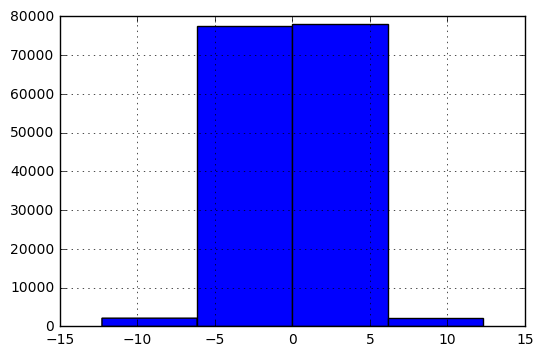

In [136]:
df.x31.hist(bins=4)

In [137]:
df.x32.value_counts()

0.01%     40767
-0.01%    34094
0.0%      33923
-0.0%     30492
-0.02%     9924
0.02%      7987
-0.03%     1727
0.03%       855
-0.04%      138
0.04%        55
-0.05%        6
0.05%         1
Name: x32, dtype: int64

In [138]:
df.x32.describe()

count     159969
unique        12
top        0.01%
freq       40767
Name: x32, dtype: object

In [139]:
df[df.x32.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
544,0.138993,-0.455277,17.905972,-6.408080,-1.142244,-9.456645,26.033938,3.271380,15.894332,-5.262634,...,54.127465,2.819041,-2.878491,6.333181,0.777254,-19.424496,-0.231778,0.652801,14.593412,0
13156,-0.289841,14.035978,5.953889,-6.299925,-5.304012,-10.755277,8.656508,10.555077,-12.369955,9.323593,...,-8.308421,1.014102,2.579510,-3.401534,0.432873,-6.468595,-1.574955,-0.552722,-5.921944,0
15663,-0.261910,-6.503349,14.177762,-0.294024,-5.829547,-8.764612,20.613400,-23.552492,-3.180057,2.078991,...,40.975104,0.205660,2.036063,0.544679,0.435660,2.727967,0.408834,0.470137,16.368972,0
19101,-0.493001,-0.863960,-17.291692,11.294935,-3.239710,-7.144223,-25.140821,-26.618727,13.598461,-15.937041,...,-12.251178,-7.262251,0.852583,-1.033104,0.686907,10.743121,-1.576195,0.174188,-4.223995,1
28860,-0.282451,10.282356,-9.656892,5.655251,10.740140,-6.324257,-14.040396,12.586450,5.172699,2.905695,...,4.311493,-6.871120,-2.482833,-8.340654,-0.146619,-3.823092,6.011923,1.268454,10.738790,1
31436,-0.286895,-2.538543,-5.463509,-2.073270,10.703803,-2.652438,-7.943531,6.452106,2.730732,0.778762,...,26.674812,-4.083091,1.484579,3.201547,-0.192861,-21.586218,4.808031,1.476072,34.012216,0
40829,0.449631,-5.485737,-4.269828,4.551538,6.926741,3.807535,-6.208009,1.276661,9.219158,-8.358117,...,1.233539,-5.832018,-1.928229,3.376651,0.490082,26.982736,-8.656949,-1.855221,19.852575,1
52420,0.332395,8.406071,16.760065,16.090350,7.073246,-3.168463,24.367875,-4.132143,-4.968405,7.381490,...,19.920140,-4.549693,-0.830308,1.163196,-0.303909,-20.826673,-1.575468,-1.965492,-3.579371,1
59970,0.304487,-2.233780,0.385628,1.401656,-1.773404,-10.942799,0.560674,-25.813360,9.637711,10.562959,...,20.222345,-3.223997,0.933020,2.360419,0.895886,28.899548,11.613856,1.554171,5.399830,1
61578,-0.087687,-1.835853,0.057303,-7.474436,0.912028,6.268312,0.083314,-18.923016,-1.733198,4.617752,...,11.678474,5.621054,0.270081,7.160319,0.044322,15.783079,3.910560,1.833215,15.164931,0


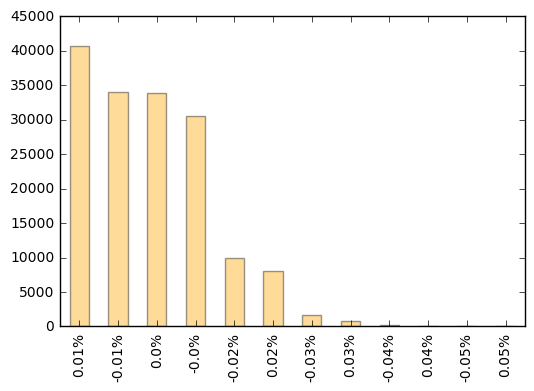

In [140]:
df.x32.value_counts().plot(kind='bar', color= 'orange', alpha= .4)

In [141]:
df.x33.value_counts()

-2.256428    1
 0.168997    1
-1.006769    1
 1.578600    1
 1.794847    1
-2.016923    1
-1.418589    1
 2.616100    1
-3.454199    1
-0.908488    1
-1.378113    1
 1.714908    1
 2.998573    1
 1.121145    1
 2.468742    1
 2.122882    1
 4.278333    1
 2.111165    1
-4.275165    1
-0.506841    1
 2.194403    1
 0.537839    1
 1.445639    1
-0.734762    1
-3.763931    1
 0.284340    1
 5.346330    1
-1.167805    1
-0.422843    1
 1.089301    1
            ..
 0.447125    1
-1.774094    1
-0.527166    1
-1.784852    1
-2.039044    1
-2.655259    1
-3.769731    1
 1.874720    1
-2.566874    1
-1.479658    1
 0.919955    1
-1.294038    1
 0.336243    1
-0.469190    1
 0.048992    1
-2.242144    1
-0.814170    1
 2.254226    1
-2.638863    1
 1.510084    1
-0.536419    1
 2.301591    1
-0.005858    1
 1.162783    1
 1.403188    1
 3.022838    1
-1.191816    1
 1.975271    1
 0.820372    1
 0.679817    1
Name: x33, dtype: int64

In [142]:
df.x33.describe()

count    159959.000000
mean         -0.006567
std           1.747762
min          -7.451454
25%                NaN
50%                NaN
75%                NaN
max           7.787120
Name: x33, dtype: float64

In [143]:
df[df.x33.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
2802,-0.166873,2.893197,1.833674,-7.376296,11.803147,8.824076,2.666024,-56.355000,0.232146,2.025408,...,16.692340,-1.282130,0.265562,5.348959,-0.257158,24.075746,0.568645,-0.973395,-20.158594,0
3615,0.310026,-7.463931,8.977229,8.200507,-13.249265,2.999672,13.052216,15.056133,19.091149,-1.148842,...,11.076585,0.045599,-0.183170,-5.737235,0.357561,-17.046523,-7.825185,1.829413,-7.269991,0
13182,-0.274878,-4.286884,1.954158,-4.312319,8.507877,5.379174,2.841199,-4.351078,11.317581,3.430850,...,28.110622,3.983408,1.297597,2.637231,-0.354629,29.623254,8.143470,3.349652,14.063831,0
17075,-0.075153,0.897414,-14.427805,-2.766604,7.587507,-4.587123,-20.976944,-18.006848,3.836534,2.759036,...,5.388836,-0.295068,-1.165120,-2.621598,-0.185791,-14.922924,-2.499090,2.923912,-4.298070,0
25731,0.439306,2.241224,-8.639038,-2.991784,-0.814161,-7.271082,-12.560512,6.647381,0.450681,-6.210622,...,-35.454225,0.139504,-0.062933,0.163542,0.440193,41.428253,2.703081,-1.798518,-5.398376,0
31456,-0.065646,2.389268,-9.352922,-4.765554,-7.574406,4.515514,-13.598445,-8.115045,-9.510420,-2.773097,...,-2.235320,-2.383158,-0.405160,-1.546842,-0.649336,-31.312501,3.862743,-0.415205,-3.745032,1
32522,0.650856,2.943571,16.680541,12.886446,12.587241,19.354670,24.252253,20.082034,-8.426784,0.122221,...,5.187460,-1.611388,1.586484,-2.023141,-0.577061,-46.862563,3.409272,0.843386,-16.632247,0
34510,-0.444097,2.536554,23.262016,-7.676242,3.613718,-10.075734,33.821223,-21.347212,17.704229,6.947641,...,43.367578,-1.634596,-0.381492,2.691100,0.923687,26.368205,-11.319996,-1.777228,-5.443963,1
34939,-0.472386,1.523655,1.040224,5.085340,-7.865836,-0.447200,1.512408,28.473873,-2.670911,-0.915419,...,-12.788288,2.417359,-0.293256,-3.580772,-0.285379,11.804603,3.731742,-0.679502,1.133519,0
38908,-0.100454,5.321982,-14.422600,-4.581631,-7.653092,14.287353,-20.969377,0.954503,17.605997,0.229141,...,5.370619,-4.737377,-0.297502,3.441309,-0.015627,-91.920443,7.349812,4.201075,-23.921973,0


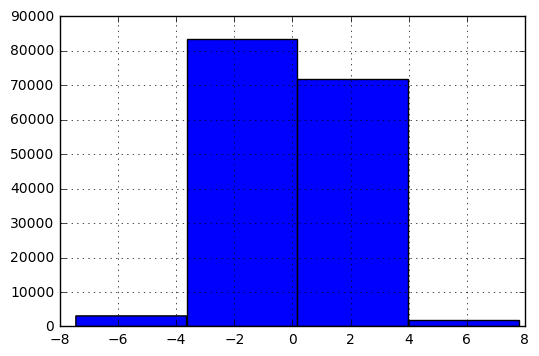

In [144]:
df.x33.hist(bins=4)

In [145]:
df.x34.value_counts()

-2.769062     1
-14.304074    1
 2.397050     1
-3.488389     1
-6.506644     1
 1.264350     1
 0.435223     1
 2.674250     1
 7.346482     1
 7.281819     1
-3.113225     1
-1.267789     1
-6.012210     1
 10.694417    1
 6.335974     1
 2.818249     1
-4.392749     1
 0.944733     1
 0.288293     1
 8.162038     1
-11.774472    1
 5.802112     1
 2.667030     1
-9.653013     1
 9.468584     1
 0.709543     1
 2.804233     1
-11.283549    1
-6.589753     1
 4.490703     1
             ..
 2.232983     1
 0.180983     1
 1.910656     1
-3.321824     1
-0.521795     1
 2.255819     1
 11.091229    1
-9.928790     1
 15.125409    1
-1.074071     1
 11.518730    1
 8.380611     1
 11.240132    1
 6.497557     1
 7.383832     1
 5.843577     1
 3.514726     1
-0.216722     1
 0.341166     1
-15.593524    1
-5.272617     1
-6.368169     1
 5.667893     1
 6.278918     1
-2.402288     1
 14.212049    1
-10.131282    1
-0.987583     1
 9.075179     1
 5.210140     1
Name: x34, dtype: int64

In [146]:
df.x34.describe()

count    159959.000000
mean         -0.000426
std           8.014180
min         -36.116606
25%                NaN
50%                NaN
75%                NaN
max          34.841428
Name: x34, dtype: float64

In [147]:
df[df.x34.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
6129,-0.205286,6.092240,4.074757,-7.655576,3.490459,-2.307555,5.924391,50.942451,12.176911,5.585843,...,-11.918893,-0.026158,-1.305965,3.348630,0.323607,-39.510251,8.355872,0.266553,5.636837,1
12691,-0.286012,4.880204,15.320490,5.586452,-1.415142,8.856266,22.274841,-1.175169,-11.747995,-8.688560,...,22.205188,-1.125551,-1.161374,-0.887566,-0.459075,-59.700628,-0.551396,1.855793,-27.523168,0
13903,-0.462711,-4.901592,-7.050099,-4.955442,5.483665,-14.723169,-10.250314,18.416718,4.837244,-5.990640,...,-7.043568,3.729245,-2.203683,8.508062,-1.276217,14.673720,1.334718,-0.825248,9.764708,0
37565,-0.455618,-1.624746,-10.270304,5.557268,1.772854,4.416720,-14.932250,43.171774,9.932233,-4.911979,...,-21.481016,-2.516150,-1.992290,-0.064534,0.258335,-44.435045,4.316523,-0.655296,7.921131,1
40176,0.121525,7.250341,-7.693849,-2.286869,6.904955,-1.364307,-11.186278,5.527914,-13.181043,6.370001,...,-13.171829,-3.856307,2.364993,3.250598,-0.912856,-39.429169,-2.219900,-0.428544,-19.738210,0
41645,-0.610937,11.102975,1.268340,-8.276798,3.111322,16.672547,1.844071,-22.990201,-3.776063,2.970344,...,32.016909,-3.518846,-1.302742,1.256944,-0.429116,-28.305114,-1.579697,0.623622,14.906249,0
45358,-0.017502,-2.973004,-8.317051,0.415099,1.935536,-5.460478,-12.092367,-46.031523,-10.683176,-3.623192,...,-4.838253,-6.029368,-0.909064,4.555248,0.357040,14.347137,0.346996,-2.770415,-7.813354,0
45813,-0.459355,0.400892,-14.616047,7.521040,5.160906,8.706361,-21.250634,16.932491,-3.637214,-5.027848,...,-24.230816,-6.272875,-0.347781,-12.133630,-0.248287,12.496552,-7.566428,-0.203260,10.856233,1
52066,-0.368883,-0.142655,-2.246656,6.200856,-2.088714,-0.349357,-3.266470,58.767640,-9.859851,4.833295,...,-34.687798,7.496289,-1.553070,3.442757,0.225018,9.233808,8.727600,-1.706047,-0.311995,0
57062,0.107730,-3.779152,-13.597912,-0.722345,-4.704825,-3.237700,-19.770342,-30.844787,-13.440920,-8.160586,...,30.534205,-6.519146,-1.490229,6.395775,0.178839,-7.996060,-0.467541,2.130888,14.039447,1


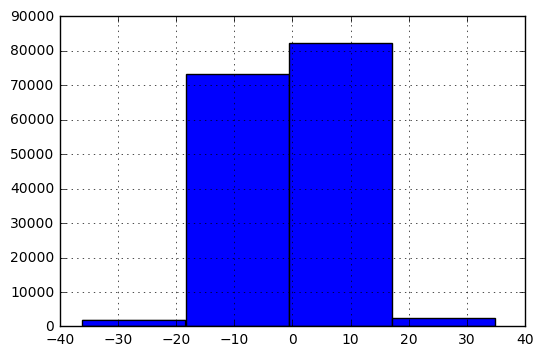

In [148]:
df.x34.hist(bins=4)

In [149]:
df.x35.value_counts()

-3.229221    1
-1.394693    1
-1.393176    1
-0.934951    1
-0.438916    1
-1.699133    1
 0.964951    1
 0.230531    1
 0.186756    1
 0.899333    1
 0.395169    1
 4.266675    1
 1.113078    1
 2.236358    1
 2.128993    1
-0.287468    1
-0.791639    1
 1.766318    1
 0.954123    1
-2.272029    1
 2.840025    1
-4.416254    1
-2.004399    1
-0.547849    1
-2.859770    1
-4.581627    1
 0.839633    1
-0.399504    1
 1.772655    1
-0.976852    1
            ..
 0.588519    1
-0.977694    1
-3.018106    1
 2.004948    1
 1.758253    1
-0.675392    1
 4.765336    1
 3.085250    1
 3.309085    1
-1.319827    1
-4.584209    1
 0.363038    1
-2.055371    1
-1.365785    1
 4.045526    1
 0.052326    1
 1.032244    1
-1.187311    1
 0.142906    1
-6.144547    1
 2.015750    1
-3.719316    1
 3.474903    1
 0.273748    1
 1.559228    1
-0.328886    1
-0.178458    1
-0.626231    1
 0.664520    1
 1.963765    1
Name: x35, dtype: int64

In [150]:
df.x35.describe()

count    159970.000000
mean          0.000936
std           2.379558
min         -10.008149
25%                NaN
50%                NaN
75%                NaN
max           9.892426
Name: x35, dtype: float64

In [151]:
df[df.x35.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
335,-0.307814,-1.933938,19.511962,-1.066393,-2.096425,-9.468056,28.368927,18.612901,-6.752776,4.331839,...,12.200807,1.569677,-0.008269,-4.771052,-0.030990,-2.967525,-6.534043,-1.252804,2.126562,0
10938,0.363665,-10.132486,-6.815801,-3.170900,9.485812,4.901531,-9.909663,-27.078100,-3.186365,4.992197,...,6.284244,-6.314355,1.205527,2.837578,-0.042280,-40.974486,-4.889210,-0.996119,-4.666729,1
11563,0.801667,-1.002421,-9.942509,2.688229,-1.438462,8.182068,-14.455661,-13.371653,-16.674752,8.570954,...,8.770860,-2.768709,-1.196560,-7.134315,0.055578,-68.546050,0.782627,3.197142,-21.999058,0
12922,-0.033695,5.832839,-18.195753,0.010078,9.655749,6.645271,-26.455258,-37.918549,-1.152214,-0.251292,...,6.305942,-6.557479,-1.216265,-1.002253,0.099051,-2.507828,-6.201467,0.778727,15.818328,1
13551,0.283802,-1.819582,-3.446445,6.538075,-13.059574,9.312709,-5.010871,-69.413503,-2.674680,4.794362,...,24.839870,-1.143921,-1.796273,-0.516392,-0.174693,8.059318,6.903617,0.026063,1.832605,0
24689,-0.085245,1.189048,6.040593,-0.284029,-2.734225,2.619521,8.782568,21.590734,-2.703888,-8.905309,...,-18.864883,10.020559,2.026948,2.751291,0.272586,40.349894,-1.292099,-1.416035,9.566933,0
25259,-0.286890,10.491182,3.280510,4.790678,3.339853,-7.302431,4.769615,37.597669,-4.720724,2.245156,...,-15.312151,-0.384981,0.232420,3.390389,-0.124612,-6.562905,-4.037928,-1.196993,-4.565286,0
30404,0.020895,11.641683,-20.874304,-7.748924,-2.966886,3.549343,-30.349670,-48.393614,-7.669732,2.085392,...,9.987922,-1.036687,0.014406,0.652153,0.040473,70.642888,0.211882,4.118382,25.269940,1
37005,-0.075717,4.799210,-24.482444,7.424093,-0.220425,-3.755947,-35.595634,-3.539137,-5.162778,-6.428423,...,7.506161,-4.908135,-0.020473,-5.216452,-0.305368,-12.498211,0.085348,1.745083,38.595346,0
38819,-0.411011,-3.643624,22.521252,10.576570,5.863220,6.372248,32.744209,22.069886,2.208421,-3.118365,...,1.233201,-1.556408,1.491674,-2.137462,-0.275996,9.141119,1.879140,-1.512748,-4.710980,0


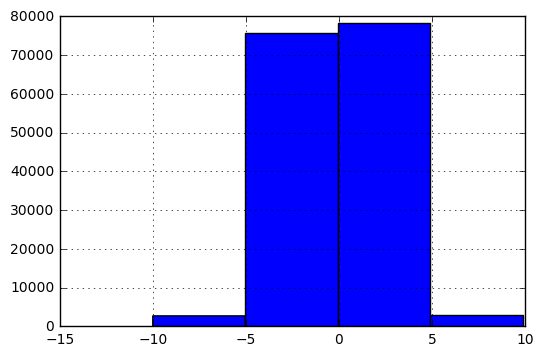

In [152]:
df.x35.hist(bins=4)

In [153]:
df.x36.value_counts()

 2.081043    1
 1.534134    1
 1.262918    1
-1.424386    1
-0.467890    1
 3.067376    1
-2.501887    1
-1.762812    1
 2.552195    1
 1.204754    1
-0.553217    1
 0.414948    1
 0.630184    1
 0.179665    1
-2.507778    1
 2.288319    1
 1.019838    1
-1.875348    1
-0.937092    1
 1.164846    1
 0.220503    1
 0.272049    1
-1.739104    1
-1.956423    1
-4.643730    1
 1.617383    1
-0.864949    1
-0.916903    1
 1.017141    1
 0.746547    1
            ..
-1.758890    1
 0.658422    1
-1.980372    1
-4.660717    1
 0.717890    1
-2.461675    1
 1.755071    1
 0.769921    1
-1.412464    1
 0.284634    1
-1.208583    1
-0.443110    1
 0.728042    1
-1.268637    1
-0.297521    1
-0.404054    1
-3.009149    1
 0.109865    1
 1.469188    1
 1.371983    1
-0.591172    1
-1.589007    1
 0.982025    1
 2.063931    1
 0.599813    1
 2.080899    1
 2.341632    1
 0.720277    1
-2.211699    1
-2.380068    1
Name: x36, dtype: int64

In [154]:
df.x36.describe()

count    159973.000000
mean          0.006453
std           1.593183
min          -6.866024
25%                NaN
50%                NaN
75%                NaN
max           6.999544
Name: x36, dtype: float64

In [155]:
df[df.x36.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
4443,-0.331971,-12.548830,-19.668564,15.088090,-3.742056,3.963973,-28.596614,-91.086242,2.860616,-1.097316,...,44.876436,-9.403994,1.799546,0.624762,0.974539,-45.179327,7.526925,1.824804,-7.367215,1
4936,0.861394,9.016903,3.109791,0.653158,7.489784,-2.164278,4.521402,-16.724576,11.221801,-8.191103,...,12.804498,2.995202,1.633560,7.160945,-0.506701,28.061721,-2.563646,0.566112,-15.871448,0
16986,0.237632,-9.545378,-1.271238,-4.938442,1.733066,-15.968149,-1.848284,-27.693635,-8.091509,-0.707021,...,-3.833291,1.355900,2.189459,5.290677,0.447000,49.075042,1.393089,0.612305,8.815449,0
18056,0.225708,5.550342,9.913904,3.751861,-1.852121,12.521725,14.414071,-20.544133,0.729397,2.590938,...,13.557454,-2.688741,-0.842454,9.366339,0.068146,-2.142416,11.203057,1.093410,-13.482634,1
21657,0.226868,1.570318,-10.663627,-7.201753,4.073065,-11.288080,-15.504113,-22.587277,-1.648371,4.677598,...,24.969655,-0.873076,-0.825808,4.599338,-0.014150,-50.677798,-2.328322,0.075258,-3.605806,1
23336,0.111745,-6.769030,4.515244,8.850411,-6.737653,3.441564,6.564826,2.480823,12.500034,2.359945,...,11.779267,0.843504,-0.237068,-2.670529,-0.422282,-14.085404,-2.132754,3.501031,-12.530431,1
30753,0.418929,-7.291405,-7.905248,1.281878,-12.046795,-13.336702,-11.493637,-78.771420,11.645333,-3.716599,...,39.423326,4.549226,-0.989115,-7.364009,-0.219512,19.922217,0.096871,1.833528,8.441503,0
42392,-0.070959,3.399669,-3.669215,-10.664340,0.497833,-2.418109,-5.334763,-17.100436,4.665237,-0.916193,...,22.912300,-6.244573,-1.425240,2.427952,0.106029,-8.987666,-2.768333,-0.718022,6.617216,1
43442,-0.467617,-1.453439,1.825230,-9.811424,-1.102691,-9.724356,2.653747,12.756925,19.031599,-12.847516,...,22.322764,-2.864148,-1.468174,0.726392,-0.773276,-32.507828,-4.554814,1.155210,-6.527620,0
53373,0.176796,-4.350896,17.006444,-12.071249,8.286875,3.688453,24.726092,-47.933135,18.705140,1.011586,...,34.035712,-3.521162,-0.354132,6.130255,0.312946,-17.412368,-2.035083,-0.770788,-13.765545,0


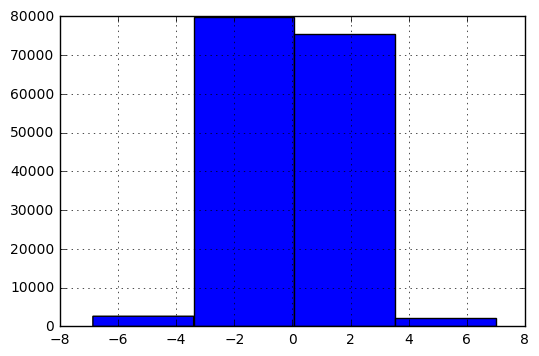

In [156]:
df.x36.hist(bins=4)

In [157]:
df.x37.value_counts()

$237.4       6
$-311.26     6
$-336.77     6
$618.22      6
$-415.46     6
$341.26      6
$72.42       6
$-391.18     5
$265.55      5
$387.18      5
$-1117.17    5
$15.62       5
$134.29      5
$518.81      5
$229.66      5
$-61.78      5
$245.78      5
$-304.02     5
$995.07      5
$757.41      5
$-586.03     5
$259.01      5
$-231.0      5
$-1370.36    5
$-990.22     5
$-771.89     5
$-440.21     5
$-371.18     5
$482.41      5
$-369.13     5
            ..
$-843.69     1
$1223.82     1
$-699.82     1
$545.78      1
$-1671.98    1
$-789.08     1
$-617.63     1
$917.88      1
$-1038.61    1
$917.87      1
$-1797.25    1
$-1797.21    1
$-24.33      1
$-24.32      1
$-24.35      1
$1334.49     1
$547.36      1
$-1352.02    1
$547.35      1
$547.33      1
$1249.52     1
$846.11      1
$846.13      1
$2155.92     1
$942.3       1
$139.79      1
$-1671.97    1
$942.7       1
$139.73      1
$-1306.18    1
Name: x37, dtype: int64

In [158]:
df.x37.describe()

count     159977
unique    129198
top       $237.4
freq           6
Name: x37, dtype: object

In [159]:
df[df.x37.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
185,0.467498,-0.687684,3.130110,-22.793216,8.519058,-4.889666,4.550944,41.917901,-4.837381,7.213244,...,-12.013702,-4.635228,-2.936636,3.049495,-0.061796,-54.338146,-2.802416,2.224768,-28.947051,1
3981,0.089335,4.549554,7.337850,14.557297,2.455320,8.531141,10.668683,-4.467032,14.779578,4.944751,...,1.823555,2.507097,-0.386100,0.106270,0.654264,4.202945,0.559789,0.760003,-5.650789,0
14339,0.204195,-14.591041,2.221161,5.750377,-4.000775,0.915511,3.229401,43.296470,-0.749765,1.627992,...,-24.657591,1.159974,1.990394,4.327489,0.337136,-2.235030,3.349476,-1.649263,3.006873,1
38686,0.707060,4.643109,6.165906,-2.798968,1.846271,1.705312,8.964765,-15.390228,-13.751553,-0.421520,...,4.333527,-4.357004,-1.599842,2.077177,-0.627062,-19.882269,-1.325202,1.364331,-10.765748,0
48684,0.452561,1.569407,-2.510709,10.396828,-4.253873,-4.144875,-3.650382,-11.309896,-1.511693,2.359536,...,15.097794,-8.247630,-1.179280,3.883736,0.064777,-98.000718,-5.641264,1.656704,-29.040789,0
49644,-0.467181,0.823476,-15.312402,-23.724004,11.068355,0.485772,-22.263082,-58.894775,3.831322,-10.377317,...,13.458014,-10.141232,-2.402666,-3.743172,0.242608,-10.057844,-10.240729,0.612997,10.661735,1
54591,-0.216434,12.227752,-1.702412,0.509604,0.798851,-6.967946,-2.475180,21.522332,1.912482,-9.300037,...,9.246408,-7.752115,-4.019827,2.381175,0.064871,-113.832359,1.425604,2.025138,-18.129716,0
56410,-0.801784,-10.409135,-9.847330,9.659876,-2.337064,-10.091094,-14.317278,26.137196,4.157558,-2.716873,...,-14.132864,2.948785,0.375292,5.159829,-0.456388,-56.995825,4.158889,0.305353,1.827272,1
57687,0.387007,5.841081,9.029129,6.013188,-9.510906,-1.184458,13.127675,-5.694735,1.330592,0.880579,...,8.583946,2.128294,2.192174,3.185252,-0.277696,-17.625103,1.106975,-2.530589,-15.021258,0
64015,0.054467,-14.476737,-1.767010,6.082649,5.057090,-0.591164,-2.569100,1.015974,-11.518332,-8.389417,...,13.172496,1.738826,-1.704019,2.500616,-0.062836,27.337025,-2.805100,1.923544,15.851565,1


In [160]:
#df.x37.value_counts().plot(kind='bar', color= 'orange', alpha= .4)

In [161]:
df.x38.value_counts()

 15.531643    1
-32.765891    1
 28.192471    1
-11.415361    1
 27.634190    1
-0.668455     1
-7.430366     1
 53.785433    1
-44.731147    1
 23.635153    1
-4.715174     1
 11.423262    1
 9.454306     1
 11.603757    1
 30.162068    1
 11.979792    1
-25.051135    1
 27.004902    1
-18.531164    1
-13.617855    1
 26.802238    1
 6.413928     1
 0.370188     1
 15.527846    1
 18.447339    1
 5.423387     1
 14.550589    1
 36.890238    1
 15.596057    1
 10.191049    1
             ..
 19.073162    1
-13.057240    1
 24.038335    1
 13.813777    1
-15.012405    1
-5.575957     1
-17.670836    1
 21.872936    1
-0.779273     1
-1.664226     1
-4.601964     1
-14.279775    1
 25.142201    1
-1.813162     1
-12.287504    1
 25.590379    1
-8.015357     1
 2.110013     1
 28.426533    1
-7.059213     1
 7.400884     1
 1.217271     1
-19.003871    1
-17.116143    1
-9.918091     1
 6.887609     1
 1.971708     1
 5.213836     1
 13.990816    1
 20.119774    1
Name: x38, dtype: int64

In [162]:
df.x38.describe()

count    159969.000000
mean          6.059130
std          16.891603
min         -74.297559
25%                NaN
50%                NaN
75%                NaN
max          90.467981
Name: x38, dtype: float64

In [163]:
df[df.x38.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
3961,0.570138,2.744215,-9.452440,-12.089345,-1.032095,12.335854,-13.743138,-50.565304,-8.130172,-8.597905,...,-0.330033,-4.561854,0.244752,4.015820,0.029139,20.533183,-4.902455,-0.922136,-13.891801,0
6588,-0.496135,6.463367,-24.094604,-0.242334,-0.132184,4.300603,-35.031743,-58.010959,4.707901,-3.280084,...,19.435323,-10.194735,0.881504,7.105170,0.184729,-44.509993,3.744873,2.715211,-3.249743,1
6652,-0.411458,9.415878,-4.696060,3.804122,7.154141,7.078633,-6.827718,-51.048403,-12.453999,-9.652394,...,21.136072,2.110396,1.152024,-0.623774,0.110826,68.835723,-6.494871,2.344391,27.346207,1
22592,-0.422511,-0.210819,4.253946,-2.058587,-5.057662,-8.902816,6.184918,-41.002440,-0.959740,-10.158514,...,23.612824,4.092146,-1.147000,-7.980804,0.390811,21.652220,-0.263495,-3.392046,16.060173,1
28274,0.025341,6.385455,-5.663267,3.602406,4.564000,0.274331,-8.233965,70.190339,-0.582335,-5.527567,...,-1.387042,10.331401,-0.094766,-7.329338,0.716152,36.305552,-10.717866,2.327243,20.296959,1
39895,-0.745285,11.575014,-1.970208,4.548041,-1.053236,-3.747811,-2.864534,-31.053601,-10.324978,0.048551,...,44.893758,-3.585421,2.369842,2.550765,-0.020902,-15.904304,1.044226,0.717571,18.070252,1
42369,0.577824,-0.685048,-1.576455,-6.553237,0.715699,8.813570,-2.292048,-8.770908,-2.045458,-7.865957,...,22.647230,-4.651894,-0.919782,-1.968324,0.656114,-8.716968,-2.510716,1.493780,6.786128,1
42891,0.301521,-4.097212,3.895481,5.256061,4.418313,2.821587,5.663736,15.447583,-5.290322,1.389062,...,5.689539,-7.007965,-0.290142,5.745646,0.083115,-65.637998,-0.605063,1.429244,-20.489442,0
44843,0.123647,4.792415,-11.456262,11.275226,-5.826274,-13.458097,-16.656544,43.515697,0.525026,7.030181,...,-4.979311,4.047407,-2.157032,-5.526739,0.287083,-9.005009,4.823172,1.332342,2.544111,1
48794,-0.477992,-1.886193,14.766278,11.204333,-3.090010,6.128915,21.469059,9.616730,-3.801148,-2.033094,...,12.969661,2.010492,0.452023,-2.487635,-0.076918,-31.123843,-3.648318,-2.128282,6.816158,0


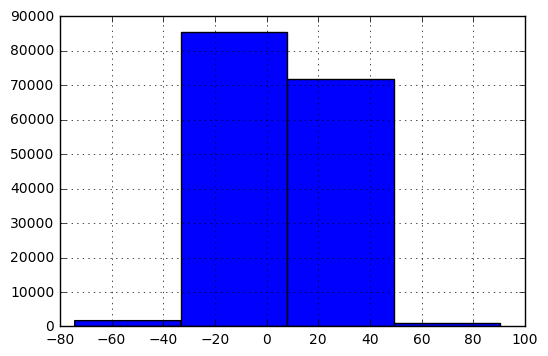

In [164]:
df.x38.hist(bins=4)

In [165]:
df.x39.value_counts()

 0.817142     1
 5.511126     1
 10.362026    1
 6.148213     1
-2.355610     1
-0.274147     1
 7.587159     1
-3.661738     1
-0.234346     1
 1.415192     1
-3.408642     1
 0.567265     1
 3.851611     1
 1.794346     1
-6.777288     1
 0.290369     1
 4.067118     1
 2.704328     1
 0.415097     1
-1.127781     1
 1.692847     1
-2.216393     1
-8.593538     1
 5.884903     1
-3.255439     1
 6.031749     1
-3.053924     1
 13.543654    1
-3.459669     1
 7.622414     1
             ..
-0.900895     1
 0.088292     1
-12.091536    1
-6.854539     1
 1.822309     1
 7.548471     1
 4.778996     1
-4.749809     1
-16.035948    1
 7.151614     1
-0.889324     1
-0.987725     1
 8.459863     1
-0.742369     1
 8.027040     1
 3.085737     1
-5.195228     1
 3.322078     1
-12.040164    1
-2.204094     1
 2.267789     1
-6.206382     1
-11.658458    1
-4.492967     1
-2.292474     1
 6.125756     1
 3.628503     1
 4.359587     1
 6.209111     1
 5.948265     1
Name: x39, dtype: int64

In [166]:
df.x39.describe()

count    159977.000000
mean          0.004253
std           5.134322
min         -22.101647
25%                NaN
50%                NaN
75%                NaN
max          21.545591
Name: x39, dtype: float64

In [167]:
df[df.x39.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
151,1.062456,0.178589,-1.579185,-6.073041,-4.328384,-12.455219,-2.296016,-60.919564,-10.490058,1.430530,...,19.662729,-8.943095,0.503985,2.924478,-0.375100,-31.947110,6.230095,-2.717568,-11.463633,1
5914,0.263091,-0.661578,16.880524,-5.743193,4.887729,-4.968751,24.543013,-0.406492,-3.586071,-2.313890,...,39.427071,-2.664274,-0.033980,-2.331306,-0.137472,-28.369738,-3.701972,1.033829,10.036260,0
12708,-0.005367,-4.253958,-12.101144,4.096452,-8.986303,-7.608230,-17.594154,-18.778284,-1.500365,-8.386913,...,1.321575,-1.582988,-0.399101,-0.272500,-0.561829,-20.151629,1.058381,-2.408332,2.868849,0
22718,-0.430104,-6.858573,-9.605819,9.272545,-13.096471,-7.113921,-13.966139,-7.861425,11.245873,-13.222952,...,-11.765642,-0.589000,-2.653717,4.957732,-1.454419,6.555334,-5.159881,-0.534432,-5.963330,0
37008,-0.533150,-2.329348,-36.791521,-12.266136,10.918180,-7.155345,-53.492107,2.692982,-11.895176,-4.805028,...,-10.267767,-9.547347,-2.615988,-6.625518,0.148456,-23.826880,1.422471,0.283456,39.351170,1
55047,-0.390325,2.776712,-29.618615,2.561310,-0.565965,-3.826869,-43.063240,-30.053310,0.047683,0.458578,...,5.029605,-5.333539,0.495362,-0.382822,0.238307,-6.640862,-1.009500,3.124655,26.039165,1
63802,0.589409,1.799306,-12.420433,0.917531,6.214923,8.822205,-18.058376,14.915755,-5.060166,-1.416481,...,-23.079105,-2.304830,0.034834,-4.213894,0.072433,-10.915431,-0.246429,-0.156107,-15.968763,1
64461,0.413163,-12.640033,9.980640,-4.944962,-5.111221,2.209104,14.511101,-18.545367,-5.644209,3.563350,...,10.209361,-6.078862,-0.326805,-1.141943,0.119238,8.954778,1.405603,-1.723872,-8.212161,1
73800,0.010069,4.204693,-17.875991,-7.933619,-5.372676,-8.842696,-25.990348,-38.973834,2.369856,-2.983802,...,7.725818,-3.183398,-1.571695,2.436828,-0.015859,-23.356228,8.266864,1.978038,2.447494,0
76711,0.296202,-6.682411,-0.477708,-3.259432,8.509216,2.983569,-0.694551,-18.577736,-5.846368,10.050270,...,15.338604,-7.197788,0.261180,3.118946,-0.623849,-59.895047,-3.998448,0.685084,-22.712642,0


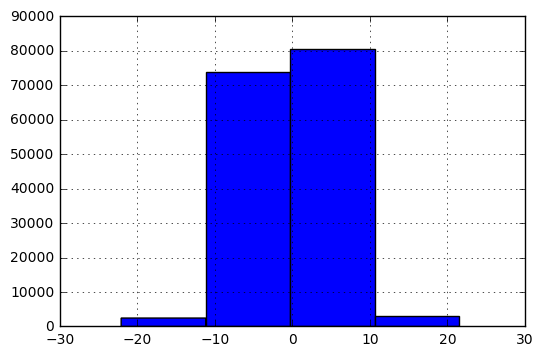

In [168]:
df.x39.hist(bins=4)

In [169]:
df.x40.value_counts()

 15.779037    1
-7.676228     1
-6.415070     1
 20.533346    1
 11.716952    1
-34.665078    1
 5.814140     1
-17.057833    1
-1.714136     1
-21.056177    1
-16.487779    1
-5.243392     1
 16.923773    1
-36.489369    1
 7.120197     1
-19.717882    1
-23.771921    1
-12.755616    1
-25.446745    1
 9.670881     1
-13.864487    1
 7.390844     1
 19.471816    1
 4.592830     1
 24.366873    1
-14.094174    1
 7.870618     1
 37.017621    1
-7.480187     1
 0.602559     1
             ..
-10.566073    1
-27.324123    1
-10.402640    1
 3.742100     1
-34.088626    1
-33.809748    1
 1.045837     1
-15.740066    1
-4.505980     1
 1.882702     1
 16.475574    1
-6.858947     1
 3.837318     1
 9.221239     1
-23.067603    1
-15.888861    1
 11.508882    1
-15.890719    1
-5.206702     1
 2.603944     1
-14.032370    1
-5.132251     1
-12.437252    1
-12.780710    1
 16.193294    1
 3.405449     1
-24.670439    1
-8.145579     1
-28.910512    1
 24.662926    1
Name: x40, dtype: int64

In [170]:
df.x40.describe()

count    159964.000000
mean         -2.316526
std          17.043549
min         -74.059196
25%                NaN
50%                NaN
75%                NaN
max          88.824477
Name: x40, dtype: float64

In [171]:
df[df.x40.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
4267,0.421223,-0.861389,-10.805042,-1.148129,3.978923,1.474479,-15.709719,23.418606,2.556037,-2.694353,...,-25.033742,0.432149,-1.181896,1.520741,-0.240539,-34.636968,-4.432370,0.200375,-17.036008,0
10199,-0.055352,-1.739069,0.604094,5.280935,-4.218565,3.626761,0.878308,7.494487,-4.501240,5.443164,...,17.962429,-4.170797,-2.193931,1.437200,0.122252,-49.225987,-7.347174,-0.050813,1.782491,0
14969,0.012181,1.439597,3.519554,-9.127325,-1.156337,1.428539,5.117166,-0.718092,8.021194,5.618547,...,-4.631594,3.140116,1.499288,1.275113,-0.047437,19.478005,-1.874928,1.204105,-5.993673,1
18768,-0.730579,0.291591,28.063485,6.993431,-6.619646,-7.199966,40.802199,13.844222,-20.933619,-6.792461,...,18.217230,5.239997,2.481480,0.072623,0.246630,-23.371342,1.920698,-0.092975,-2.574111,0
22457,0.023241,0.083617,13.196093,-19.458211,8.091395,-3.337581,19.186128,-18.260172,-17.180606,-4.509815,...,17.610971,-3.626454,0.992109,7.872196,0.300542,-21.022769,1.794122,-1.777030,-3.087103,0
23903,0.502087,0.997081,-13.677701,4.244250,11.245450,4.605565,-19.886350,-30.750144,10.982702,4.356494,...,5.136020,-5.535607,1.297422,3.990545,-0.161860,22.047210,-5.018336,0.140906,8.894917,0
35161,0.040540,-2.685635,-28.135952,1.232094,2.197202,-1.213249,-40.907560,-80.372689,-5.190350,2.894666,...,2.940379,-12.989024,0.256035,0.216984,0.033789,8.931751,-5.346050,1.090949,-4.846211,0
36863,0.319598,-2.444551,-4.532605,9.304739,-3.737923,-0.990156,-6.590066,-17.390367,-1.924604,1.214608,...,13.399202,1.903252,2.422073,2.266925,-0.293215,-7.878560,-2.516645,-3.665935,18.966070,1
40488,0.186960,0.734229,-1.312672,11.891357,-1.639488,-15.590226,-1.908527,-0.317959,5.016438,7.115005,...,-12.748063,4.757861,0.275843,0.618180,0.564662,31.848942,-0.891579,0.329403,13.290276,0
51470,-0.255706,10.964692,-12.909183,-6.168072,0.172457,-2.109591,-18.768982,-58.962341,-0.749951,-13.532549,...,-12.734496,-9.986967,-2.238724,-3.199993,-0.305835,21.709988,-2.309511,-4.290968,-4.813046,0


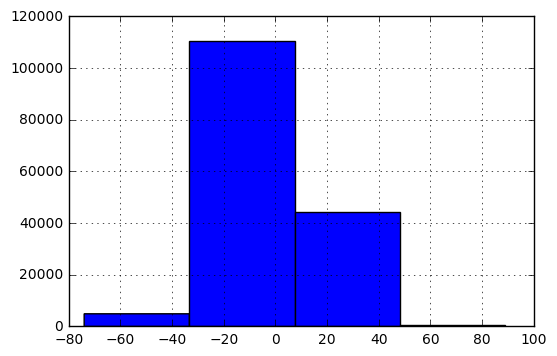

In [172]:
df.x40.hist(bins=4)

In [173]:
df.x41.value_counts()

-18.961464    1
 13.840473    1
-11.723818    1
 4.529367     1
 12.984581    1
 6.058890     1
-6.160072     1
 17.995178    1
 59.129919    1
 15.863949    1
 20.986473    1
 30.019279    1
 31.143265    1
-21.117874    1
-17.572296    1
 9.676178     1
-1.988236     1
-19.977173    1
 28.451975    1
 22.634819    1
-4.545127     1
-14.575138    1
 4.557720     1
 2.069705     1
 31.540482    1
 15.469910    1
 17.628823    1
-2.381379     1
 21.699036    1
 4.461853     1
             ..
-1.980733     1
 37.879940    1
 24.755341    1
-13.839822    1
 2.005569     1
 10.992759    1
 36.899132    1
 9.414116     1
-12.331256    1
 14.072070    1
-3.767523     1
 3.675137     1
-24.066332    1
-8.701443     1
-13.680276    1
 26.302558    1
 19.779809    1
 14.784018    1
 13.199542    1
 23.168173    1
 12.690326    1
 26.306975    1
 16.625910    1
-22.495119    1
 16.959876    1
-5.181340     1
 56.088101    1
-7.306284     1
-14.127683    1
 0.621978     1
Name: x41, dtype: int64

In [174]:
df.x41.describe()

count    159960.000000
mean          6.701076
std          18.680196
min         -82.167224
25%                NaN
50%                NaN
75%                NaN
max         100.050432
Name: x41, dtype: float64

In [175]:
df[df.x41.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
6314,0.064129,0.733895,-2.123261,3.336779,7.489808,-6.210088,-3.087062,29.733256,-0.935956,5.433698,...,NaN,1.178256,-0.637288,0.018333,0.071706,-66.598784,3.167489,-0.049255,-12.607445,1
9536,0.344338,-4.332871,13.442168,3.767049,-1.483966,2.930683,19.543902,-33.538178,-1.746323,-8.299422,...,NaN,3.699389,-0.963360,-1.629568,-0.010770,21.377371,-0.082936,0.181667,-23.057362,0
16560,-0.515065,-0.764943,-4.598895,7.121530,1.766365,-5.618678,-6.686448,33.893683,3.060360,-10.751355,...,NaN,1.490263,2.953752,3.423490,0.209689,-19.592547,-2.406078,1.115009,4.265794,0
19284,-0.160550,-9.891510,0.248106,-6.698847,-5.994999,5.343508,0.360728,-9.484174,2.269335,2.232987,...,NaN,-4.377818,-0.940691,6.965001,0.257437,-81.274614,-2.143709,0.030308,-8.351098,0
23132,0.150343,-3.695870,8.275736,-13.053378,-9.209044,-0.834152,12.032298,-70.490016,8.611509,8.600380,...,NaN,-1.206211,-0.481789,-2.911356,0.334714,-43.852867,4.435188,-1.974819,-22.552777,0
34349,0.172802,-5.965891,-9.627235,13.340082,-15.556303,5.321930,-13.997276,-2.277328,-2.756320,0.810022,...,NaN,0.836422,-1.708084,-0.715931,0.505080,13.444422,0.511704,2.744871,28.387828,1
36629,-0.612755,-3.655480,9.939066,21.963220,7.055541,-3.565628,14.450655,0.770673,-2.418733,-7.922054,...,NaN,-3.409959,2.457183,3.729114,-0.275480,-28.676425,0.848523,0.570709,-14.848525,0
49185,-0.354278,3.647227,-1.292024,-8.420213,-16.285284,-6.870666,-1.878505,-54.442606,12.102783,2.151901,...,NaN,-5.623832,-3.039184,1.882367,-0.363227,-25.794457,-3.386626,0.175252,6.383522,1
52544,-0.126573,5.009648,-1.167507,-4.830467,0.233901,-9.973731,-1.697467,24.116973,5.127002,5.203391,...,NaN,4.428988,-0.772338,-1.135936,0.064708,-14.966864,-8.260811,0.807454,-15.730326,0
53474,-0.398166,-2.273662,-15.635593,1.480850,-12.564700,-9.632567,-22.732977,10.656409,-14.164061,-2.680504,...,NaN,-8.648308,1.473018,-0.809437,-0.006393,10.594610,1.349837,2.725215,20.089470,1


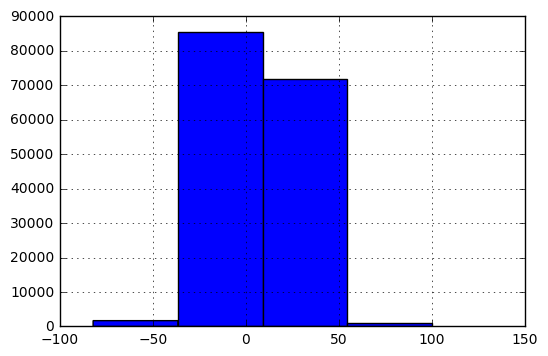

In [176]:
df.x41.hist(bins=4)

In [177]:
df.x42.value_counts()

-6.624523     1
-5.267761     1
-5.336473     1
-3.195311     1
-6.525636     1
 2.960583     1
 0.646079     1
 7.372056     1
 0.714069     1
 4.464642     1
-3.837872     1
-3.980581     1
 4.494600     1
-20.649464    1
-1.898880     1
-7.335991     1
-2.316890     1
-5.150762     1
-1.892282     1
-2.963790     1
-11.591373    1
 5.593668     1
 4.913414     1
-2.975728     1
-16.642231    1
 4.069770     1
 1.575318     1
 8.037569     1
-7.471175     1
-0.461123     1
             ..
-3.271381     1
-6.139663     1
-2.442179     1
-1.928839     1
 1.691719     1
 0.199194     1
-9.817357     1
-0.904851     1
 7.714938     1
 4.086221     1
 0.492013     1
-4.747039     1
-1.240332     1
 4.785179     1
 3.761460     1
-8.128988     1
 4.901254     1
-8.826017     1
-13.246008    1
-1.766409     1
-0.412134     1
 8.581785     1
-1.488388     1
 1.511938     1
 3.668236     1
-6.637078     1
-8.856787     1
 1.674654     1
-0.823200     1
 12.435841    1
Name: x42, dtype: int64

In [178]:
df.x42.describe()

count    159974.000000
mean         -1.833820
std           5.110705
min         -27.933750
25%                NaN
50%                NaN
75%                NaN
max          22.668041
Name: x42, dtype: float64

In [179]:
df[df.x42.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
2494,-0.123711,-1.620879,16.700417,3.394063,-0.122918,2.553807,24.281152,-33.000264,2.293124,-4.587878,...,19.281456,NaN,-0.254266,0.693774,0.920159,16.500257,9.375547,-3.590667,-18.836055,0
4228,0.408419,-6.095736,20.230760,-10.429313,-8.016796,-5.223462,29.414004,-31.859093,3.586522,10.507129,...,28.616352,NaN,0.175471,2.139350,0.019363,30.876271,-7.616673,-1.711413,-25.111378,0
4772,-0.150010,-1.860623,-10.700777,-0.119154,-1.296007,-6.253465,-15.558125,-1.016964,-2.391870,-1.061856,...,-9.639365,NaN,-1.099104,4.845819,0.746206,-2.593566,-5.457007,1.177852,11.895771,1
23255,0.225475,-2.923148,7.274872,2.198575,-7.755773,-2.255470,10.577117,-28.149152,12.557949,7.843980,...,11.914012,NaN,0.100242,-2.745467,0.313406,16.725951,3.331580,0.109027,0.042966,0
26607,0.128580,2.563901,-6.632229,-5.349326,-3.744355,14.017648,-9.642762,-14.887154,-4.149800,-0.138572,...,26.645109,NaN,-1.311748,4.668716,-0.338338,-17.812516,-4.398519,3.147931,13.242325,0
32642,-0.184354,0.118722,4.223951,-5.859291,1.632858,9.429767,6.141308,54.658880,11.970206,-4.450921,...,-20.094348,NaN,2.046521,0.789651,0.628887,-65.684295,-4.768527,0.614099,-15.210665,1
40927,0.188058,1.879674,15.502584,-9.283355,2.871608,-1.402752,22.539592,-1.377190,0.587726,-13.852794,...,7.704284,NaN,0.997676,-3.578852,-0.316762,18.483787,-8.157476,-0.700636,-3.843158,0
43380,0.210457,1.141610,10.761506,-3.239478,-7.724748,2.900796,15.646421,62.510852,7.019737,6.494962,...,-34.907749,NaN,3.342997,-8.330656,-0.312516,-43.682433,6.188615,-0.663633,-34.955884,0
49524,-0.482392,-2.765262,5.752982,10.096253,-2.500625,-8.529319,8.364404,-10.514554,13.167158,1.222030,...,23.077727,NaN,1.142174,-8.074627,-0.042186,-49.687925,4.518849,1.161363,-9.101748,0
51425,-0.126025,-4.048907,-9.072000,-2.765749,3.768419,2.703827,-13.190007,6.727358,-5.891444,-6.730906,...,-20.640843,NaN,0.024140,-3.530790,-0.221889,-0.328723,2.050863,-0.987485,11.880420,0


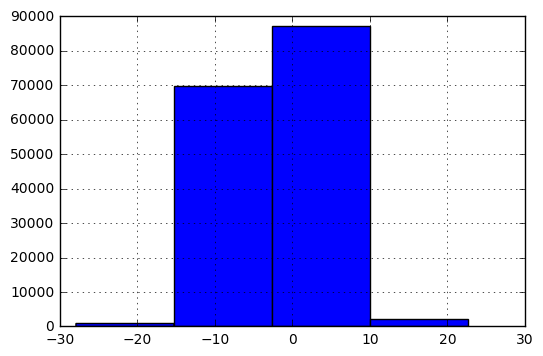

In [180]:
df.x42.hist(bins=4)

In [181]:
df.x43.value_counts()

 0.059963    1
 1.604073    1
 0.372736    1
-0.625888    1
 0.235729    1
-1.701094    1
-1.601046    1
 0.366084    1
 1.006926    1
-0.793516    1
-0.325307    1
 0.920867    1
 1.519602    1
-0.263658    1
-1.569004    1
 0.268448    1
-0.242540    1
 0.642721    1
-0.539527    1
-0.819605    1
-3.158415    1
 0.399832    1
-0.463671    1
 0.975763    1
 0.264524    1
-1.295223    1
 0.066151    1
-1.716617    1
 0.965676    1
-0.733867    1
            ..
-0.396444    1
 0.099577    1
-0.314872    1
-0.309237    1
 1.803549    1
 2.635210    1
 4.063433    1
-4.381439    1
-2.596722    1
 2.444769    1
 0.924203    1
 1.131841    1
-0.728137    1
-1.003502    1
 1.706638    1
 1.794003    1
 0.472400    1
 0.012723    1
-0.082436    1
-0.504574    1
-0.308361    1
 1.305009    1
-0.423034    1
-0.664948    1
-2.611455    1
-0.955203    1
 2.055770    1
 2.762936    1
 0.423559    1
 1.426730    1
Name: x43, dtype: int64

In [182]:
df.x43.describe()

count    159963.000000
mean         -0.002091
std           1.534952
min          -6.876234
25%                NaN
50%                NaN
75%                NaN
max           6.680922
Name: x43, dtype: float64

In [183]:
df[df.x43.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
29,-0.321393,-5.910640,6.243552,-12.936755,4.847573,11.270850,9.077655,-33.353069,-5.373054,3.055698,...,45.536116,5.295248,NaN,-7.541517,0.202396,-7.226681,-2.508254,-3.089376,-0.269219,0
3524,-0.535930,2.029873,30.581772,3.762018,3.952023,-3.094192,44.463599,-41.317349,17.676432,5.175998,...,36.816962,5.726635,NaN,5.426533,0.144462,32.067195,-13.218609,2.477620,-11.497389,1
4970,0.161764,-0.134825,-2.901338,8.538163,9.145187,4.014094,-4.218327,5.219568,-17.608697,-2.789526,...,-7.659890,-8.155100,NaN,2.044939,-0.813419,-70.216023,0.063025,-1.028916,-8.984564,0
5684,-0.006051,6.863173,20.486489,-5.992723,4.021422,-5.841237,29.785816,-14.104771,-2.483663,8.947339,...,-12.489988,3.897520,NaN,0.059581,-0.023508,24.560142,-0.173366,-2.143758,-32.058506,0
13028,0.850703,5.983346,-29.406201,6.761479,6.478221,-11.352988,-42.754407,-43.379750,-3.368096,1.501612,...,-12.522353,-5.211494,NaN,3.146131,0.200495,19.201375,-6.747437,0.331893,3.388172,0
20368,0.148606,11.868292,8.701643,-5.287021,-0.488081,-4.779642,12.651535,12.644027,7.656372,0.333718,...,1.952674,0.030032,NaN,-4.115814,0.291872,-22.733591,-1.704692,1.216503,-11.437671,0
24509,-0.292575,-10.341989,-2.119225,-4.678792,1.454585,-6.284352,-3.081194,-25.005725,9.539168,-10.204978,...,8.384471,-3.182714,NaN,-0.619910,-0.074886,17.721274,-4.554458,-2.732106,3.907485,0
27516,0.718241,-10.893233,10.322202,-1.459528,-7.329613,-2.791914,15.007705,-39.587063,-0.577508,-9.139862,...,21.217218,4.783198,NaN,1.994648,0.273807,14.799285,7.354677,-1.792445,-16.305544,0
31096,-0.463800,1.724908,0.747641,6.042365,9.436707,11.098780,1.087014,-18.468258,19.762891,-3.334967,...,25.029824,-2.111808,NaN,3.223515,-0.180689,17.256123,-9.018159,-0.476631,28.985225,0
31734,-0.164486,-7.984434,0.042619,9.169870,2.841382,8.148800,0.061965,-27.482969,-26.630962,-1.964038,...,13.818873,-0.415044,NaN,-1.170966,0.533638,24.398593,5.403507,0.846935,0.584782,1


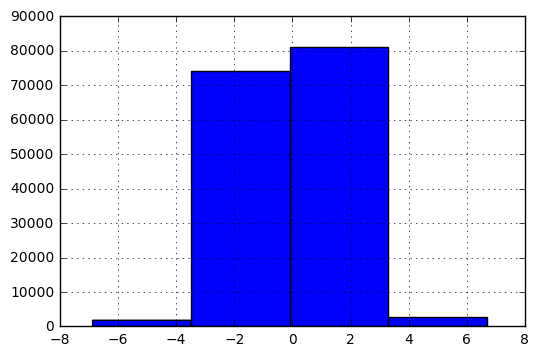

In [184]:
df.x43.hist(bins=4)

In [185]:
df.x44.value_counts()

 1.359872     1
-5.874332     1
 1.001246     1
 4.384508     1
 1.240316     1
-2.095806     1
-1.075560     1
 5.207682     1
 3.383789     1
 5.033989     1
 0.340634     1
-2.823935     1
-2.478642     1
-2.487091     1
 10.210562    1
-3.315617     1
 2.921145     1
-4.323992     1
-4.247131     1
-3.513805     1
-1.256575     1
-2.318503     1
-1.804081     1
-1.424018     1
 6.548021     1
 3.096944     1
-3.538354     1
-4.762321     1
 4.696158     1
-3.184009     1
             ..
-0.418822     1
 4.103625     1
-2.308743     1
-0.643756     1
-7.740225     1
-1.536858     1
 1.426253     1
 5.143046     1
 5.823962     1
-3.478973     1
 2.187782     1
 3.567981     1
 0.755620     1
 3.653524     1
-3.668433     1
-3.999212     1
 1.008257     1
-3.778263     1
-3.153959     1
-0.869765     1
-3.426034     1
 0.653961     1
 0.654001     1
 0.008220     1
 0.715083     1
-0.830701     1
-3.551335     1
 1.301914     1
 6.195402     1
-3.496780     1
Name: x44, dtype: int64

In [186]:
df.x44.describe()

count    159960.000000
mean         -0.006250
std           4.164595
min         -17.983487
25%                NaN
50%                NaN
75%                NaN
max          19.069759
Name: x44, dtype: float64

In [187]:
df[df.x44.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
3002,-0.546446,-2.971116,-1.966118,3.384688,6.922201,-12.453335,-2.858588,5.861369,4.745475,12.402705,...,-12.003708,4.965209,-0.995096,NaN,-0.352878,57.812405,10.622123,-1.390795,31.014325,0
3153,0.047543,3.123937,3.516100,-7.439899,2.156110,5.872925,5.112145,-81.722408,-17.776437,-12.357175,...,34.928332,4.879791,-0.585084,NaN,-0.407511,52.109319,-6.915316,1.099745,11.772908,0
7744,-0.041578,-11.303963,-2.525444,-3.451194,-8.834693,-9.959640,-3.671805,49.640128,-0.694991,8.313909,...,-9.217659,8.671700,-2.556710,NaN,0.170646,50.967737,2.661283,0.377309,23.389779,0
13533,0.130170,-4.114213,0.559606,-0.447667,-8.082574,17.048851,0.813624,-51.739755,-7.785840,1.872953,...,11.142551,-4.086831,0.154830,NaN,0.594041,0.944987,4.066672,-1.184021,-7.838442,1
15542,-0.260612,10.938273,-13.441830,6.379178,-2.477150,-2.264452,-19.543411,20.739915,6.243216,7.951233,...,11.785708,1.038575,-0.843377,NaN,-0.256679,6.052652,-4.798245,1.731002,17.177369,1
21866,-0.133299,-0.776024,-13.966752,6.408209,-5.779369,8.901566,-20.306608,58.084717,-7.920815,4.074986,...,-28.682843,4.205938,1.073449,NaN,-0.044077,7.061896,10.039040,0.591157,39.737974,1
22397,-0.251722,3.221839,-11.138968,4.218322,2.012929,2.883365,-16.195223,-4.279541,3.314403,16.527639,...,0.241244,-2.591757,-0.569431,NaN,-0.292303,-36.060783,-0.574504,1.020219,-14.775083,0
25457,0.191788,-2.999464,4.775030,-10.008718,3.439059,2.840510,6.942535,-1.443501,3.198626,2.863408,...,5.298600,-1.587674,-1.132803,NaN,-0.313628,-51.258138,-6.433126,-0.047839,-23.575061,0
31983,-0.345218,0.964292,-2.867164,-6.826557,-2.855497,-8.256536,-4.168640,-12.353965,7.792498,7.999790,...,20.225945,4.183972,1.560669,NaN,0.193468,-18.111593,2.063573,0.057130,1.131313,0
34119,-0.892837,4.540015,5.504972,22.350451,-5.401199,-5.387203,8.003816,-7.816937,4.399430,0.487740,...,4.025687,3.566726,0.655049,NaN,-0.337767,28.491870,9.624774,1.524546,8.450022,0


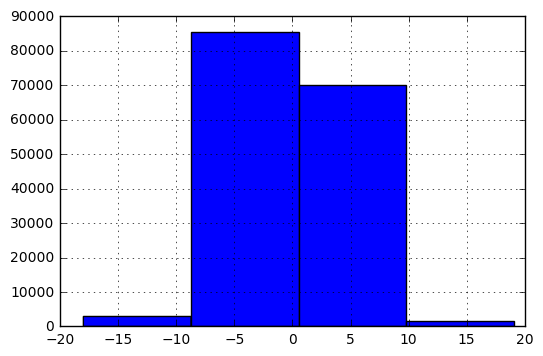

In [188]:
df.x44.hist(bins=4)

In [189]:
df.x45.value_counts()

 0.662658    1
-0.286481    1
 0.388563    1
-0.404012    1
 0.466235    1
-0.350275    1
-0.118982    1
-0.294908    1
-0.006434    1
 0.152380    1
 0.213429    1
 0.281852    1
 0.632791    1
 1.046119    1
-0.159220    1
 0.360240    1
-0.130812    1
-0.009958    1
 0.668461    1
 0.668214    1
-0.183558    1
 0.488944    1
-0.135828    1
 0.201303    1
 0.036119    1
-0.442829    1
 0.096358    1
 0.379107    1
 0.957482    1
 0.653382    1
            ..
 0.356468    1
-0.155807    1
-0.184124    1
-0.436968    1
 0.022573    1
 0.157603    1
-0.217057    1
-0.320544    1
 0.318811    1
 0.223027    1
 0.132169    1
 0.249268    1
 0.646898    1
-0.483757    1
 0.853994    1
 0.795342    1
-0.757376    1
-0.214587    1
 0.433053    1
 0.037029    1
 0.198078    1
-0.221285    1
 0.265136    1
-0.149167    1
 0.491713    1
 0.209857    1
 0.215756    1
-0.029657    1
 0.151232    1
-0.114926    1
Name: x45, dtype: int64

In [190]:
df.x45.describe()

count    159971.000000
mean          0.000885
std           0.396621
min          -1.753221
25%                NaN
50%                NaN
75%                NaN
max           1.669205
Name: x45, dtype: float64

In [191]:
df[df.x45.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
152,-0.708329,4.782119,-4.878719,-0.415667,-8.783684,4.117973,-7.093291,40.410110,-18.559044,5.335397,...,-13.945912,-5.367317,-0.720417,4.093962,NaN,-64.118235,-5.258002,1.241856,1.561127,0
7009,0.063381,-12.582486,7.945881,1.769608,7.737494,-2.439867,11.552714,32.219627,4.523283,-3.509827,...,-9.449870,5.622011,3.185207,-7.198773,NaN,-77.569592,-1.265957,-4.383723,-15.318501,1
10601,-0.468468,2.293564,-4.323046,-1.854225,-1.071474,-0.074507,-6.285384,-9.366764,-1.195954,5.937416,...,-0.919835,2.417357,0.704539,-3.931795,NaN,24.014856,4.389514,-1.417026,3.704504,0
17400,-0.555559,-3.424944,-2.626814,11.391003,6.264519,-0.498390,-3.819190,-26.313595,-6.113818,-1.334240,...,20.613513,-2.281489,2.827630,3.491622,NaN,-5.005481,-4.157780,-0.582316,7.664679,1
18272,0.185886,-0.781333,-20.734278,-1.508996,2.690173,0.006116,-30.146082,-8.150562,-2.303087,5.661150,...,5.573887,-7.852366,1.494057,2.303860,NaN,-31.351934,8.317380,2.029519,14.711954,0
18658,-0.535330,-6.487691,6.061324,-0.864508,-5.914813,-1.216585,8.812709,8.899159,4.845813,6.212911,...,2.648619,3.827358,0.422856,-7.594808,NaN,13.017007,1.853745,2.331856,1.639895,1
23031,-0.363293,-6.431722,-14.939546,-0.306081,3.344203,9.782527,-21.720977,10.400903,0.456762,-10.381555,...,7.445828,-0.849345,-0.179815,5.207077,NaN,-8.192286,-0.130843,0.969951,31.781682,1
30350,0.335318,-1.689149,3.314257,-5.889562,-12.357632,-1.185848,4.818681,-22.920978,5.705488,-1.584782,...,2.545228,3.033077,-1.608716,-6.573388,NaN,44.749398,0.632044,0.173824,10.211454,1
39519,-0.475913,7.952284,-5.696640,1.659240,2.470121,-0.715878,-8.282486,30.367899,0.167528,0.920582,...,-11.973319,4.503699,-1.955782,-2.722363,NaN,-25.857140,12.533697,1.199037,-15.133793,0
51766,0.052191,9.315931,-2.345792,-5.101722,-3.462725,7.642194,-3.410605,-3.031450,4.578765,-11.044386,...,15.374228,-4.998086,1.467984,-6.881751,NaN,-35.173729,2.321210,-0.423193,6.353999,0


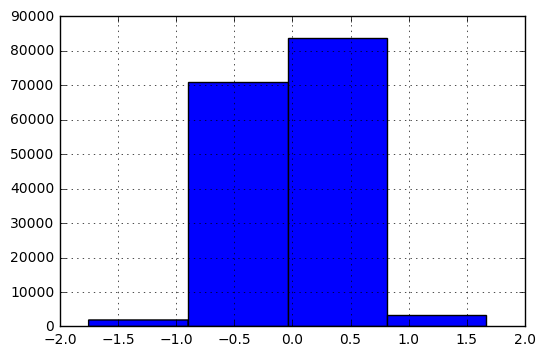

In [192]:
df.x45.hist(bins=4)

In [193]:
df.x46.value_counts()

-2.296283     1
-71.979516    1
-27.954453    1
-26.867287    1
 25.094451    1
 47.957915    1
-62.373247    1
 52.557478    1
-55.520496    1
-34.106417    1
 16.018577    1
 33.593107    1
-99.570286    1
-28.951211    1
 45.927496    1
-58.748629    1
-22.061738    1
-57.913042    1
 23.645839    1
-24.002457    1
 19.514163    1
-12.625656    1
 28.642509    1
-52.332499    1
-18.364250    1
 39.936660    1
-55.513550    1
-10.600033    1
-38.613297    1
-26.452218    1
             ..
 5.007024     1
-96.934283    1
-11.416685    1
-79.643290    1
-0.797863     1
-41.185399    1
 3.679847     1
-27.720935    1
-63.933462    1
 11.648289    1
-70.576466    1
-52.661930    1
-31.326044    1
-7.197072     1
 9.881618     1
 9.450572     1
-6.017525     1
-30.558123    1
-23.094309    1
-53.416721    1
 63.165112    1
-6.551598     1
-39.887012    1
-24.086908    1
-28.118219    1
-13.435346    1
 17.085333    1
 40.843426    1
-21.583056    1
-41.189814    1
Name: x46, dtype: int64

In [194]:
df.x46.describe()

count    159969.000000
mean        -12.755395
std          36.608641
min        -201.826828
25%                NaN
50%                NaN
75%                NaN
max         150.859415
Name: x46, dtype: float64

In [195]:
df[df.x46.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
5986,-0.377976,-16.453054,-3.095503,2.762712,-3.074271,4.055400,-4.500628,-8.341258,-3.433294,-1.758831,...,-13.308128,0.559476,-0.519531,8.873660,0.038024,NaN,0.953903,0.825806,9.384029,0
15394,0.335703,11.205764,-0.085325,2.887239,4.932323,-1.447035,-0.124056,23.187725,-6.313594,1.804197,...,0.229783,-3.287651,-0.996025,5.866739,-0.587956,NaN,3.793240,0.138216,4.546808,0
17276,-0.057803,-11.895401,8.310068,1.709020,4.885079,2.105441,12.082214,17.091948,-10.177397,-3.408829,...,-16.678022,0.074938,-2.190151,-1.230974,-0.347054,NaN,1.457153,1.715171,-13.465489,0
17463,0.642601,3.973879,3.910041,-14.683301,7.982830,-6.419100,5.684905,-24.355096,-8.813191,-3.182822,...,26.532046,-0.780807,0.462471,3.315540,-0.130067,NaN,5.281145,1.768452,-20.463092,0
21677,-0.618831,2.222185,-8.490534,-9.314425,7.181965,12.450407,-12.344598,23.346931,11.786138,-10.171655,...,1.722298,-0.429296,0.998137,-0.063308,-0.331448,NaN,1.058622,0.735272,16.519153,1
22519,0.213220,-4.380677,-11.691662,4.492998,1.837775,-11.749755,-16.998798,-10.515976,0.884549,-7.734777,...,17.306467,-14.303489,1.072260,0.792532,0.070148,NaN,-6.270996,-0.448408,21.803970,1
25655,0.290201,-1.364584,-6.997399,-3.458678,-5.625505,-12.456051,-10.173692,27.278613,-13.547528,7.610912,...,-7.944811,1.698711,1.484016,0.604292,-0.816029,NaN,2.941681,2.673771,-7.104549,0
27282,0.104643,1.806280,1.277986,7.578967,-4.380135,-4.207822,1.858095,54.679796,5.311060,5.590456,...,-11.478609,-2.661644,0.769976,0.439288,0.252131,NaN,2.331359,-0.428495,-9.736925,1
30730,-0.251139,-9.806754,-0.654458,2.039027,1.037878,-9.535597,-0.951532,-7.743592,13.201928,-18.794957,...,-7.175493,-2.804946,-0.094833,1.171915,0.368216,NaN,-3.143284,-1.868451,17.123656,1
45264,0.971457,-7.851066,24.659630,-11.534330,-6.009149,-11.736010,35.853248,-14.023953,-17.793950,1.356853,...,21.037746,4.067153,0.124670,4.547731,-0.003145,NaN,-5.912184,0.629371,2.121961,1


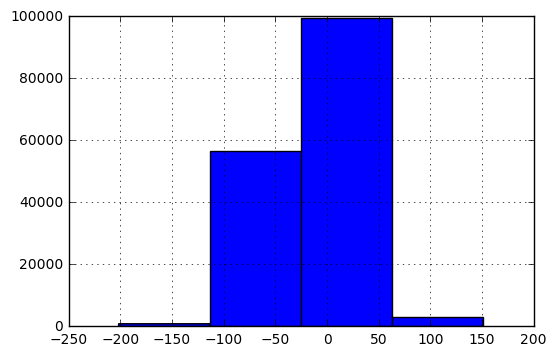

In [196]:
df.x46.hist(bins=4)

In [197]:
df.x47.value_counts()

 1.289854     1
 5.132495     1
 5.309282     1
-2.441095     1
 1.448175     1
-4.618977     1
-2.624225     1
 4.527896     1
 5.246215     1
 3.305255     1
 1.590456     1
 1.507322     1
-0.291440     1
 1.458828     1
 8.871013     1
-4.676961     1
 2.247900     1
-1.518674     1
 3.228850     1
-0.080250     1
 2.851638     1
-3.450375     1
-3.300980     1
-3.737872     1
-3.036270     1
 1.707592     1
-8.832101     1
 2.858904     1
 4.501001     1
 1.293632     1
             ..
-2.447623     1
 0.657791     1
 3.752743     1
-0.565765     1
-4.202358     1
 5.934626     1
 1.038039     1
-1.707566     1
 5.976348     1
 0.987790     1
 6.448813     1
 9.155390     1
 0.722027     1
-0.448724     1
-7.153009     1
 3.049977     1
-4.864030     1
-7.023258     1
 1.972243     1
-7.393583     1
-2.424300     1
 4.568512     1
 6.512133     1
 3.512985     1
 2.745664     1
-9.185168     1
 3.444743     1
 0.213262     1
-1.769224     1
 10.789021    1
Name: x47, dtype: int64

In [198]:
df.x47.describe()

count    159963.000000
mean          0.028622
std           4.788157
min         -21.086333
25%                NaN
50%                NaN
75%                NaN
max          20.836854
Name: x47, dtype: float64

In [199]:
df[df.x47.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
3739,0.267943,0.180738,1.621848,9.208036,3.785205,0.771084,2.358044,6.460898,-3.596255,-2.763083,...,6.339663,-3.471479,-0.302955,-6.579028,0.425815,-56.902734,NaN,0.679248,-16.241956,0
6941,-0.363726,-7.951324,16.634268,-0.492567,6.827193,5.491687,24.184976,-4.331218,-11.836705,-14.049335,...,0.294125,4.839396,-0.019920,-3.028267,0.092734,1.589079,NaN,-2.158704,-18.566281,0
7859,-0.158268,-1.543734,-4.258464,-2.998463,-0.492741,-3.767104,-6.191486,61.709785,12.298183,2.718309,...,-37.893303,-1.017825,-2.453504,3.041917,0.169557,13.807600,NaN,-0.342759,24.397377,1
11606,-0.096273,-2.097858,12.981931,-14.620046,2.118509,3.924028,18.874752,13.090040,-8.303728,7.941700,...,5.095060,-8.581306,0.925770,3.329009,-0.846998,-41.525797,NaN,-1.444666,-14.158721,1
12729,-0.163261,-9.586542,5.441110,6.813517,-1.487329,-11.399729,7.910965,7.420481,21.495040,4.171503,...,-4.772228,-7.958478,3.115511,2.513670,0.013493,-18.283751,NaN,-1.438692,-2.256042,1
15791,-0.538819,-6.865230,-5.434832,1.329973,2.841708,1.670105,-7.901838,2.934689,-1.256520,-2.232892,...,-13.992710,-1.586627,0.162189,5.585762,-0.887340,33.597574,NaN,-3.070932,10.735510,0
18711,0.384759,-6.983742,-32.971385,-4.986450,-7.571697,1.003121,-47.937916,-45.210287,0.612355,12.954087,...,-13.708952,-5.982957,0.223879,3.716273,0.345991,59.909516,NaN,-0.444311,17.688831,0
28961,-0.667654,-0.442591,9.804900,-2.840227,-6.195197,-11.885098,14.255588,10.790493,2.462066,-10.491766,...,14.617534,6.103888,0.434135,-0.412065,0.440178,3.850871,NaN,-1.566419,6.708756,0
29417,0.352661,-3.823974,-10.848782,-1.512588,-4.066969,-7.340612,-15.773314,-13.988952,1.962929,7.637376,...,15.403076,1.617748,-0.711098,-0.881782,-0.236812,40.390827,NaN,2.747853,26.015656,1
30472,0.486320,0.142883,-0.232709,-6.984300,-14.297880,-5.751548,-0.338341,30.501316,0.370295,0.206335,...,-9.376595,-8.871165,-1.689789,-7.789929,-0.164908,-50.346839,NaN,-0.333801,-10.455969,1


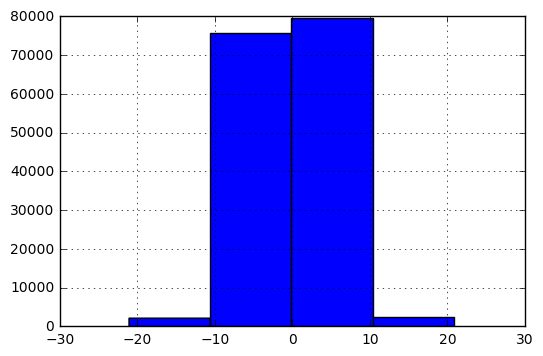

In [200]:
df.x47.hist(bins=4)

In [201]:
df.x48.value_counts()

 2.212401    1
 3.065862    1
-1.246461    1
-0.300812    1
-0.450369    1
 0.640959    1
 1.166373    1
-1.970849    1
 1.573387    1
 0.348249    1
-0.167637    1
-2.156335    1
 1.789813    1
-1.519143    1
 0.265874    1
-1.982010    1
-3.024910    1
 0.757038    1
 2.311788    1
-0.611700    1
-0.079427    1
 2.063077    1
 0.248625    1
 0.271547    1
-4.190337    1
 1.052464    1
 0.528808    1
 2.127803    1
 3.469122    1
 0.013879    1
            ..
 0.351206    1
 0.126267    1
-2.132717    1
 2.538196    1
 0.466230    1
-0.588569    1
-1.396481    1
 0.690443    1
 0.868113    1
 2.771389    1
 0.284850    1
-1.082715    1
 3.138938    1
 1.522369    1
 1.687665    1
 2.672182    1
-1.331352    1
-3.645387    1
-0.659154    1
 1.770286    1
 0.473669    1
 0.874980    1
-0.153680    1
-3.493509    1
-0.834410    1
-4.337859    1
-0.715691    1
-0.002006    1
 1.570939    1
-1.017607    1
Name: x48, dtype: int64

In [202]:
df.x48.describe()

count    159968.000000
mean         -0.000224
std           1.935501
min          -8.490155
25%                NaN
50%                NaN
75%                NaN
max           8.226552
Name: x48, dtype: float64

In [203]:
df[df.x48.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
27313,0.326529,-3.399469,1.664655,-3.258798,-5.393121,-0.300599,2.420284,-30.114413,4.313319,1.073181,...,9.830066,-7.520367,1.671282,2.044869,-0.171675,-16.527186,-3.023051,NaN,-5.443989,1
31049,-0.039833,-7.168605,-22.248024,19.329173,-1.797846,2.378784,-32.346955,28.800928,13.631768,-3.082945,...,-26.889890,-2.647545,2.792826,-2.217412,-0.236239,-40.912878,-4.547821,NaN,1.028128,0
41838,-0.019652,-2.967922,12.712392,0.341719,-8.171284,-8.067740,18.482862,18.475189,-5.118203,3.009592,...,2.466180,-0.002918,1.941548,8.869368,-0.011472,-44.811404,1.385044,NaN,-4.330179,0
45142,0.094995,-4.297566,5.083988,3.743369,-2.331681,3.986539,7.391736,-25.569216,-5.696445,1.665477,...,2.808413,-7.207484,-0.420365,5.671973,-0.330532,-11.991709,3.234918,NaN,-15.073926,0
47606,-0.097478,4.995155,3.745593,-13.884955,6.596173,-14.957476,5.445811,-7.068664,-1.892208,14.265345,...,3.636387,-0.748541,0.449903,1.107254,-0.065147,19.288356,4.448032,NaN,-0.492228,1
50266,0.400972,-8.042457,-7.617896,0.993688,-0.206247,-9.582430,-11.075849,4.061344,2.946765,3.628374,...,-6.991152,0.392650,-1.253272,-0.653040,0.208377,0.620573,-1.585753,NaN,5.404046,0
50511,-0.026691,1.722223,-8.992871,0.776886,4.686858,6.171632,-13.074958,31.048910,2.429867,3.851224,...,-35.359608,3.498984,0.456373,-2.075984,-0.295481,3.300807,-3.676695,NaN,10.214605,0
55186,0.220074,-3.123024,-28.123904,8.152182,-3.072571,-15.192594,-40.890043,-64.656198,-4.239840,-13.852870,...,4.166163,-13.396210,-0.120894,-2.749115,0.090586,-57.532530,-3.677119,NaN,-21.308191,0
61932,-0.113125,-3.536180,4.424095,9.675924,-2.568725,-1.974453,6.432301,-3.957654,4.307517,-0.727863,...,-3.525403,6.304118,-0.364177,2.271272,0.060341,40.765685,9.406105,NaN,-3.862722,0
71892,0.411095,-0.795546,8.121973,-3.799476,-2.870679,3.273844,11.808738,-29.506318,0.034676,2.309717,...,15.202902,-7.272310,0.573956,-0.094007,0.369714,-39.740726,-2.333620,NaN,-12.750547,0


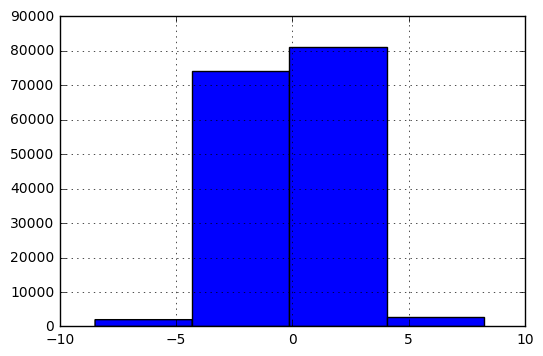

In [204]:
df.x48.hist(bins=4)

In [205]:
df.x49.value_counts()

 18.793192    1
-1.354043     1
 13.856544    1
 11.406257    1
 2.448964     1
-3.485172     1
 4.980289     1
 7.903228     1
-10.329953    1
-10.831845    1
 16.275071    1
 13.788589    1
 14.840533    1
 27.122328    1
 7.234394     1
 17.562864    1
 8.320830     1
-7.585314     1
-9.611573     1
-9.337708     1
 3.419083     1
 7.989186     1
-3.940918     1
-9.725419     1
-8.368741     1
-23.276750    1
-3.035468     1
 16.317790    1
-11.616120    1
 0.492969     1
             ..
-2.006240     1
 22.061759    1
-8.030659     1
-21.786827    1
-4.217873     1
 17.524405    1
-2.649407     1
 1.353291     1
-4.981303     1
 28.976370    1
 9.198660     1
-2.614144     1
 40.957735    1
-10.874527    1
 16.387512    1
-1.754674     1
-17.906251    1
 8.657176     1
-18.829949    1
 7.472196     1
 9.114345     1
 6.659042     1
 37.640822    1
 8.416457     1
 7.048330     1
-2.833468     1
-1.759824     1
-33.094728    1
-23.236722    1
-19.702606    1
Name: x49, dtype: int64

In [206]:
df.x49.describe()

count    159968.000000
mean         -0.674224
std          15.036738
min         -65.791191
25%                NaN
50%                NaN
75%                NaN
max          66.877604
Name: x49, dtype: float64

In [207]:
df[df.x49.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
3504,0.494839,6.600083,-0.512875,-8.243838,-8.862430,0.219990,-0.745681,-33.409550,10.839640,11.619612,...,21.438085,-1.358646,0.688266,2.712189,-0.479139,18.372630,3.832426,2.456700,NaN,1
11513,-0.497558,-11.194906,16.098360,6.615045,-5.367372,-9.847575,23.405806,-26.837480,4.600446,-7.402165,...,32.204720,7.149482,-0.410095,-1.897202,0.325095,37.782453,6.154432,-0.307034,NaN,0
15652,-0.551622,0.769847,-0.571300,-2.366868,-1.956119,-2.453281,-0.830627,-21.505006,-2.994096,-5.632066,...,-0.684908,0.571358,0.184588,2.263369,0.364638,32.562741,2.465320,-0.103255,NaN,1
25357,-0.268474,-1.965830,6.860096,6.406883,-1.330745,-3.953165,9.974064,-38.298575,3.040154,-1.234772,...,27.313164,-0.688168,-2.478317,0.848295,0.351081,-23.052106,3.286791,1.343948,NaN,0
38310,-0.309930,-5.795472,-24.685604,-1.401848,2.558614,-2.369238,-35.891013,-55.774533,-5.260645,-8.062703,...,-4.422228,-10.442835,0.336408,-5.899610,0.537466,8.022634,0.991089,-1.870292,NaN,0
41711,0.778120,9.670980,-5.292087,5.385215,12.726723,-10.343366,-7.694297,-1.312659,-14.280542,4.535918,...,-5.207609,-4.034235,-3.621763,-0.541457,-0.630882,-5.631005,5.738504,-1.374849,NaN,1
45062,0.077438,-4.399185,-17.071582,3.564910,6.376375,-3.738063,-24.820797,-60.896888,6.677385,-2.539538,...,12.944132,-9.160278,-1.224468,4.866935,0.083714,-16.440163,11.661470,0.915311,NaN,1
50655,0.036364,13.301138,-4.204066,6.751982,1.085294,10.249880,-6.112396,11.139233,-8.533415,-10.943609,...,-6.496815,3.210678,2.788734,-5.996484,-0.690899,15.698055,-4.151500,2.035305,NaN,0
51528,-0.004340,3.885291,12.479081,9.598914,2.176200,11.759918,18.143647,-34.582799,4.776614,3.053925,...,15.585566,5.616629,-1.250432,-1.074778,-0.053878,68.659025,1.784586,1.916463,NaN,1
53598,0.155570,5.739685,-2.389482,-5.614864,1.654717,-2.340085,-3.474127,-38.301564,3.198993,0.996055,...,26.240500,-2.360182,1.253434,-3.352244,0.949806,-49.468355,4.358861,-2.553639,NaN,0


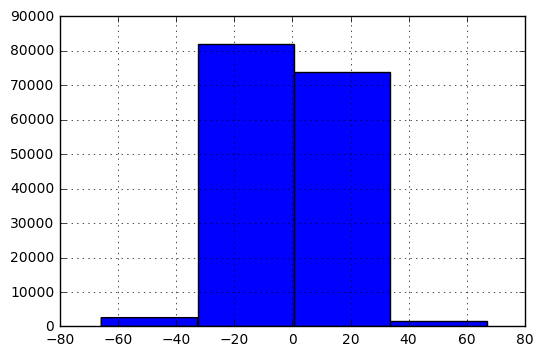

In [208]:
df.x49.hist(bins=4)

In [209]:
# Here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(df):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(df[df.columns[df.dtypes == "object"]].describe().to_html()))
    
 

In [210]:
 describe_categorical(df) 

,x24,x29,x30,x32,x37
count,159972,159970,159970,159969,159977
unique,3,12,5,12,129198
top,asia,July,wednesday,0.01%,$237.4
freq,138965,45569,101535,40767,6


In [211]:
df[("x32")]=df["x32"].str.replace('%','')


In [212]:
df[("x37")]=df["x37"].str.replace('$','')

In [213]:
df.x32=df.x32.astype(np.float64)

In [214]:
df.x37=df.x37.astype(np.float64)

In [215]:
col = ["x0","x1", "x2", "x3", "x4", "x5", "x6","x7", "x8", "x9","x10", "x11", "x12","x13", "x14", "x15","x16", "x17", "x18","x19", 
       "x20", "x21","x22", "x23", "x25","x26", "x27", "x28", "x31", "x32","x33", "x34", "x35", "x36", "x37",
       "x38","x39", "x40", "x41","x42", "x43", "x44","x45", "x46", "x47","x48", "x49"]
for x in col:
    if pd.notnull(x):
      
        mean = df[x].mean()
        df[x] = df[x].fillna(mean)

In [216]:
categorical_variables = ['x24', 'x29', 'x30']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    df[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(df[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    df = pd.concat([df, dummies], axis=1)
    df.drop([variable], axis=1, inplace=True)

In [217]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29_Missing,x29_Nov,x29_Oct,x29_sept.,x30_Missing,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,-0.226706,11.350364,10.831367,5.182092,-2.236454,10.716248,15.747993,-15.900329,-0.178002,10.901306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,-0.431246,-0.974762,-7.412661,-0.930500,-1.265166,14.265374,-10.777451,5.523324,-11.757423,-1.932222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,-0.135071,8.524648,-6.731169,-13.374530,-0.079429,-9.511618,-9.786614,-11.663750,8.783823,-0.904801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.026694,-5.770476,0.774836,4.718855,4.816484,9.501880,1.126553,25.186840,4.650334,11.786198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,-0.349073,3.334116,-3.355872,-0.796302,-0.900425,-7.620448,-4.879186,-16.972020,10.894596,9.426504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [218]:
df1 = df.pop("y")

In [219]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29_Missing,x29_Nov,x29_Oct,x29_sept.,x30_Missing,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,-0.226706,11.350364,10.831367,5.182092,-2.236454,10.716248,15.747993,-15.900329,-0.178002,10.901306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,-0.431246,-0.974762,-7.412661,-0.930500,-1.265166,14.265374,-10.777451,5.523324,-11.757423,-1.932222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,-0.135071,8.524648,-6.731169,-13.374530,-0.079429,-9.511618,-9.786614,-11.663750,8.783823,-0.904801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.026694,-5.770476,0.774836,4.718855,4.816484,9.501880,1.126553,25.186840,4.650334,11.786198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,-0.349073,3.334116,-3.355872,-0.796302,-0.900425,-7.620448,-4.879186,-16.972020,10.894596,9.426504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [220]:
df1

0         0
1         0
2         0
3         0
4         1
5         0
6         1
7         1
8         0
9         1
10        1
11        0
12        0
13        1
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        1
23        0
24        1
25        0
26        0
27        0
28        1
29        0
         ..
159970    1
159971    0
159972    0
159973    1
159974    1
159975    0
159976    0
159977    1
159978    0
159979    0
159980    0
159981    1
159982    1
159983    0
159984    1
159985    0
159986    1
159987    0
159988    0
159989    1
159990    1
159991    0
159992    0
159993    0
159994    0
159995    1
159996    0
159997    1
159998    0
159999    1
Name: y, dtype: int64

In [221]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)

In [222]:
#model.fit(df, df1)

In [223]:
#model.oob_score_

In [224]:
df.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x32', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39',
       u'x40', u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48',
       u'x49', u'x24_Missing', u'x24_america', u'x24_asia', u'x24_euorpe',
       u'x29_Apr', u'x29_Aug', u'x29_Dev', u'x29_Feb', u'x29_January',
       u'x29_July', u'x29_Jun', u'x29_Mar', u'x29_May', u'x29_Missing',
       u'x29_Nov', u'x29_Oct', u'x29_sept.', u'x30_Missing', u'x30_friday',
       u'x30_monday', u'x30_thurday', u'x30_tuesday', u'x30_wednesday'],
      dtype='object')

In [225]:
#cleanX=pd.read_csv("testclean.csv")

In [226]:
#cleanX.shape

In [227]:
#cleanX.columns

In [228]:
#cleanX

In [229]:
#del cleanX["Unnamed: 0"]

In [230]:
#testclean = model.predict(cleanX)

In [231]:
#a = pd.DataFrame()
#a['y']=testclean
#a.to_csv('submit.csv')

feature_importances = pd.Series(model.feature_importances_, index=df.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(12,11));

# Complex version that shows the summary view

def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, df.columns, summarized_columns=categorical_variables)

In [232]:
from sklearn.ensemble import RandomForestRegressor

In [237]:

    
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features= 0.5, 
                              min_samples_leaf=2)                                  
model.fit(df, df1)
print "AUC - ROC : ", roc_auc_score(df1, model.oob_prediction_)

AUC - ROC :  0.979599809829


In [238]:
cleanX=pd.read_csv("testclean.csv")

In [239]:
del cleanX["Unnamed: 0"]

In [240]:
testclean1 = model.predict(cleanX)

In [241]:
cleanX.shape

(40000, 70)

In [242]:
a = pd.DataFrame()
a['y']=testclean1
a.to_csv('submit_final.csv')